## **Brain Stroke Prediction**
Stroke has been recognised as the second-most deadly threat and the second-leading contributor to disability and even death. It is a life-threatening condition, and identifying stroke risk factors is crucial in preventing its occurrence.

# Importing Libraries

In [8]:
import warnings
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
# import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# !pip install pywaffle
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)




#Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
from sklearn.metrics import (accuracy_score,
                             auc,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)



import pylab as pl


# imbalance dataset handling
import imblearn
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    SMOTENC,
                                    ADASYN)

from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# model algorithams
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC , LinearSVC
from xgboost import XGBClassifier , XGBRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report



# standard imports and setup
from scipy import stats
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample



### Data Balancing using SMOTE :
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


#clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import random
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE

# Functions

In [ ]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

# Create a function to plot resampled data
def plot_resample(X, y, X_res, y_res, method):
    c = 'BuGn'
    colors = [ '#328987', '#f8706e']
    fig, axes = plt.subplot_mosaic([['a', 'b'], ['c', 'd']])
	# Generate scatterplots of first two features for inspection
    y1=X.iloc[y.values == 0, 1]
    sns.scatterplot(x=X.iloc[y.values == 0, 0], y=X.iloc[y.values == 0, 1], alpha=0.10, ax=axes['a'],color=colors[0])
    sns.scatterplot(x=X.iloc[y.values == 1, 0], y=X.iloc[y.values == 1, 1], alpha=0.10, ax=axes['a'],color=colors[1])
    y2 = X_res.iloc[y_res.values == 0, 1]
    sns.scatterplot(x=X_res.iloc[y_res.values == 0, 0], y=X_res.iloc[y_res.values == 0, 1], alpha=0.10, ax=axes['b'],color=colors[0])
    sns.scatterplot(x=X_res.iloc[y_res.values == 1, 0], y=X_res.iloc[y_res.values == 1, 1], alpha=0.10, ax=axes['b'],color=colors[1])

    sns.countplot(y=y, ax=axes['c'], palette=colors)
    sns.countplot(y=y_res, ax=axes['d'], palette=colors)

    plt.suptitle(method + ' Outcomes')
    axes['a'].title.set_text('Original Data')
    axes['b'].title.set_text(method + ' Data')
    axes['c'].title.set_text('Original Class Proportions')
    axes['d'].title.set_text(method + ' Class Proportions')
    plt.tight_layout()
    plt.show()

In [ ]:
##### confition matrix and plot
def conf_and_plot(y_test, y_pred_classifier):

  # Compute the confusion matrices for classifiers
    conf = confusion_matrix(y_test, y_pred_classifier)
    colors = [ '#276d62', '#f87876']
  # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    sns.heatmap(conf, annot=True, fmt='d', cmap=sns.color_palette(colors))

  # set the plot title using the axes object
    ax.set(title='Confusion Matrix for the classifier ')



In [2]:
def evaluation(y,predict ,X):


    print('f1 score:',f1_score(y, predict ,average='micro'))
    accuracy = accuracy_score(y, predict)
    print('silhouette_score: ',silhouette_score(X,predict))
    # Print the accuracy
    print("Accuracy:", accuracy)
    print('-'*20)
    # Generate the classification report
    cm = confusion_matrix(y,predict)
    print(cm)
    report = classification_report(y, predict)
    print(report)

    #---------------------------------------------------------------------

    plt.figure(figsize=(15,6))
    colors = [ '#276d62', '#f87876']
    sns.heatmap(confusion_matrix(y,predict),annot=True,cmap=sns.color_palette(colors),fmt='.1f')
    plt.tight_layout()
    plt.show()
    #---------------------------------------------------------------------
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(X_tsne[labels==0,0],X_tsne[labels==0,1],c='#328987',label='cluster 0')
    plt.scatter(X_tsne[labels==1,0],X_tsne[labels==1,1],c='#f8706e',label='cluster 1')
    plt.title('Clustering t-SNE Plot')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.legend()
    plt.show()


# Loading Data

In [3]:
# Import the data
df = pd.read_csv('brain_stroke.csv')

In [4]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [ ]:
df.shape

(4981, 11)

In [ ]:
# Preview the data
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [ ]:
#count the number of missing values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### No missing values detected

# Visualization

# Descriptive Statistics

#### For numerical columns




In [5]:
df.describe(exclude = 'object')

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

#### For categorical columns

In [6]:
df.describe(exclude = ['float', 'int64'])

gender ever_married work_type Residence_type smoking_status
count     4981         4981      4981           4981           4981
unique       2            2         4              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2907         3280      2860           2532           1838

#### Categorical Features: gender, ever_married, work_type, Residence_type,smoking_status
#### Binary Numerical Features: hypertension,heart_disease, stroke
#### Continous Numerical Features: age, avg_glucose_level, bmi

# Outliers

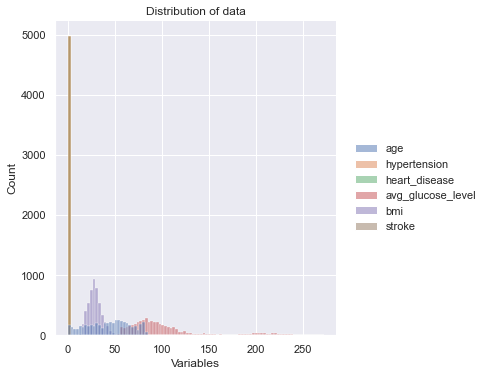

In [9]:
#sets the default aesthetic parameters of Seaborn plots to their latest version.
sns.set_theme()
# the distribution of each numerical variable in the DataFrame
sns.displot(data=df).set(title="Distribution of data", xlabel="Variables")

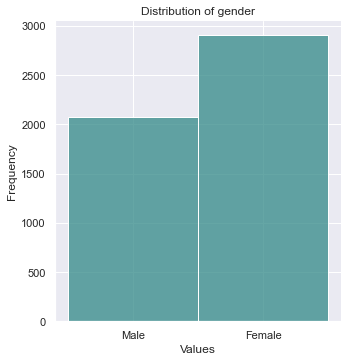

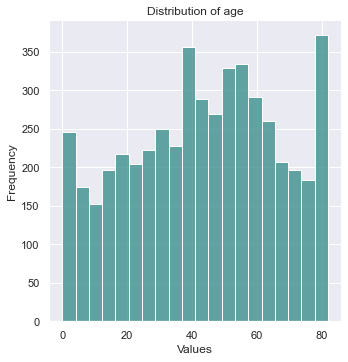

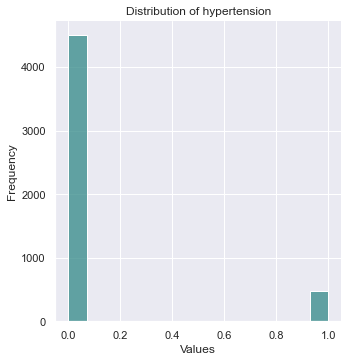

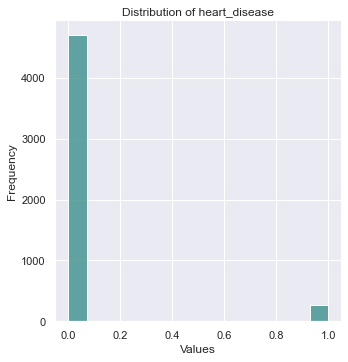

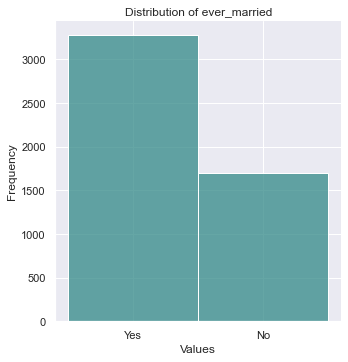

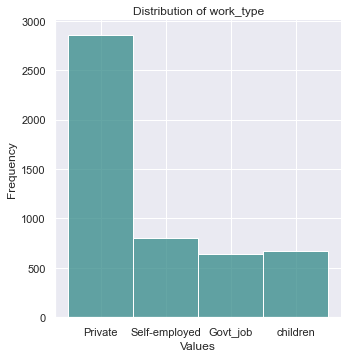

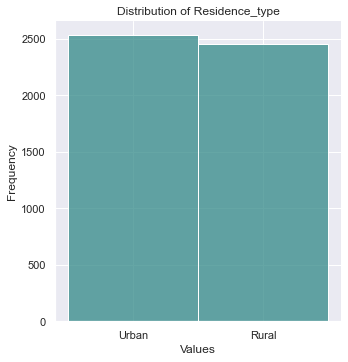

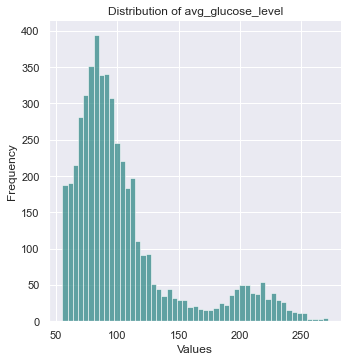

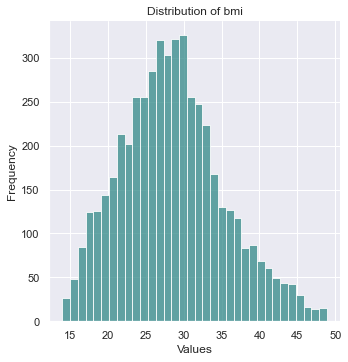

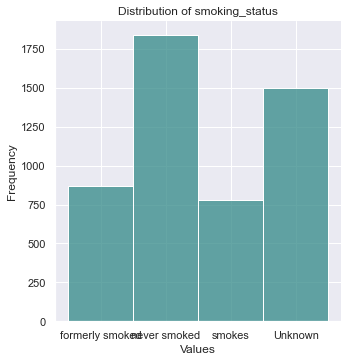

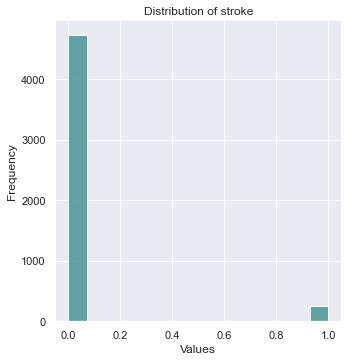

In [10]:
for column in df.columns:
    sns.set_theme()
    # Create a displot for each Feature
    sns.displot(data=df[column], color = '#328987')
    plt.title(f"Distribution of {column}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

We can see that our data is not normally distributed.

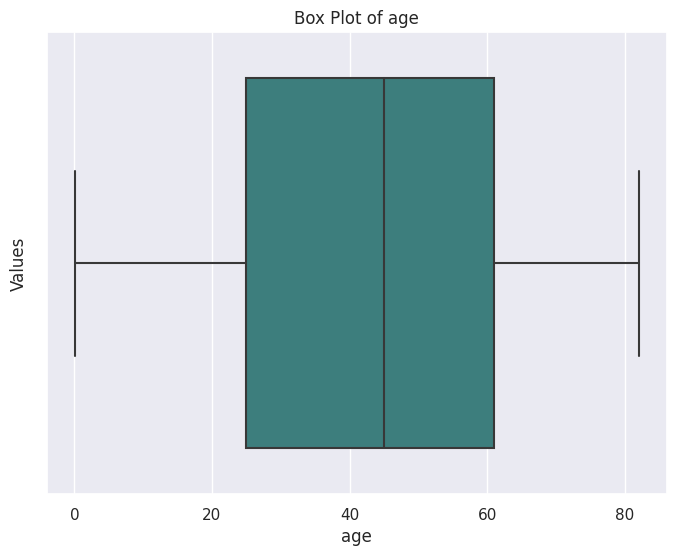

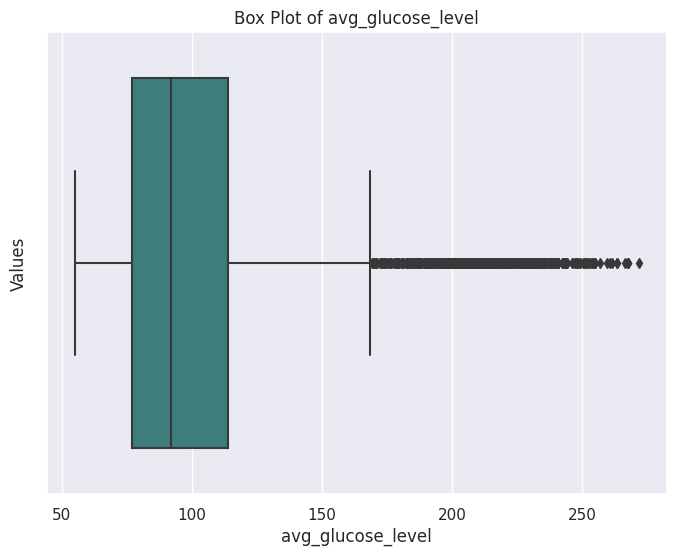

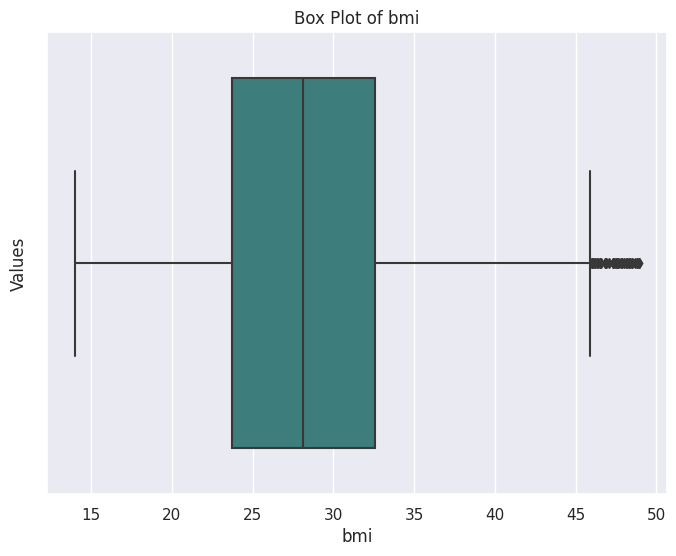

In [ ]:
# Set the color palette
colors = ["#328987", "#f8706e"]
columns = ['age', 'avg_glucose_level',	'bmi']
# Iterate over the columns in the DataFrame
for col in columns:
        # Perform box plot for numerical columns
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col], color='#328987')
        plt.xlabel(col)
        plt.ylabel("Values")
        plt.title(f'Box Plot of {col}')
        plt.show()

#### We can notice some outlier values with bmi and glucose_level columns.
#### But we thought it's better not to delete them as they may be indicators to something what so called "True Outliers"

# Binning numerical variables

By performing binning on these variables, we transform the continuous numerical data into categorical variables. This can be helpful for analyzing the relationships between these variables and other categorical variables and also for Visualization.

In [11]:
print(df['age'].max())
print(df['bmi'].max())
print(df['avg_glucose_level'].max())

82.0
48.9
271.74


In [12]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,50], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,100], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

# Functions

In [13]:
def plot_count_percentage(column_name):
    # Calculate value counts
    value_counts = df[column_name].value_counts()

    # Calculate percentages
    percentages = value_counts / value_counts.sum() * 100

    # Create the bar plot with colors
    plt.bar(value_counts.index, value_counts.values, color='#328987') #value_counts.index represents the x-coordinates (positions) of the bars, and value_counts.values represents the height of each bar

    # Add percentage labels to each bar
    for i, count in enumerate(value_counts):
        plt.text(i, count, f'{count}\n{percentages[i]:.1f}%', ha='center', va='bottom')

    # Set the title and center it
    plt.title(f'{column_name} Distribution', y=1.1)

    # Display the plot
    plt.show()

In [14]:
def plot_category_distribution(column_name, stroke_data, healthy_data, category_labels):
    # Calculate the counts for stroke and healthy cases
    stroke_counts = stroke_data[column_name].value_counts()
    healthy_counts = healthy_data[column_name].value_counts()

    # Get all unique categories
    categories = category_labels

    # Calculate the percentages
    total_stroke = stroke_counts.sum()
    total_healthy = healthy_counts.sum()
    stroke_percentages = (stroke_counts / total_stroke) * 100
    healthy_percentages = (healthy_counts / total_healthy) * 100

    # Set the width of each bar
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    # Create the grouped bar plot
    plt.bar(r1, stroke_counts, width=bar_width, label='Stroke', color='#f87876')
    plt.bar(r2, healthy_counts, width=bar_width, label='Healthy', color='#276d62')

    # Add the percentage labels to each bar
    for i, count in enumerate(stroke_counts):
        plt.text(i, count, f'{count}\n{stroke_percentages[i]:.1f}%', ha='center', va='bottom')
    for i, count in enumerate(healthy_counts):
        plt.text(i + bar_width, count, f'{count}\n{healthy_percentages[i]:.1f}%', ha='center', va='bottom')

    # Set the x-axis ticks and labels
    plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)

    # Set the axis labels and title
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'{column_name} Distribution for Stroke and Healthy', y=1.1)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

# EDA


#### Target

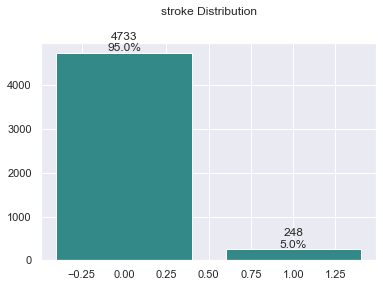

In [15]:
plot_count_percentage('stroke')

From distribution we can see that every 5 people out of 100 people have had stroke, which means that having stroke is relatively low in our data indicating an imbalance which may causes struggle for the model to learn patterns.
So, an action needs to be done either oversampling or undersampling.

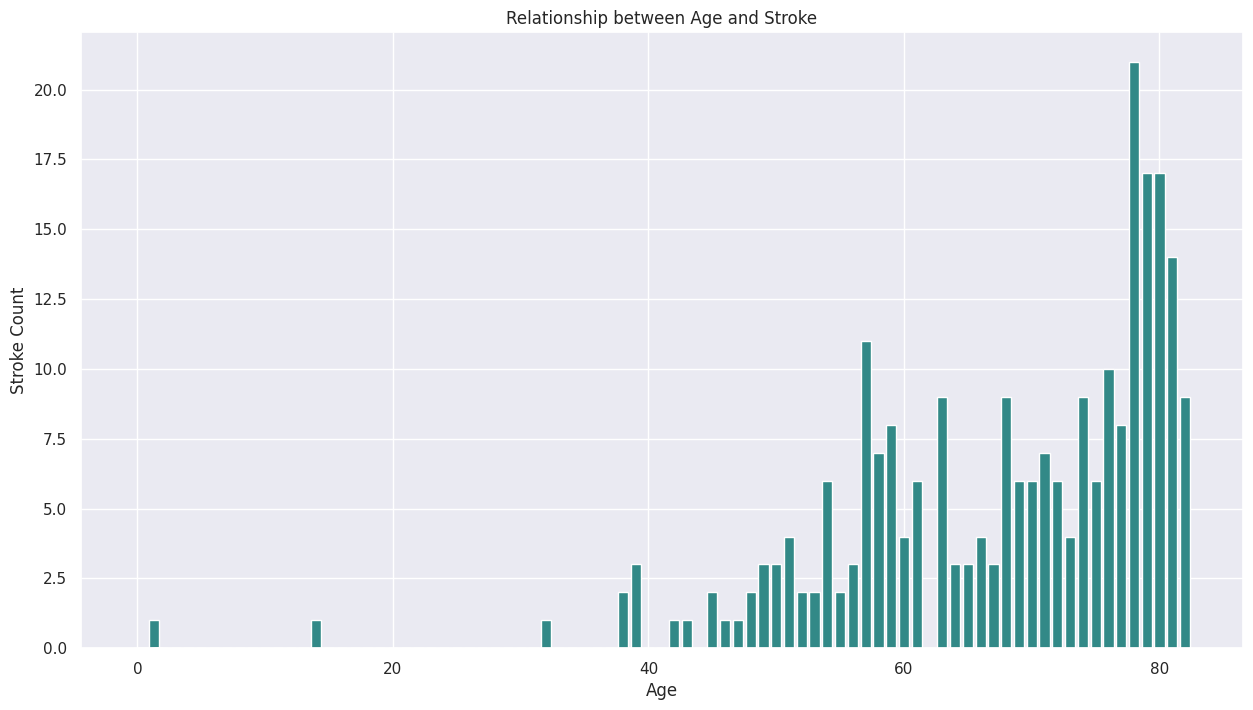

In [ ]:
# Group the data by age and calculate the stroke count for each age group
age_stroke_counts = df.groupby('age')['stroke'].sum()

# Create the bar plot
plt.bar(age_stroke_counts.index, age_stroke_counts.values, color = '#328987')

# Set the axis labels and title
plt.xlabel('Age')
plt.ylabel('Stroke Count')
plt.title('Relationship between Age and Stroke')

# Display the plot
plt.show()

#### For continuous variables

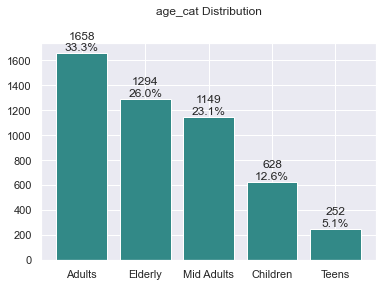

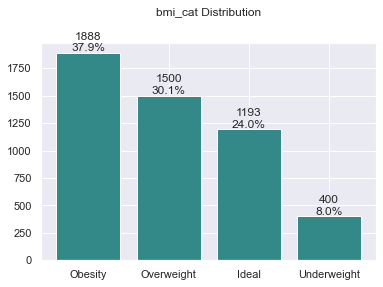

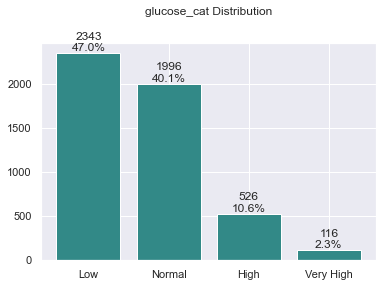

In [16]:
# Calling Function
plot_count_percentage('age_cat')
plot_count_percentage('bmi_cat')
plot_count_percentage('glucose_cat')

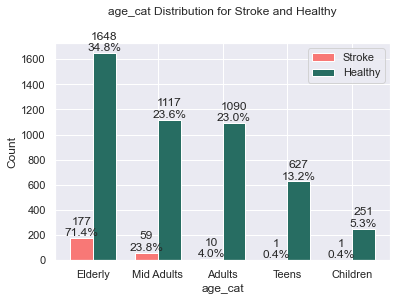

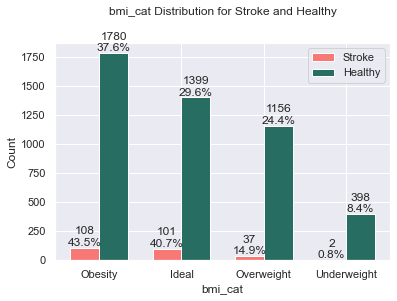

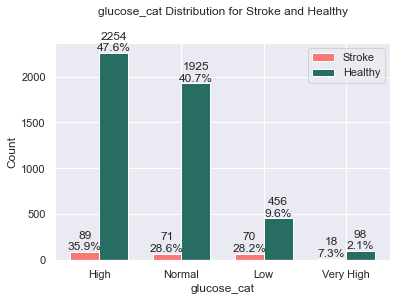

In [17]:
# Calling Function
plot_category_distribution('age_cat', df[df['stroke'] == 1], df[df['stroke'] == 0], df['age_cat'].unique())
plot_category_distribution('bmi_cat', df[df['stroke'] == 1], df[df['stroke'] == 0], df['bmi_cat'].unique())
plot_category_distribution('glucose_cat', df[df['stroke'] == 1], df[df['stroke'] == 0], df['glucose_cat'].unique())

#### We can see that eldery people are mostly having strokes, compared to younger ones.
#### High BMI (obesity) results in high possibility of having stroke.
#### A large section of people having stroke seems to have a normal glucose level!

#### For categorical variables

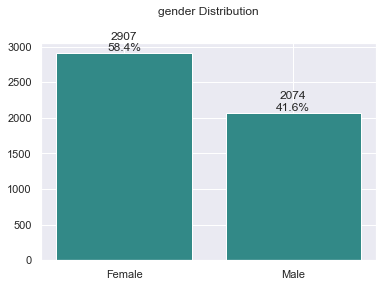

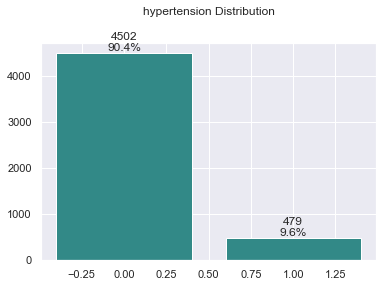

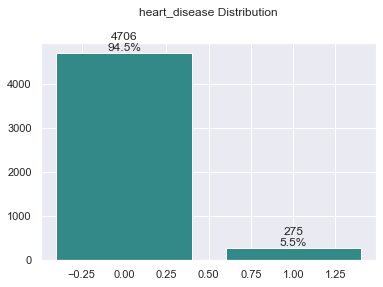

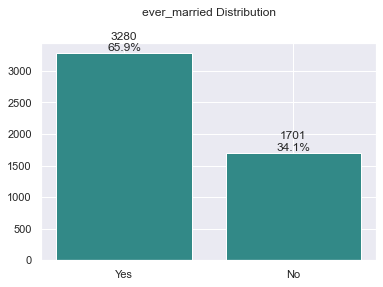

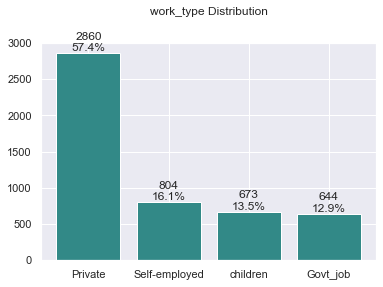

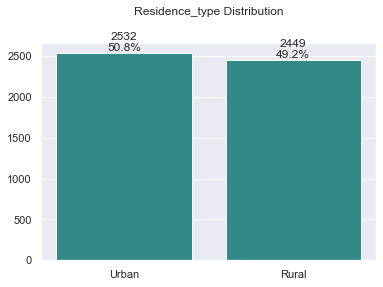

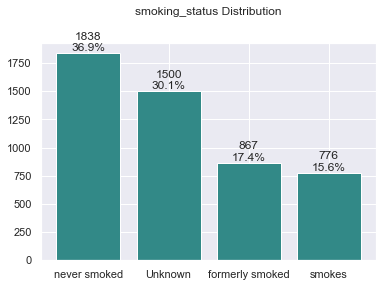

In [18]:
# Calling Function
plot_count_percentage('gender')
plot_count_percentage('hypertension')
plot_count_percentage('heart_disease')
plot_count_percentage('ever_married')
plot_count_percentage('work_type')
plot_count_percentage('Residence_type')
plot_count_percentage('smoking_status')

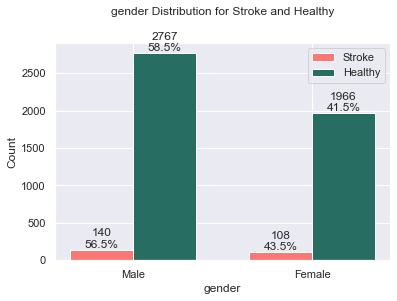

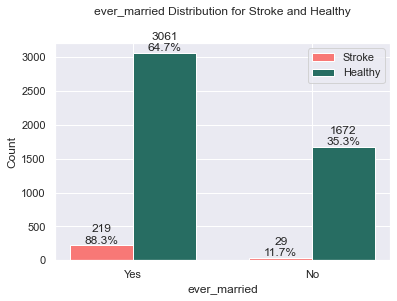

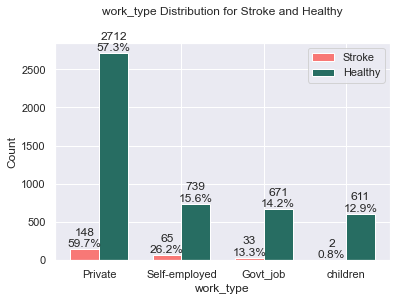

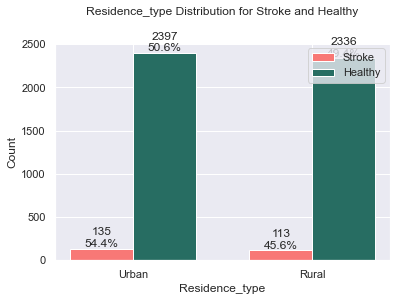

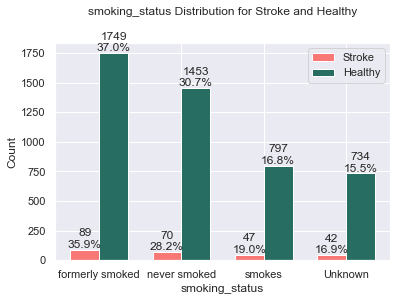

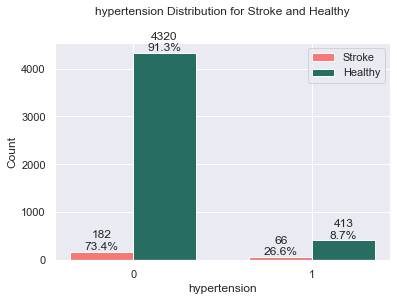

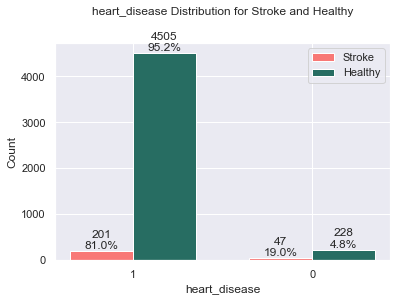

In [19]:
plot_category_distribution('gender', df[df['stroke'] == 1], df[df['stroke'] == 0], df['gender'].unique())
plot_category_distribution('ever_married', df[df['stroke'] == 1], df[df['stroke'] == 0], df['ever_married'].unique())
plot_category_distribution('work_type', df[df['stroke'] == 1], df[df['stroke'] == 0], df['work_type'].unique())
plot_category_distribution('Residence_type', df[df['stroke'] == 1], df[df['stroke'] == 0], df['Residence_type'].unique())
plot_category_distribution('smoking_status', df[df['stroke'] == 1], df[df['stroke'] == 0], df['smoking_status'].unique())
plot_category_distribution('hypertension', df[df['stroke'] == 1], df[df['stroke'] == 0], df['hypertension'].unique())
plot_category_distribution('heart_disease', df[df['stroke'] == 1], df[df['stroke'] == 0], df['heart_disease'].unique())

#### From this we can conclude men are slightly likely to have brain stroke more than women, also urban people, married ones, private sector employees, formely smoked, ones with hypertension and heart disease.
#### Also never smoked comes next even before smokes and unknown which make us think that these results might be misleading or deceiving.

# Effective features

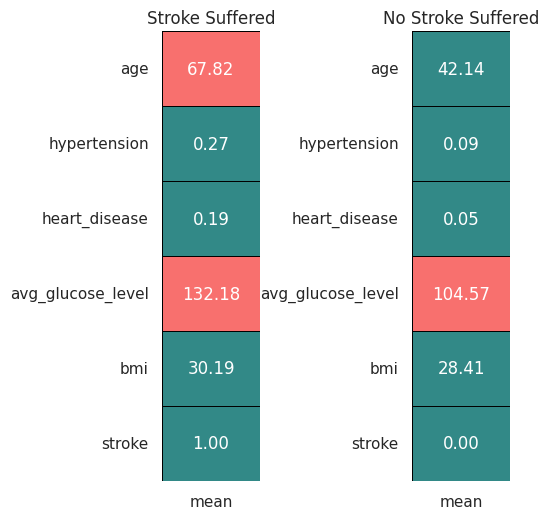

In [ ]:
# Searching for the main features that might be a cause a disease.
stroke = df[df['stroke'] == 1].describe().T
no_stroke = df[df['stroke'] == 0].describe().T

colors = ["#328987", "#f8706e"]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)



*   Mean values of all the features for cases of stroke suffered and no stroke suffered
*   age and avg_glucose_level can be solid 1st hand indicators to identify a stroke.
* Mean age values of patients that suffered a stroke, 67.82,is much higher than those did not suffer a stroke, 42.14.


* Similarly, avg_glucose_level value of 132.18 can indicate a higher chance of suffering from stroke than the avg_glucose_level value of 104.57 that has been found in patients that did not suffer a stroke.


# Correlation between features

In [ ]:
df.corr()

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.278120       0.264852           0.236763   
hypertension       0.278120      1.000000       0.111974           0.170028   
heart_disease      0.264852      0.111974       1.000000           0.166847   
avg_glucose_level  0.236763      0.170028       0.166847           1.000000   
bmi                0.373703      0.158762       0.060926           0.186348   
stroke             0.246478      0.131965       0.134610           0.133227   

                        bmi    stroke  
age                0.373703  0.246478  
hypertension       0.158762  0.131965  
heart_disease      0.060926  0.134610  
avg_glucose_level  0.186348  0.133227  
bmi                1.000000  0.056926  
stroke             0.056926  1.000000

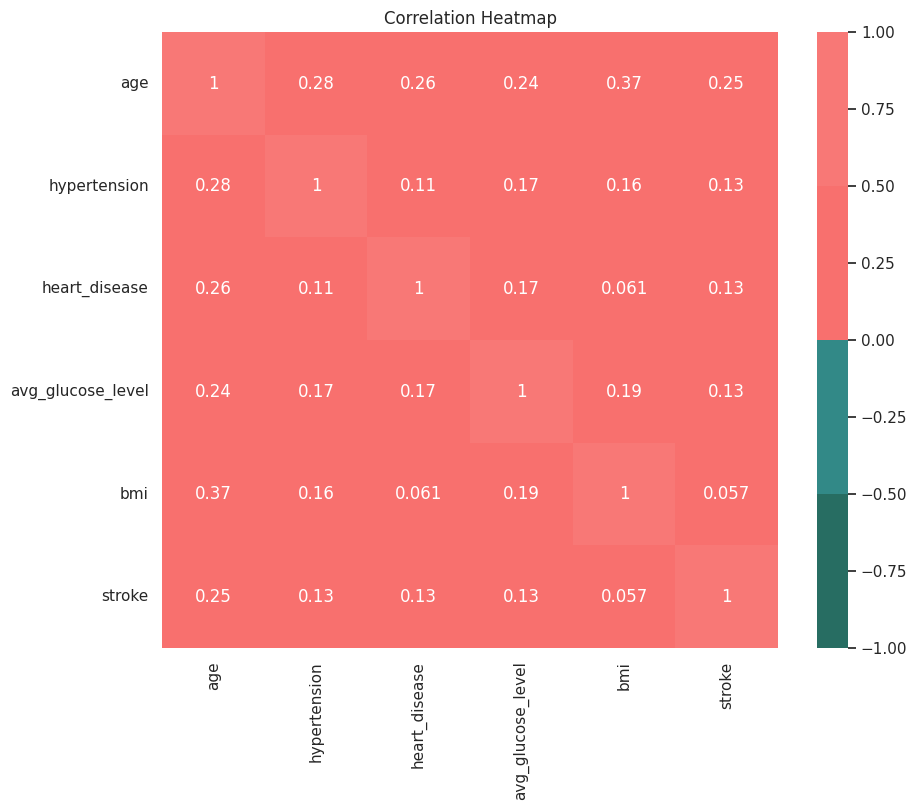

In [ ]:
subset_df = df.copy()
correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))

# Define your custom color map with specific colors for different correlation ranges
# Here, we use a list of colors from teal (#276d62) to white (#ffffff) to salmon (#f87876)
colors = ['#276d62', '#328987' , '#f8706e', '#f87876']

# Create a custom colormap using the colors list
custom_cmap = plt.cm.colors.ListedColormap(colors)

# Plot the correlation heatmap with the custom colormap
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, vmin=-1, vmax=1, square=True)
# vmin=-1 and vmax=1: These parameters set the minimum and maximum values for the colormap, ensuring that it covers the range from -1 to 1, which is the range of correlation coefficients.
plt.title('Correlation Heatmap')
plt.show()

Ther is no actual strong correlation between the features except for between age and bmi, there is slightly moderate positive correlation.

By default it's done for numerical features.

#### Correlation for all features numerical and categorical.

In [ ]:
print(df["gender"].unique())
print(df["ever_married"].unique())
print(df["work_type"].unique())
print(df["Residence_type"].unique())
print(df["smoking_status"].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


We will use label encoding for correlation as we do not want to increse the number of columns and it's just copying our data into a subset. So, no loss.

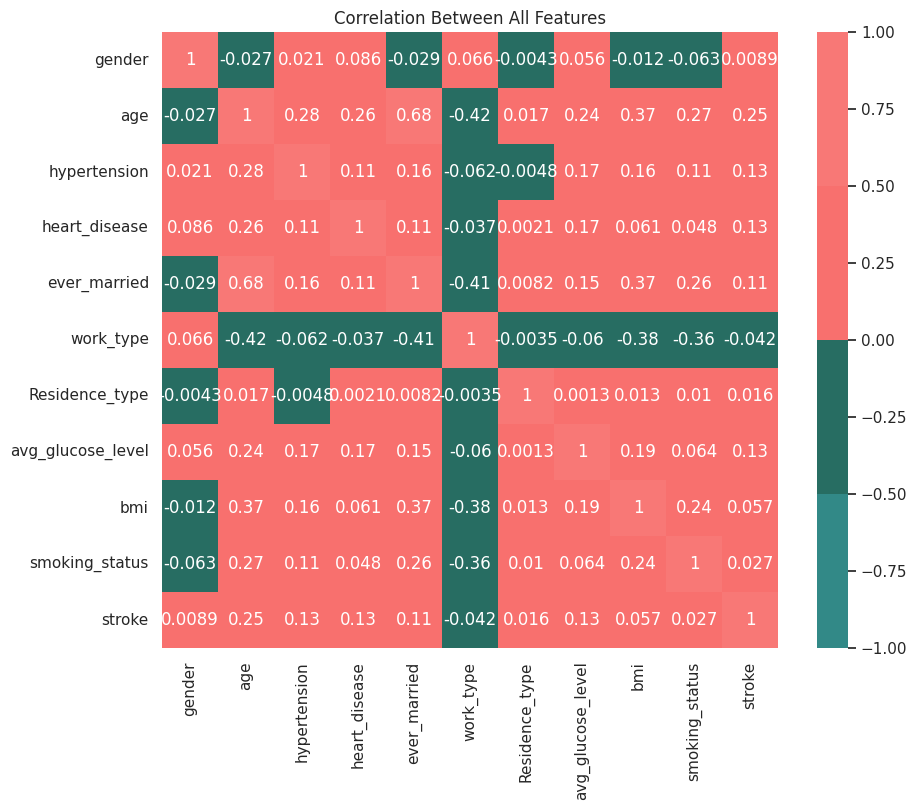

In [ ]:
# Encode non-numerical features
le = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    subset_df[column] = le.fit_transform(subset_df[column])

correlation_matrix = subset_df.corr()

# Define the custom colormap with specific colors
colors = [ '#328987', '#276d62' , '#f8706e', '#f87876']

custom_cmap = plt.cm.colors.ListedColormap(colors)

# Plot the correlation heatmap with the custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, vmin=-1, vmax=1, square=True)
plt.title('Correlation Between All Features')
plt.show()

In [ ]:
df.drop(columns=["bmi_cat", "age_cat", "glucose_cat"], inplace=True)

In [ ]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

# Features Encoding

## Features Encoding

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='O').columns :
    df[col] = le.fit_transform(df[col])
    df[col] = df[col].astype(int)

In [ ]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1

 ### visualize the probability density function Kernel Density Estimation of a continuous random variable

In [ ]:
def plot_kde_subplots(dataframe, columns):
    num_plots = len(columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))
    for i, column in enumerate(columns):
        sns.kdeplot(dataframe[column], ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{column} Distribution KDE Plot')
    plt.tight_layout()
    plt.show()


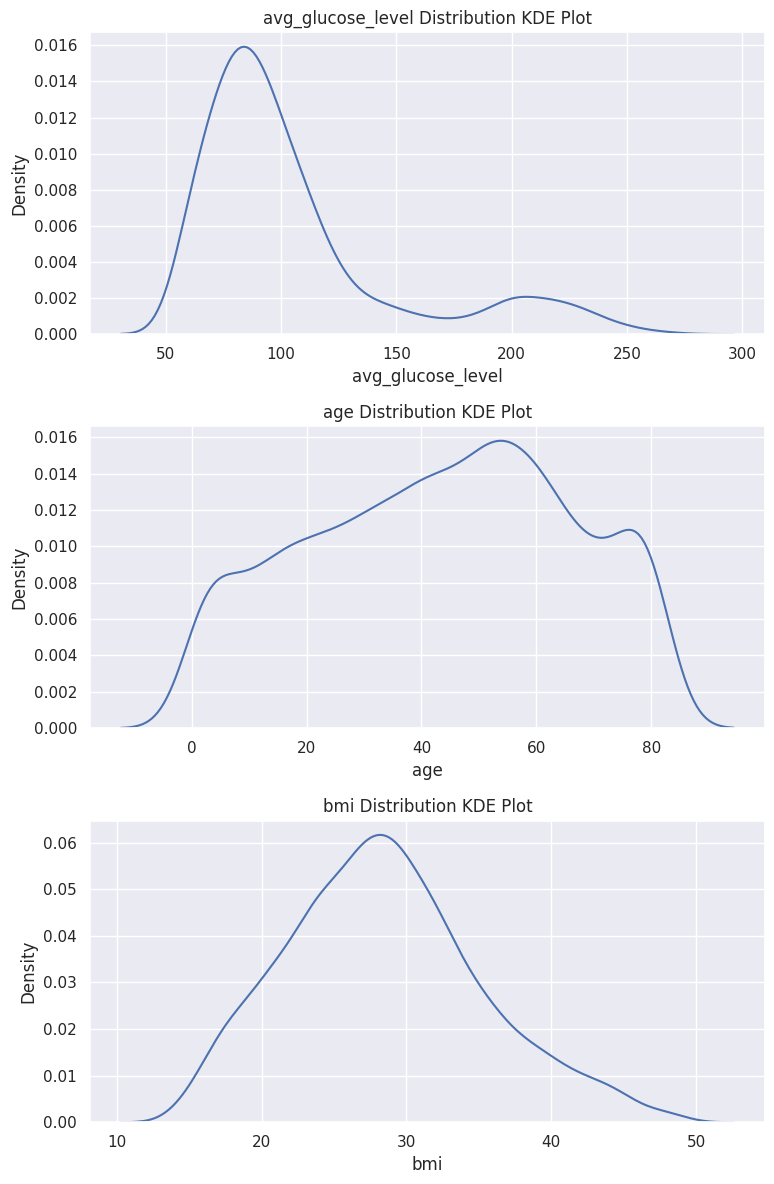

In [ ]:
# Example usage with 'df' as the DataFrame and the list of columns you want to plot
col = ['avg_glucose_level', 'age', 'bmi']
plot_kde_subplots(df, col)

## Transformation



In [ ]:
# Log Transformation
df[['avg_glucose_level']] = np.log(df[['avg_glucose_level']])


In [ ]:
# MinMaxScaler
mscaler = MinMaxScaler()
df[['age', 'bmi']] = mscaler.fit_transform(df[['age', 'bmi']])


In [ ]:
df.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0       1  0.816895             0              1             1          1   
1       1  0.975586             0              1             1          1   
2       0  0.597168             0              0             1          1   
3       0  0.963379             1              0             1          2   
4       1  0.987793             0              0             1          1   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1           5.432367  0.647564               1       1  
1               0           4.662684  0.530086               2       1  
2               1           5.143008  0.584527               3       1  
3               0           5.159745  0.286533               2       1  
4               1           5.226875  0.429799               1       1

## How imbalanced is the brain stroke data?


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

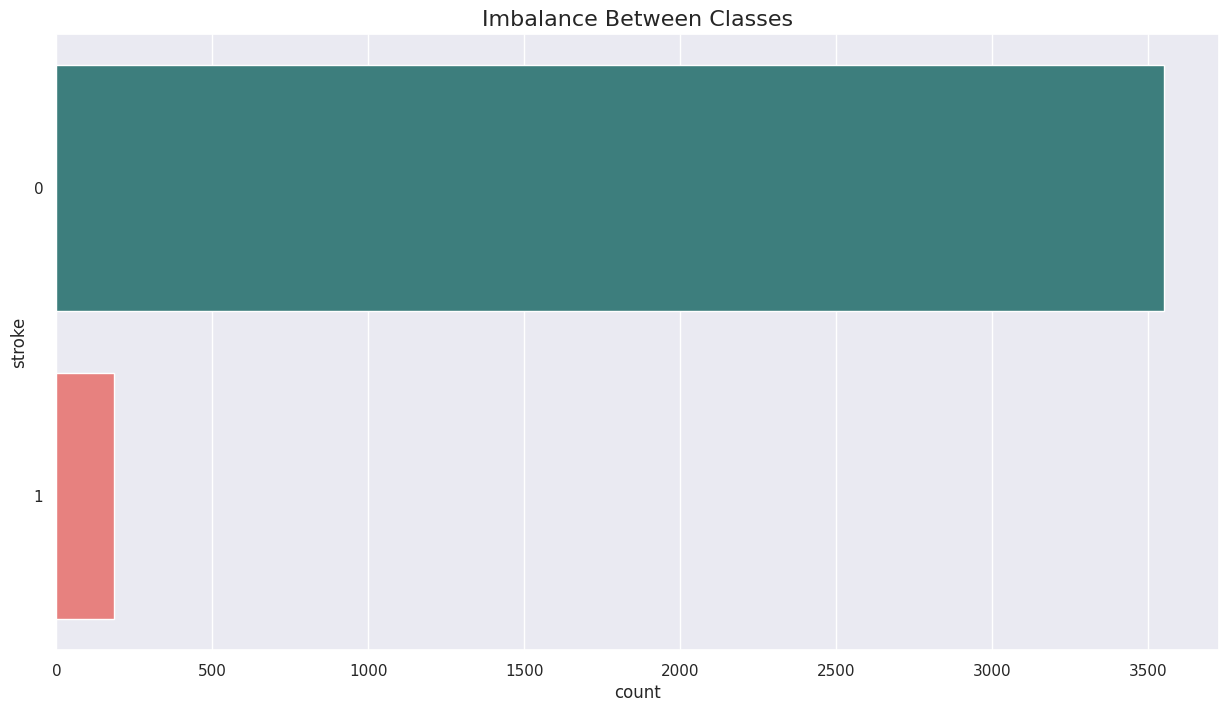

In [ ]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']
target = 'stroke'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

colors = [ '#328987', '#f8706e']

sns.countplot(y=y_train, palette=colors)
plt.title("Imbalance Between Classes", size=16)
plt.show()

In [ ]:
y_test.value_counts()

0    1184
1      62
Name: stroke, dtype: int64

- Perform [random under-sampling](#rus) to reduce the quantity of the majority class.
- Perform [random over-sampling](#ros) to increase the quantity of the minority class.
- Perform [SMOTE](#smote) over-sampling to increase the quantity of the minority class.
- Perform [ADASYN](#adasyn) over-sampling to increase the quantity of the minority class.
- Perform combine of [random under-sampling](#rus) and [SMOTE](#smote) over-sampling  class.

## Randomly sampling our majority class to match the size of the minority
Random under-sampling is a technique that performs random draws from the majority class to match the minority class.
- You have a lot of data that you can afford to discard.
- You are aiming for computational efficiency.


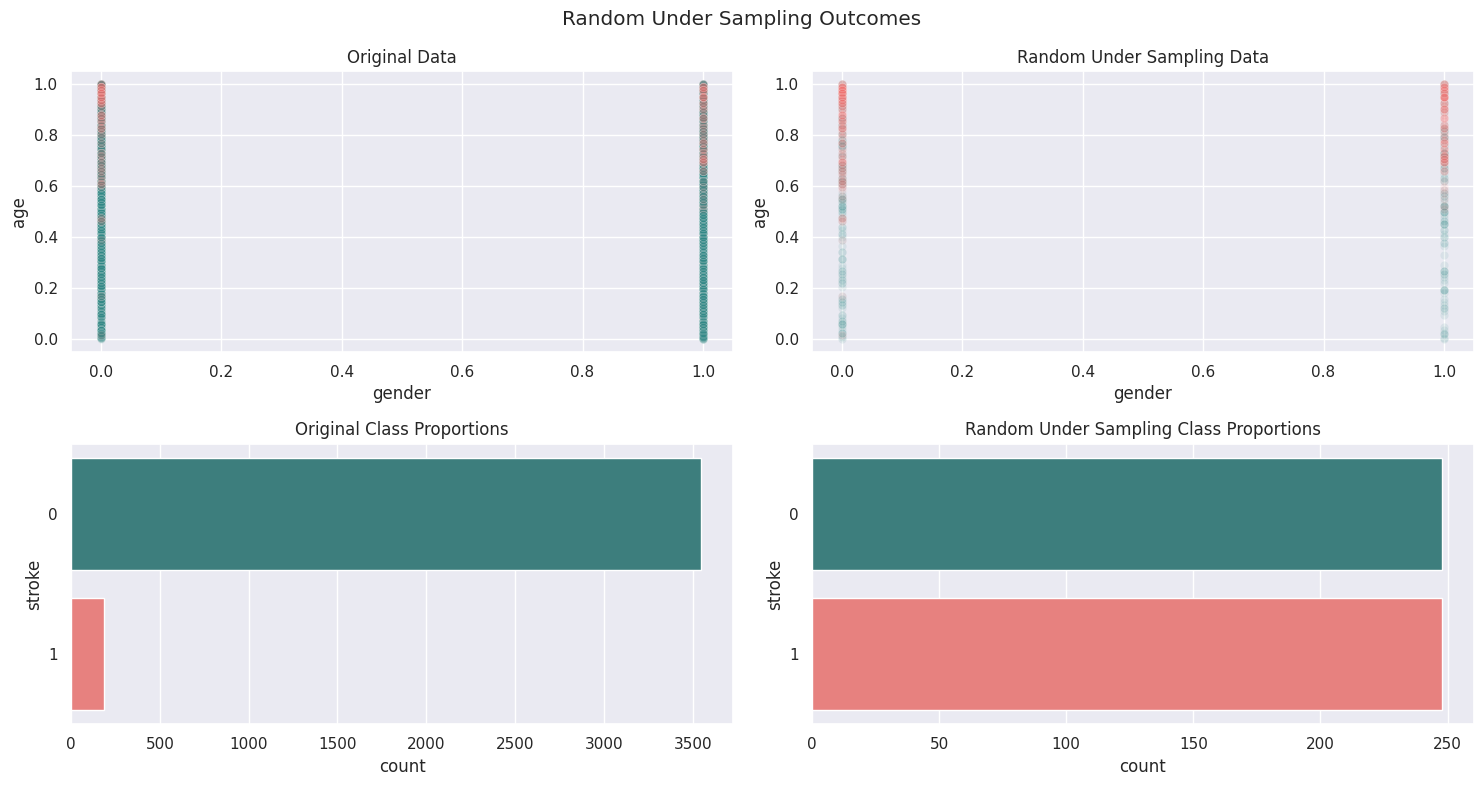

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_un, y_un = rus.fit_resample(X, y)

plot_resample(X_train, y_train, X_un, y_un, "Random Under Sampling")

In [ ]:
y_un.value_counts()

0    248
1    248
Name: stroke, dtype: int64

## Randomly sampling to increase the size of our minority class
This technique performs random draws with replacement on the minority class to match the majority class. It has a drawback that the model will be trained on a large number of duplicates which may harm model performance by introducing issues such as overfitting.

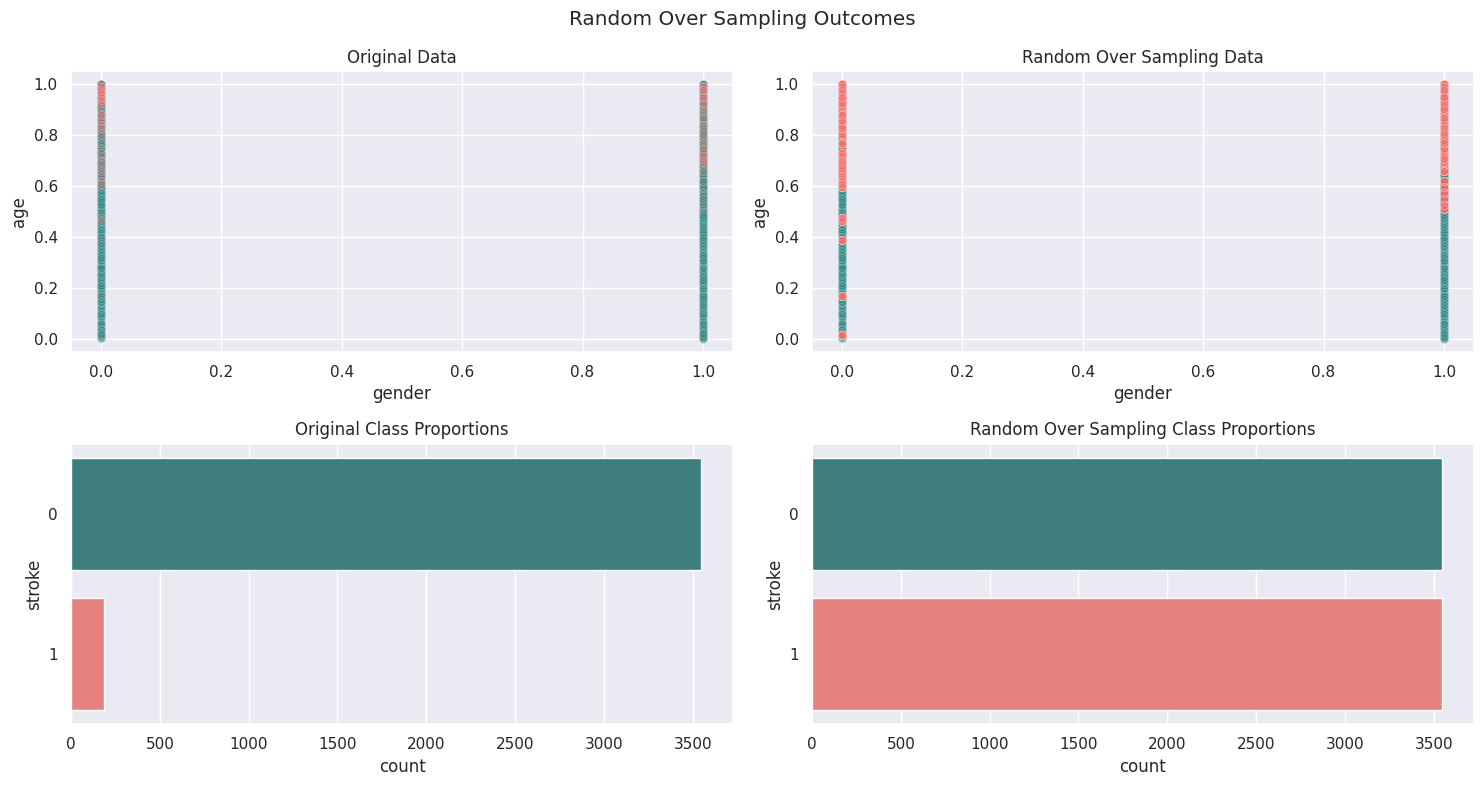

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ovr, y_ovr = ros.fit_resample(X_train, y_train)

plot_resample(X_train, y_train, X_ovr, y_ovr, "Random Over Sampling")

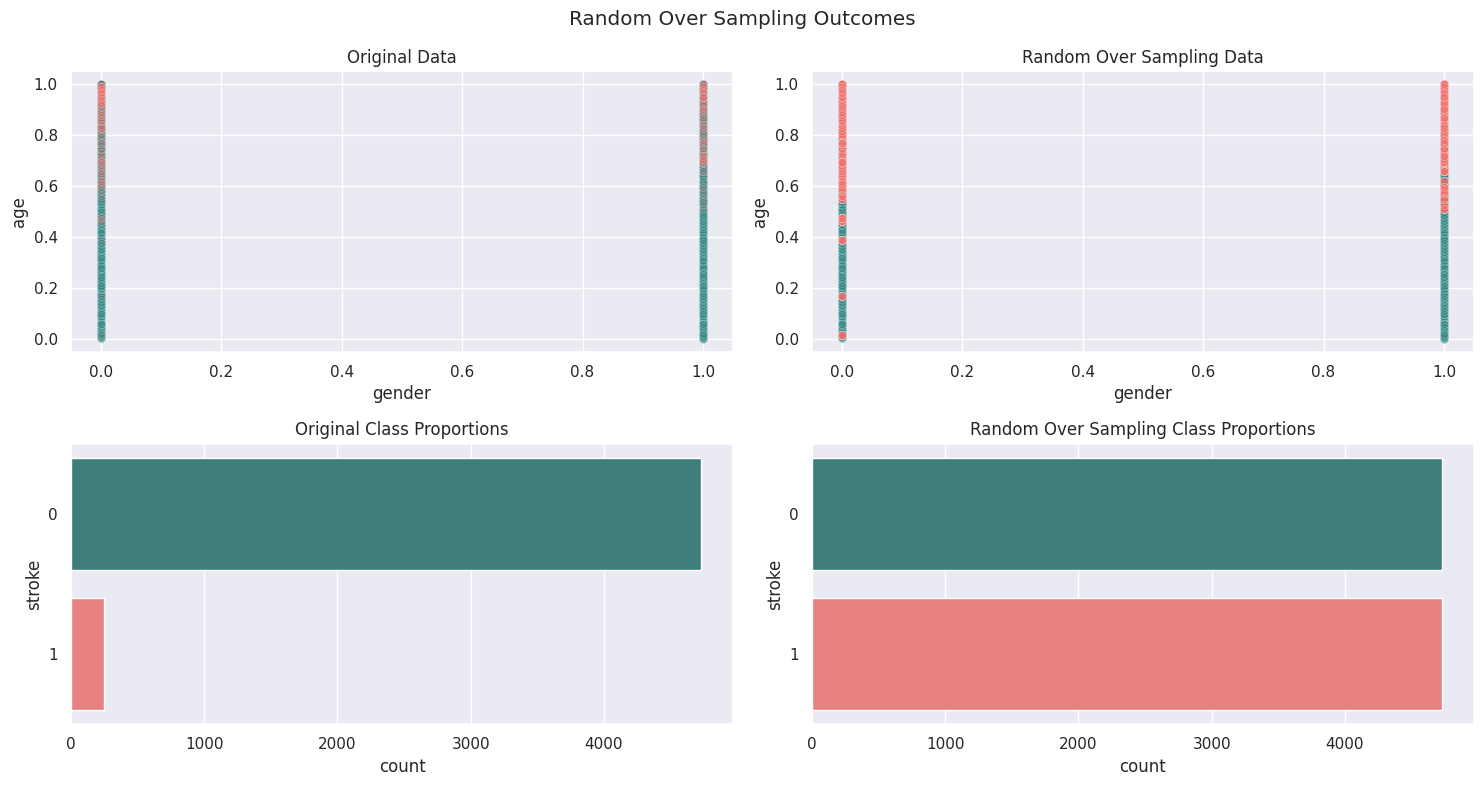

In [ ]:
X_ovr2, y_ovr2 = ros.fit_resample(X, y)

plot_resample(X, y, X_ovr2, y_ovr2, "Random Over Sampling")

There is a similar level of opacity between the two plots. This indicates that the quantity of data was preserved after resampling indicating an equality between the two classes.

## Creating synthetic samples to rebalance the data
SMOTE (Synthetic Minority Over-sampling) Creates new synthetic observations. Although this reduces the risk of overfitting, it can have some potential downsides:
- SMOTE can introduce noise into the data because of how it generates synthetic examples.

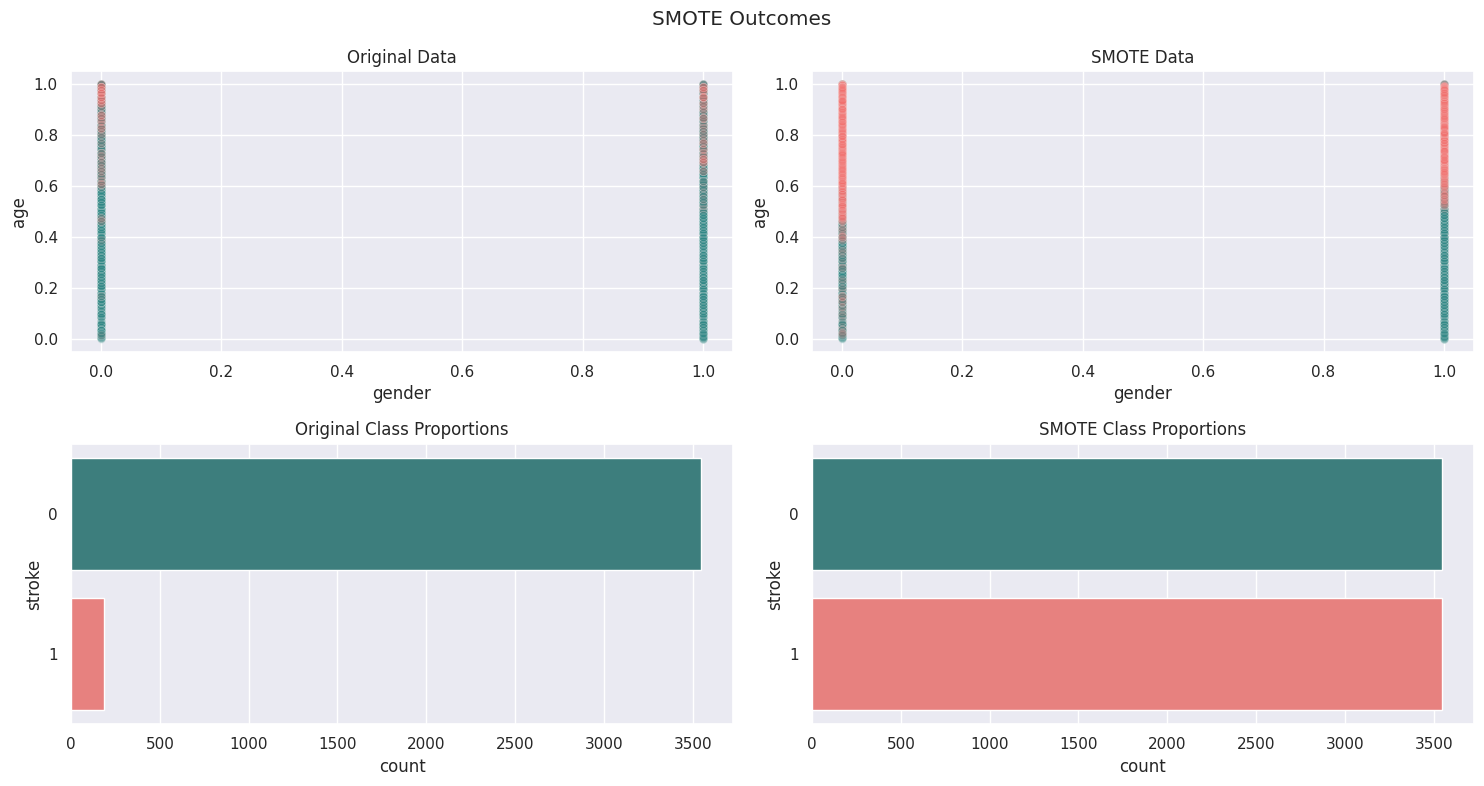

In [ ]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

plot_resample(X_train, y_train, X_sm, y_sm, "SMOTE")

New samples are generated through interpolation.


## Creating adaptive synthetic samples to rebalance the data
ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning) Creates new synthetic observations, and after creating those sample it adds a random small values to the points thus making it more realistic.

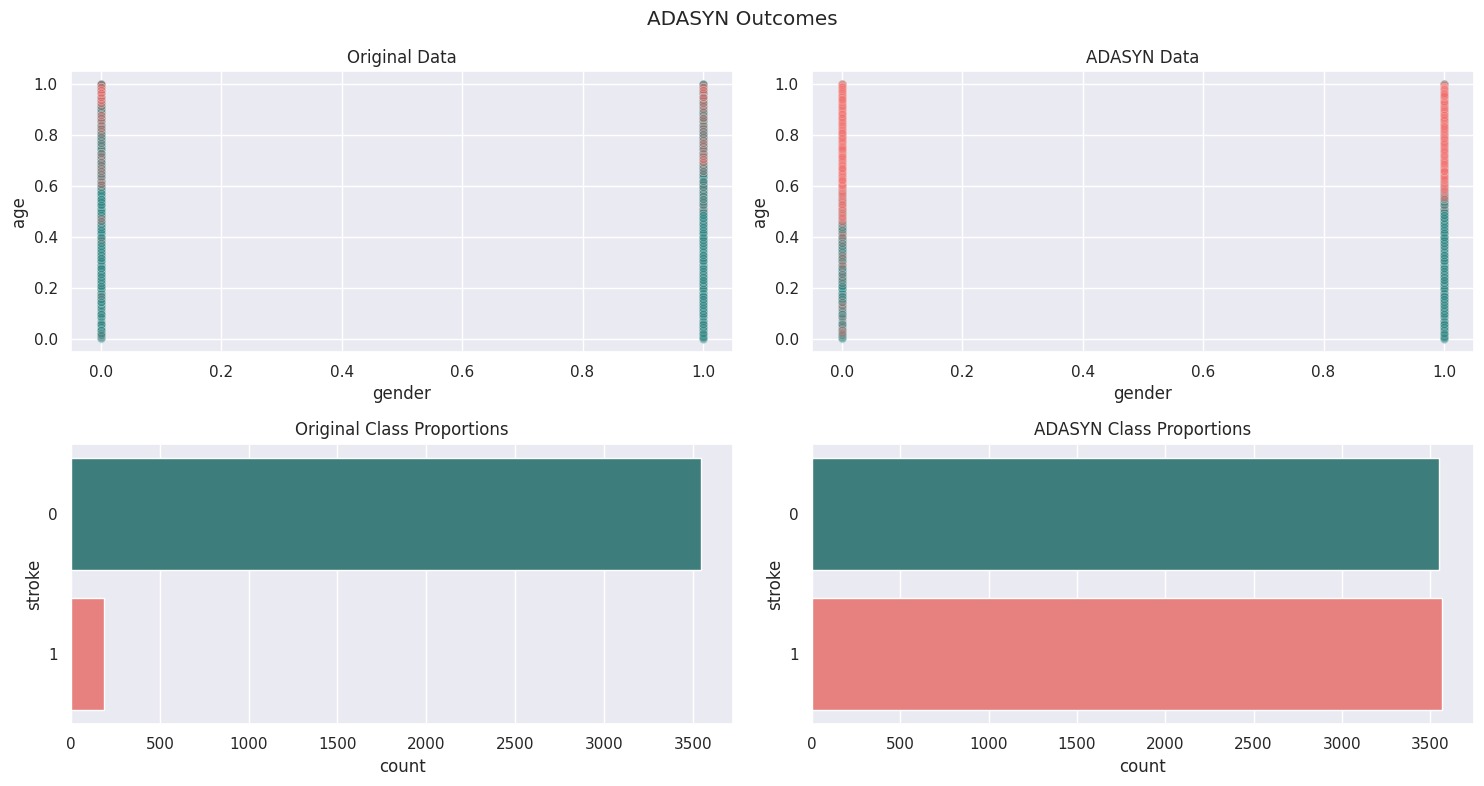

In [ ]:
sm = ADASYN(random_state=42)
X_ad, y_ad = sm.fit_resample(X_train, y_train)
plot_resample(X_train, y_train, X_ad, y_ad, "ADASYN")

# combine of undersampling and oversampling

The dataset is Unbalanced with a bias towards No Stroke. We will first balance the dataset using SMOTE Analysis!

For best performances, combination of undersampling and oversampling is recommended.

First, we will undersample the majority samples and it is followed by oversampling minority samples.

In [ ]:
df

gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.816895             0              1             1          1   
1          1  0.975586             0              1             1          1   
2          0  0.597168             0              0             1          1   
3          0  0.963379             1              0             1          2   
4          1  0.987793             0              0             1          1   
...      ...       ...           ...            ...           ...        ...   
4976       1  0.499512             0              0             0          1   
4977       1  0.487305             0              0             1          1   
4978       0  0.548340             1              0             1          0   
4979       1  0.487305             0              0             1          1   
4980       0  0.975586             1              0             1          1   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0                  1           5.432367  0.647564               1       1  
1                  0           4.662684  0.530086               2       1  
2                  1           5.143008  0.584527               3       1  
3                  0           5.159745  0.286533               2       1  
4                  1           5.226875  0.429799               1       1  
...              ...                ...       ...             ...     ...  
4976               0           4.250636  0.452722               1       0  
4977               1           5.253058  0.489971               3       0  
4978               0           4.554087  0.510029               3       0  
4979               0           4.430102  0.458453               3       0  
4980               1           4.427836  0.432665               2       0  

[4981 rows x 11 columns]

In [ ]:
# show the count
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

### Data Balancing using SMOTE and undersampling :

Counter({0: 2480, 1: 2480})


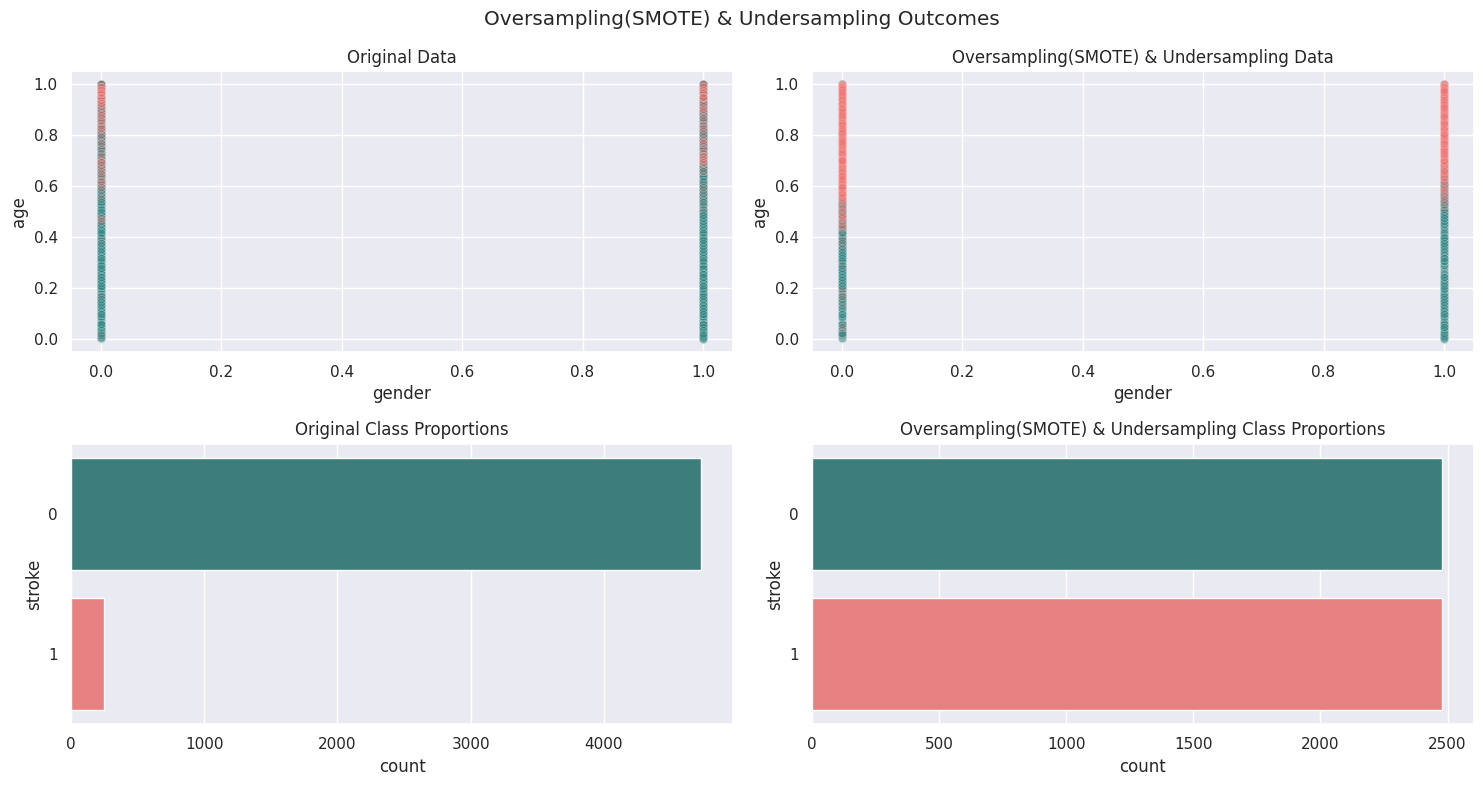

In [ ]:
# balance the data
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1_ = df.loc[:,:'smoking_status']
t1_ = df.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1_, t1_)
print(Counter(t1))
plot_resample(f1_, t1_,f1, t1, "Oversampling(SMOTE) & Undersampling")

In [ ]:
# split the data and scale all of them
x_trainc, x_testc, y_trainc, y_testc = train_test_split(f1, t1, test_size = 0.3, random_state = 2)
sd=StandardScaler()
x_trainc=sd.fit_transform(x_trainc)
x_testc=sd.fit_transform(x_testc)
# the ouput data are:x_trainc, x_testc, y_trainc, y_testc which will be use in the models below

# Modeling

Machine Learning Models used as:
* LogisticRegression
* RandomForestClassifier,
* DecisionTreeClassifier,
* KNeighborsClassifier,
* XGBClassifier
* Gaussian Naive Bayes


## Model Development
There are few things to be done:
- Accuracy measure is not enough to choose best performer for classification problems.
- Baseline performance of models is applied into the resampled data samples
- GridSearch is used to choose best hyperparameters
- Ensemble method (Voting Classifier) is used to find a better model

In [ ]:
def classification(Xtrain, ytrain, Xtest, ytest, method):
    method.fit(Xtrain, ytrain)
    ytrain_predict = method.predict(Xtrain)
    y_predict = method.predict(Xtest)

    print('train f1 score')
    print(f1_score(ytrain, ytrain_predict, average='micro'))
    print('test f1 score')
    print(f1_score(ytest, y_predict, average='micro'))
    print('-' * 20)

    # Generate the classification report
    cm = confusion_matrix(ytest, y_predict)
    print(cm)

    report = classification_report(ytest, y_predict)
    print(report)
    plt.figure(figsize=(15, 6))
    colors = [ '#276d62', '#f87876']
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette(colors))  # 'd' format to display integer values
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    try:
        probs = method.predict_proba(Xtest)
        print('ROC Score:')
        print(roc_auc_score(ytest, probs[:,1]))
    except AttributeError:
        pass
        # Plot ROC curve
    if hasattr(method, "predict_proba"):
        y_prob = method.predict_proba(Xtest)
        if len(y_prob.shape) == 2 and y_prob.shape[1] > 1:
            fpr, tpr, thresholds = roc_curve(ytest, y_prob[:, 1])
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color = colors[1]  , lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], color=colors[0], lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

    # Plot Precision-Recall curve
    if hasattr(method, "predict_proba"):
        y_prob = method.predict_proba(Xtest)
        if len(y_prob.shape) == 2 and y_prob.shape[1] > 1:
            precision, recall, thresholds = precision_recall_curve(ytest, y_prob[:, 1])

            plt.figure(figsize=(8, 6))
            plt.plot(recall, precision, color=colors[1], lw=2)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.show()


In [ ]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):

    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model
    predicted = model.predict(X_test)

    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))


### Baseline Performance of Models on Resampled Data

***  Baseline with RUS : ***
Results for LogisticRegression:
train f1 score
0.7520161290322581
test f1 score
0.7504012841091493
--------------------
[[883 301]
 [ 10  52]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1184
           1       0.15      0.84      0.25        62

    accuracy                           0.75      1246
   macro avg       0.57      0.79      0.55      1246
weighted avg       0.95      0.75      0.82      1246



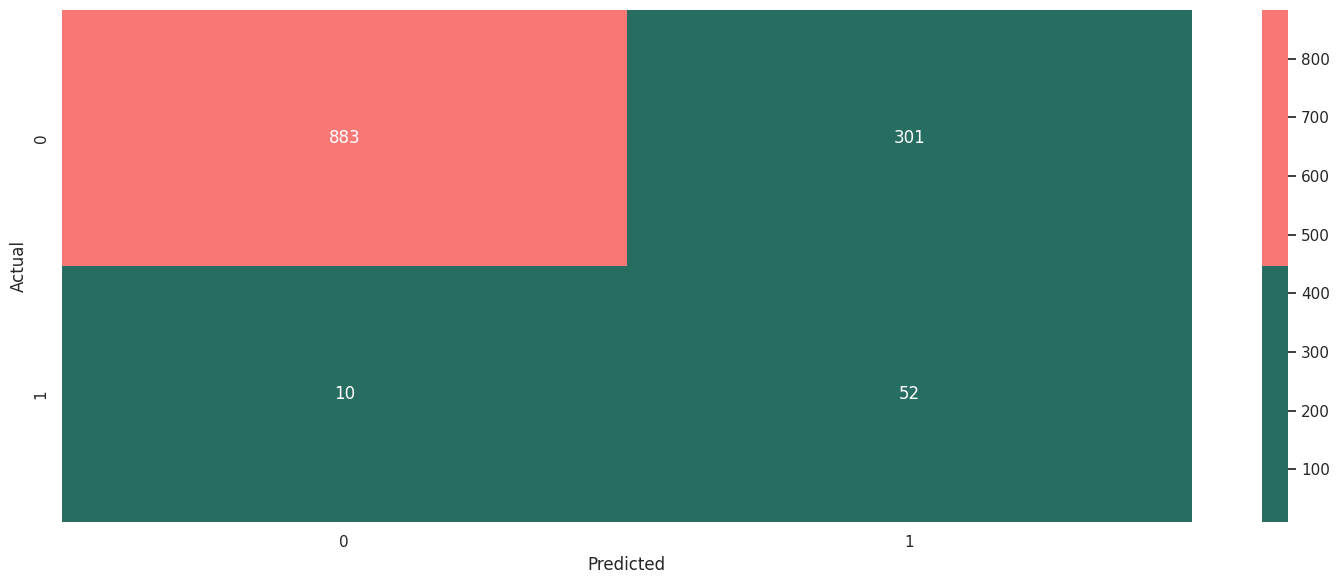

ROC Score:
0.841870095902354


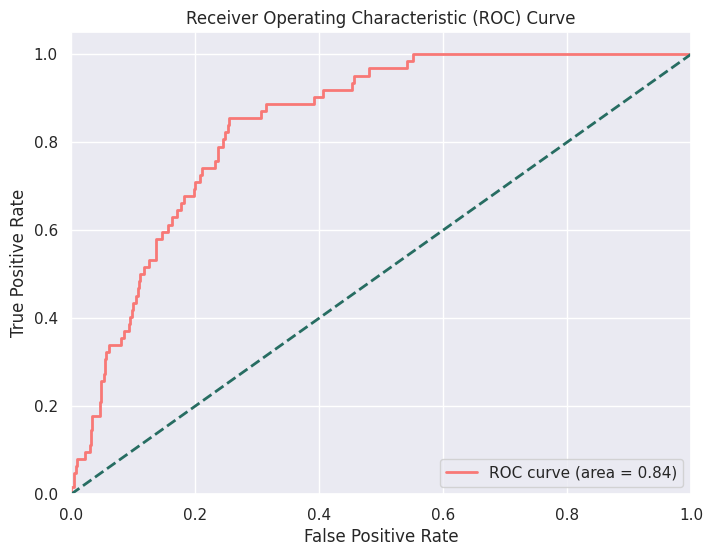

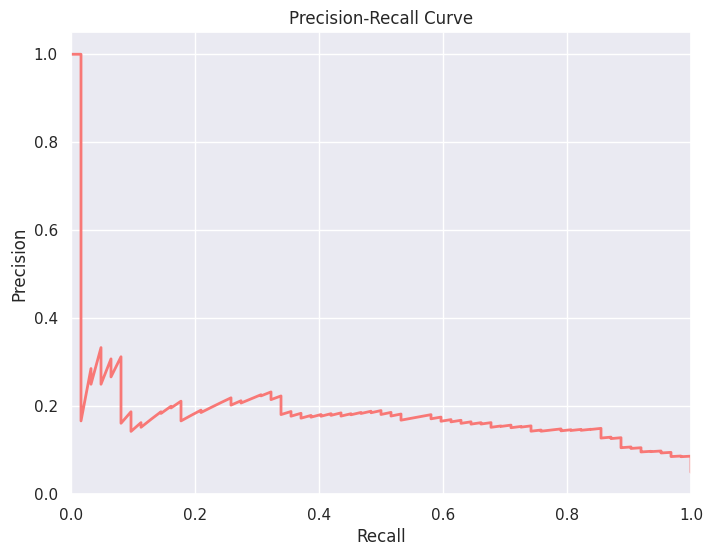

Results for RandomForestClassifier:
train f1 score
1.0
test f1 score
0.7592295345104335
--------------------
[[884 300]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      1184
           1       0.17      1.00      0.29        62

    accuracy                           0.76      1246
   macro avg       0.59      0.87      0.57      1246
weighted avg       0.96      0.76      0.83      1246



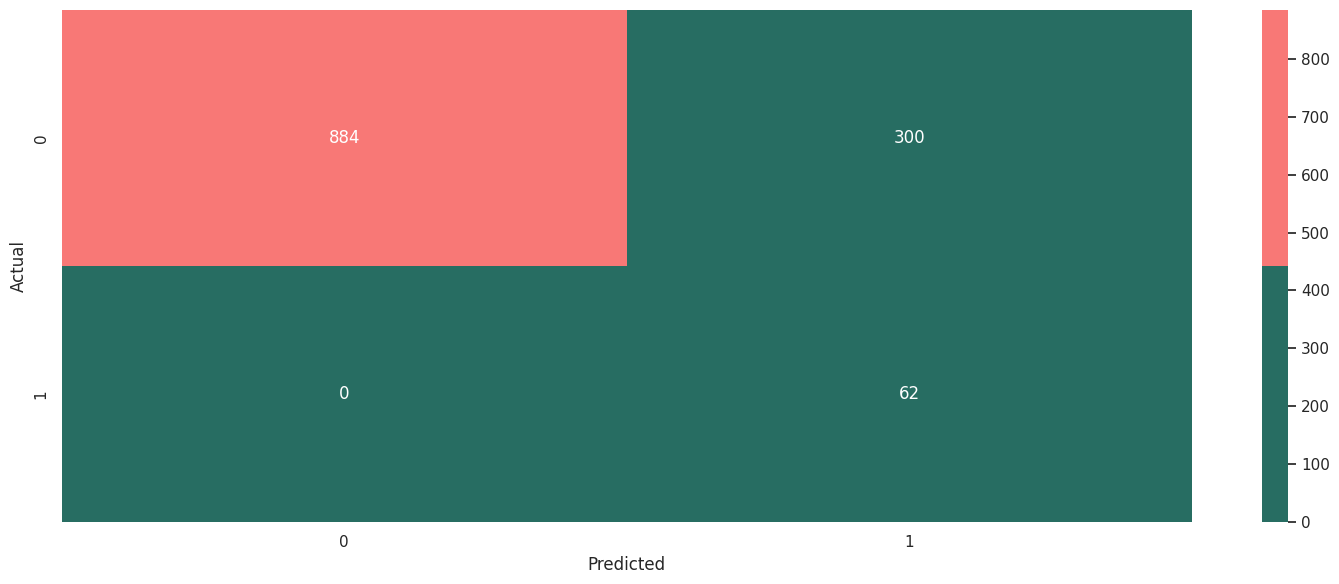

ROC Score:
0.9638322798605057


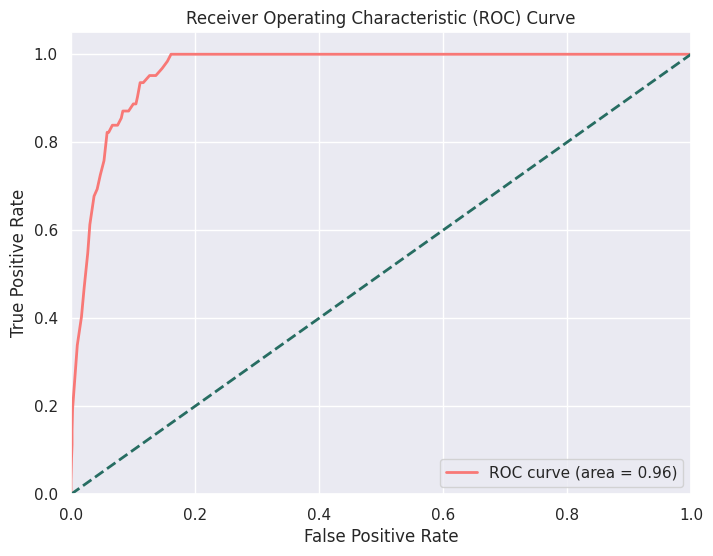

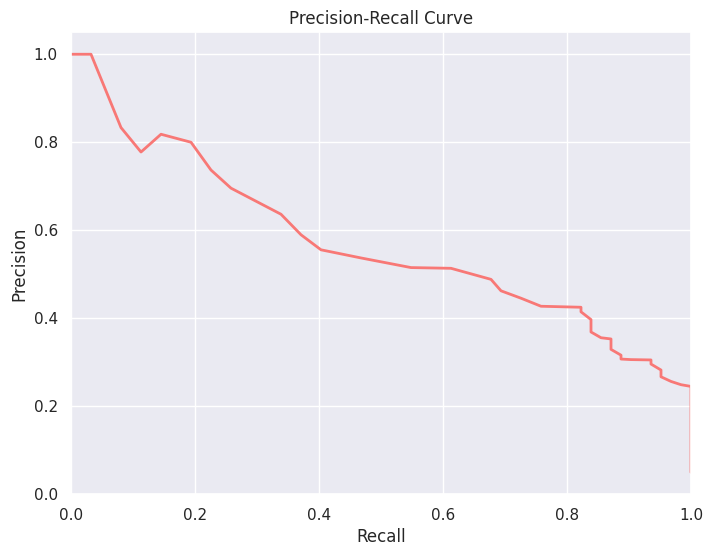

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.732744783306581
--------------------
[[851 333]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1184
           1       0.16      1.00      0.27        62

    accuracy                           0.73      1246
   macro avg       0.58      0.86      0.55      1246
weighted avg       0.96      0.73      0.81      1246



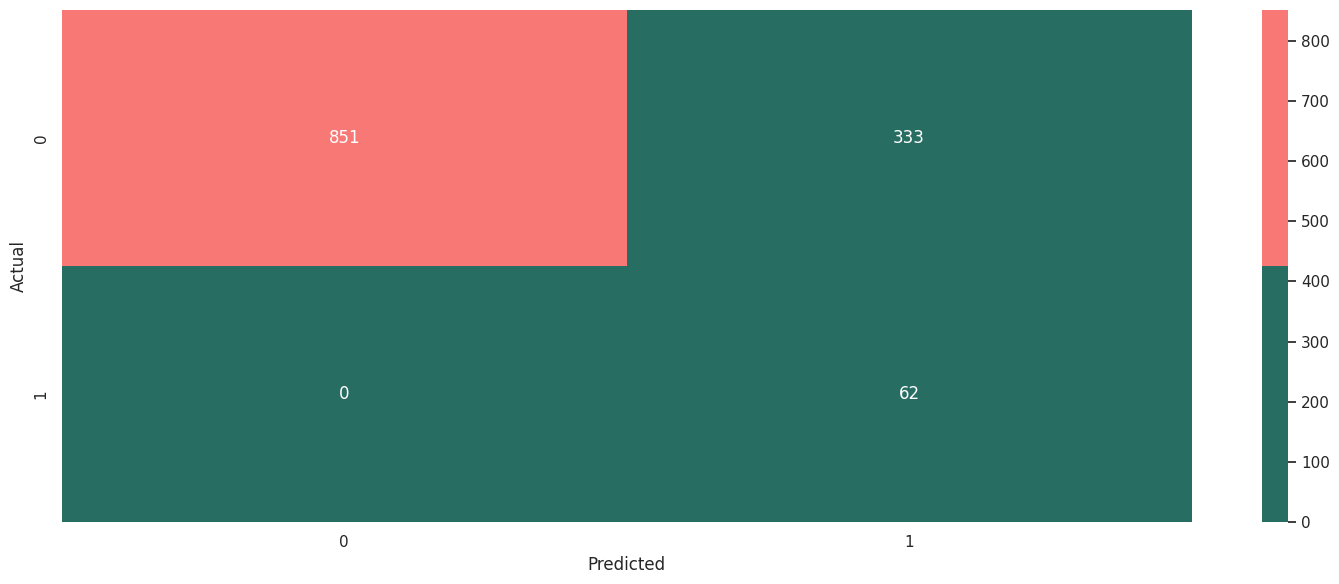

ROC Score:
0.859375


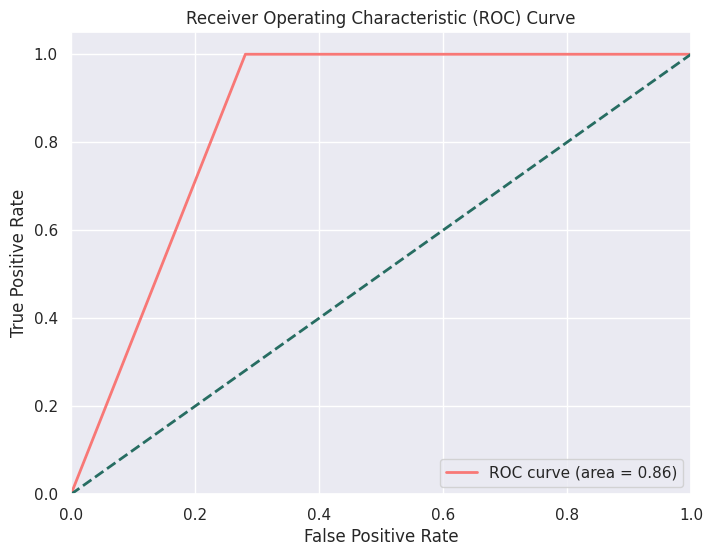

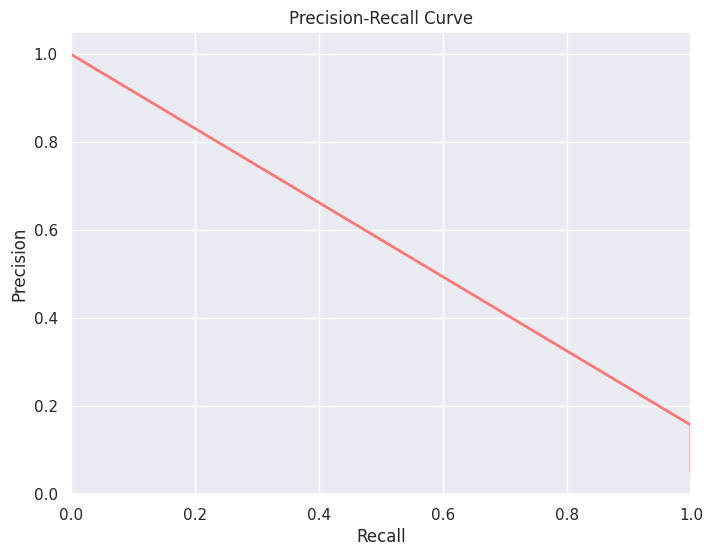

Results for KNeighborsClassifier:
train f1 score
0.7701612903225806
test f1 score
0.6621187800963082
--------------------
[[776 408]
 [ 13  49]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1184
           1       0.11      0.79      0.19        62

    accuracy                           0.66      1246
   macro avg       0.55      0.72      0.49      1246
weighted avg       0.94      0.66      0.76      1246



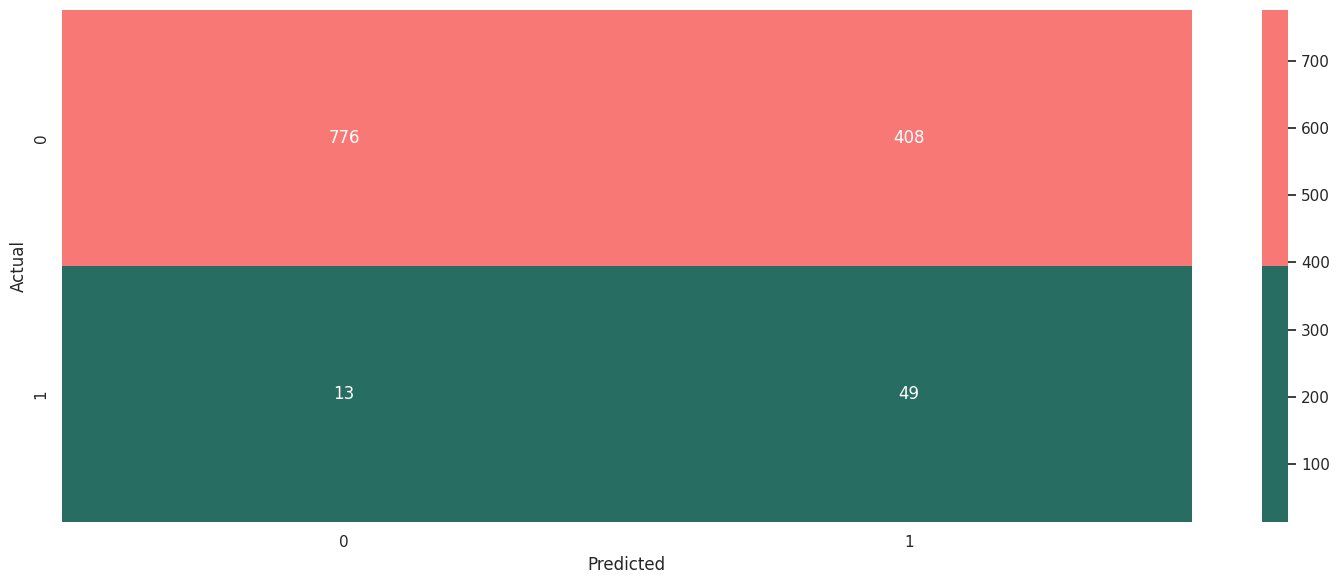

ROC Score:
0.7708696599825633


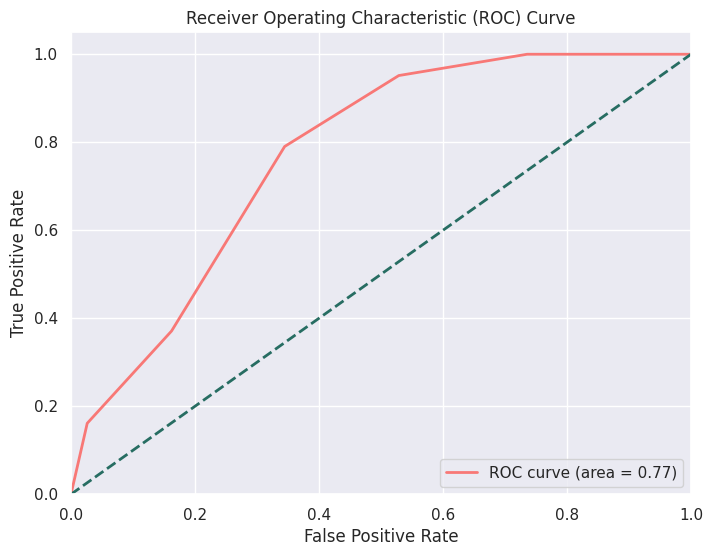

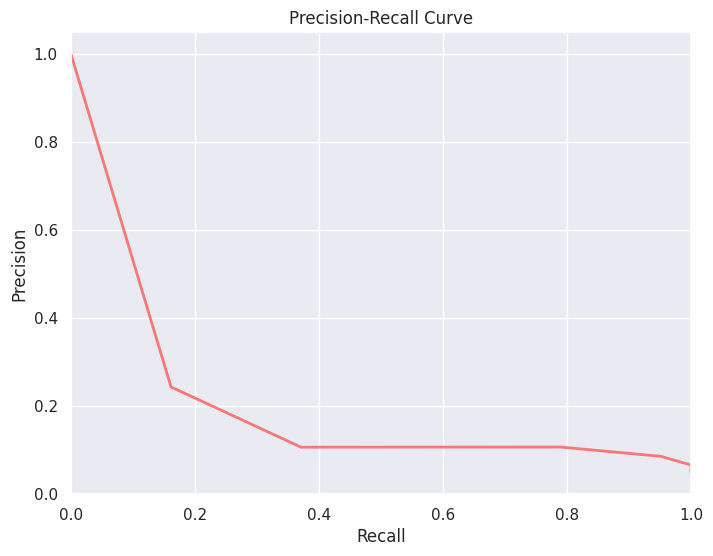

Results for XGBClassifier:
train f1 score
1.0
test f1 score
0.7544141252006421
--------------------
[[878 306]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1184
           1       0.17      1.00      0.29        62

    accuracy                           0.75      1246
   macro avg       0.58      0.87      0.57      1246
weighted avg       0.96      0.75      0.82      1246



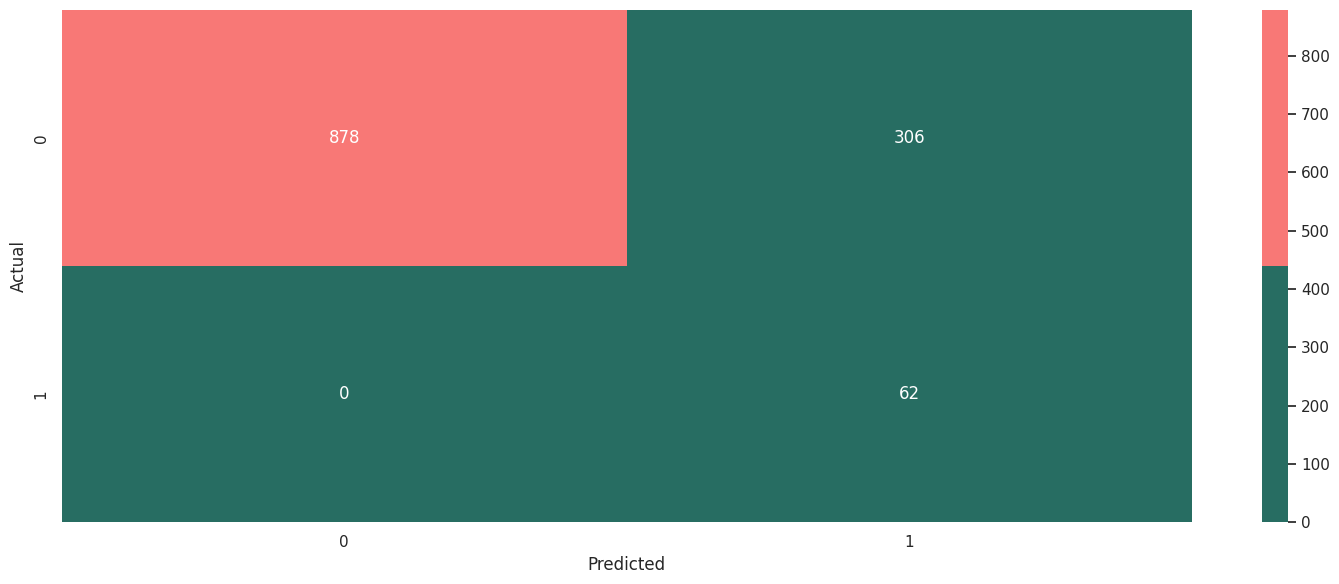

ROC Score:
0.9317649302528335


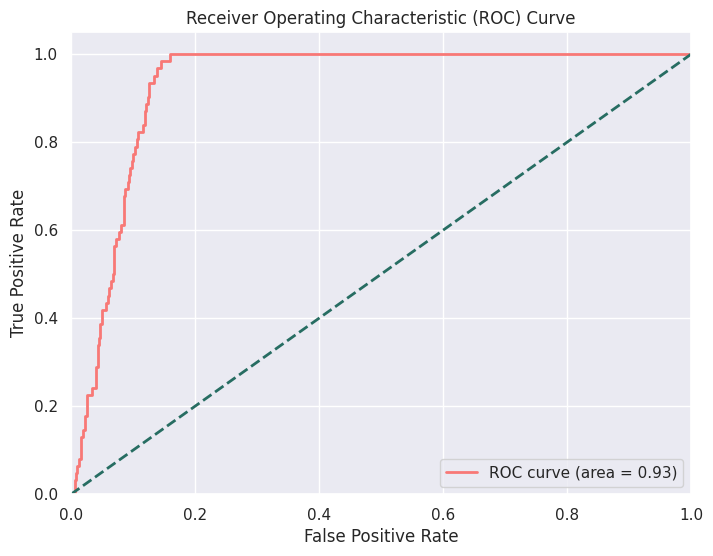

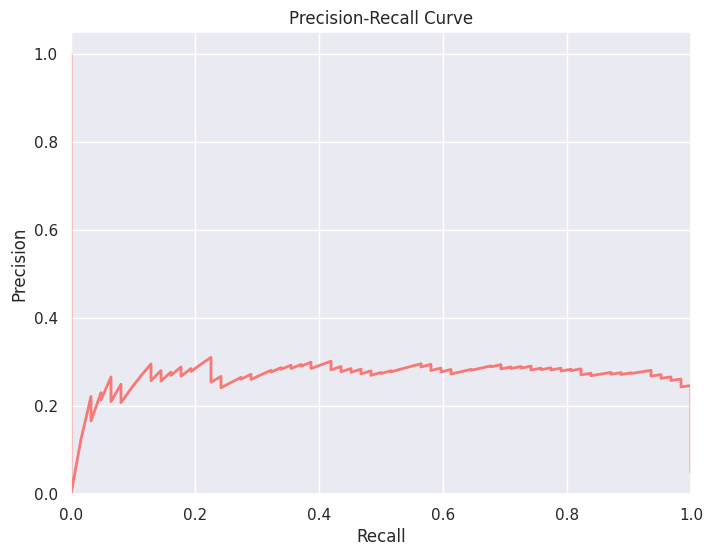

***  Baseline with ROS : ***
Results for LogisticRegression:
train f1 score
0.7668357283741899
test f1 score
0.7439807383627608
--------------------
[[877 307]
 [ 12  50]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1184
           1       0.14      0.81      0.24        62

    accuracy                           0.74      1246
   macro avg       0.56      0.77      0.54      1246
weighted avg       0.94      0.74      0.82      1246



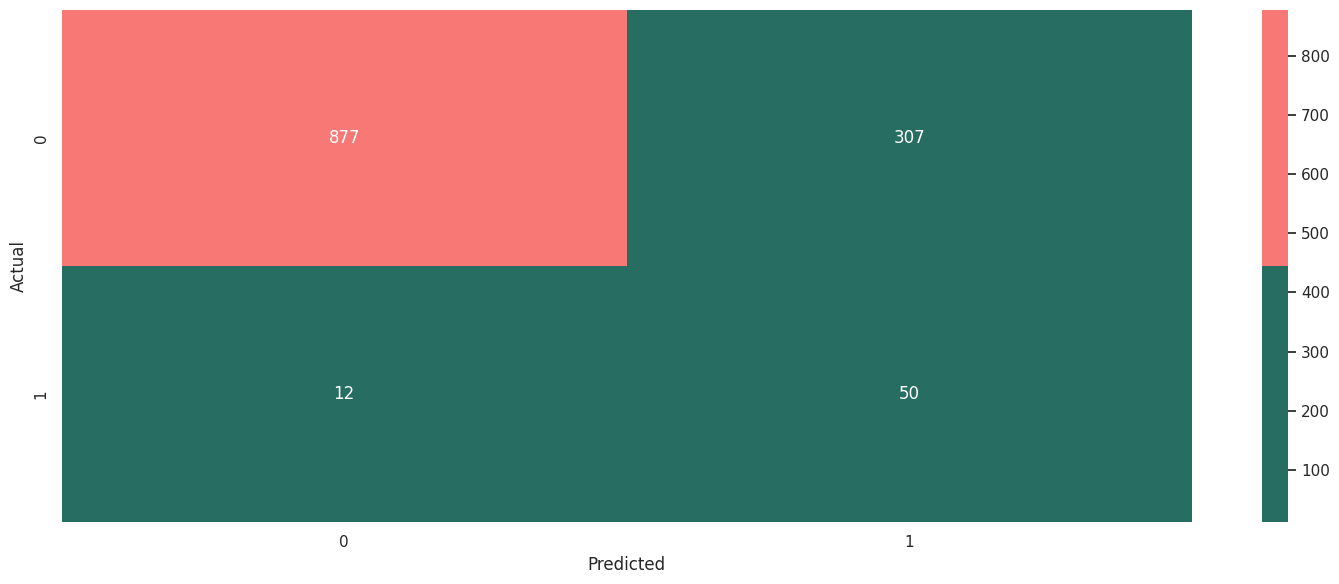

ROC Score:
0.8311764385353095


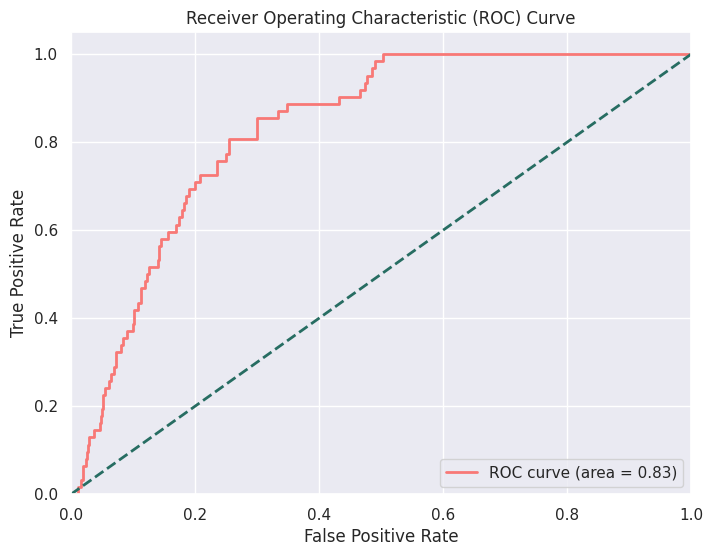

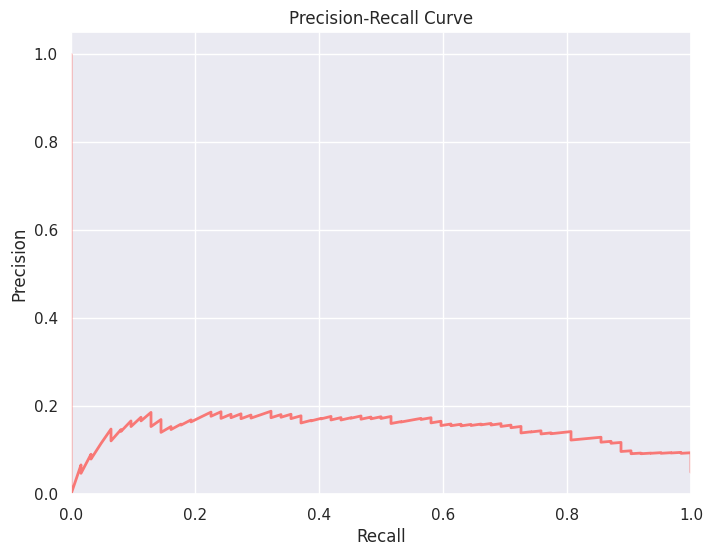

Results for RandomForestClassifier:
train f1 score
1.0
test f1 score
0.9398073836276083
--------------------
[[1168   16]
 [  59    3]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1184
           1       0.16      0.05      0.07        62

    accuracy                           0.94      1246
   macro avg       0.55      0.52      0.52      1246
weighted avg       0.91      0.94      0.92      1246



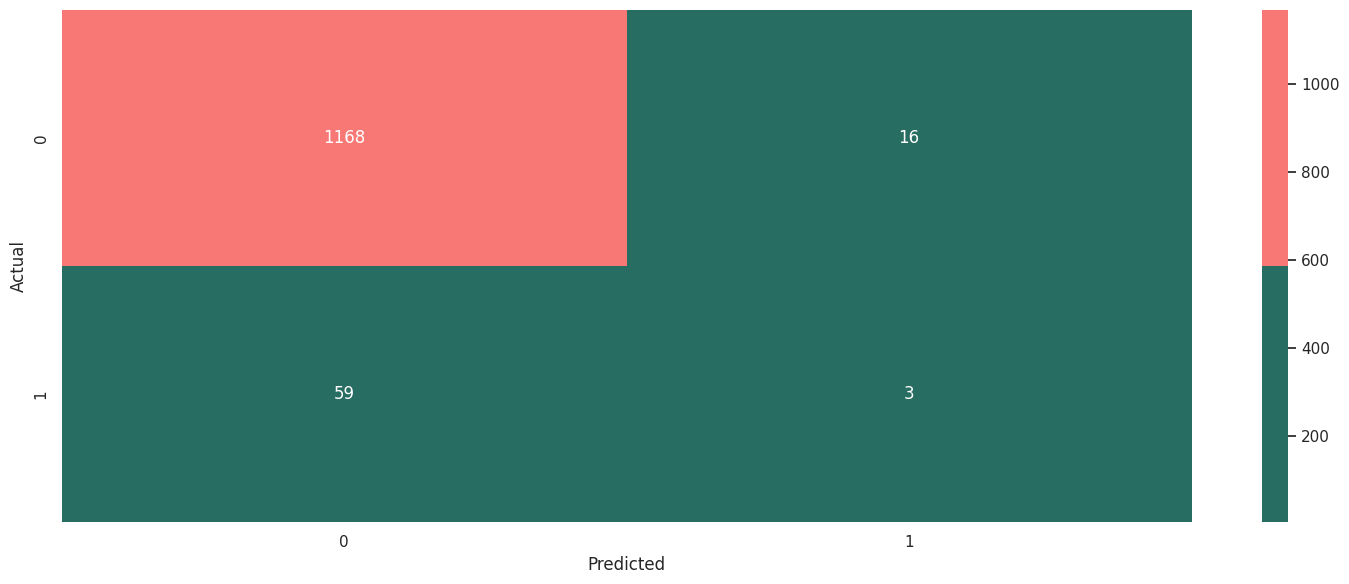

ROC Score:
0.7971542611159546


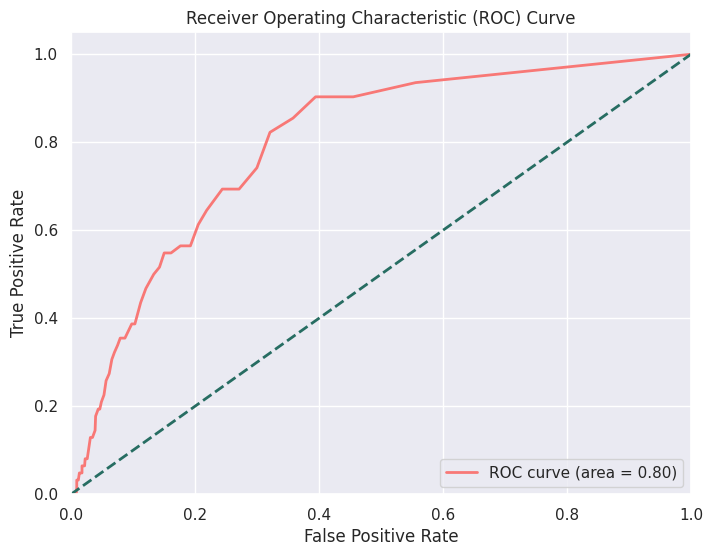

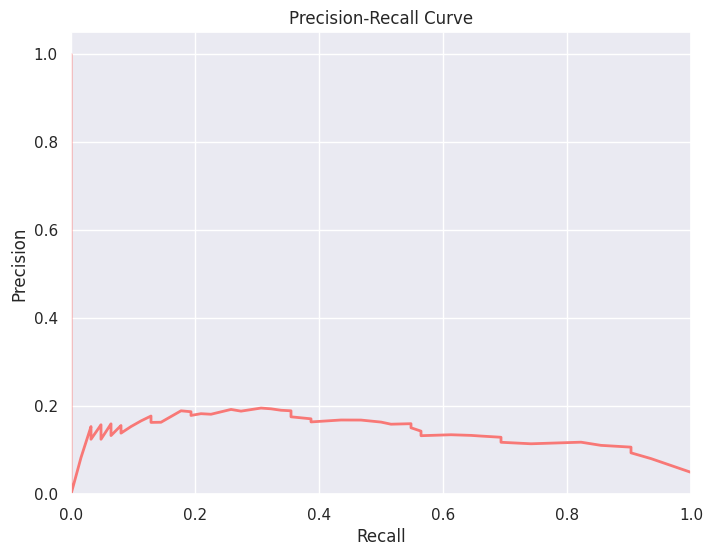

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.9189406099518459
--------------------
[[1139   45]
 [  56    6]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1184
           1       0.12      0.10      0.11        62

    accuracy                           0.92      1246
   macro avg       0.54      0.53      0.53      1246
weighted avg       0.91      0.92      0.92      1246



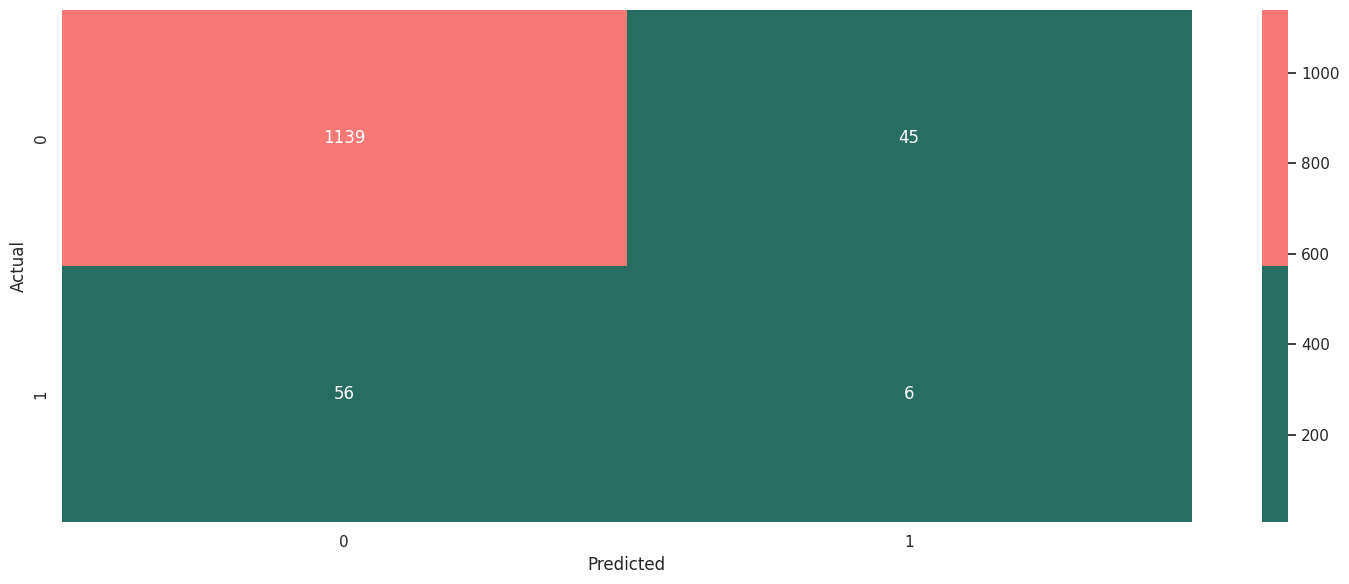

ROC Score:
0.529383718395815


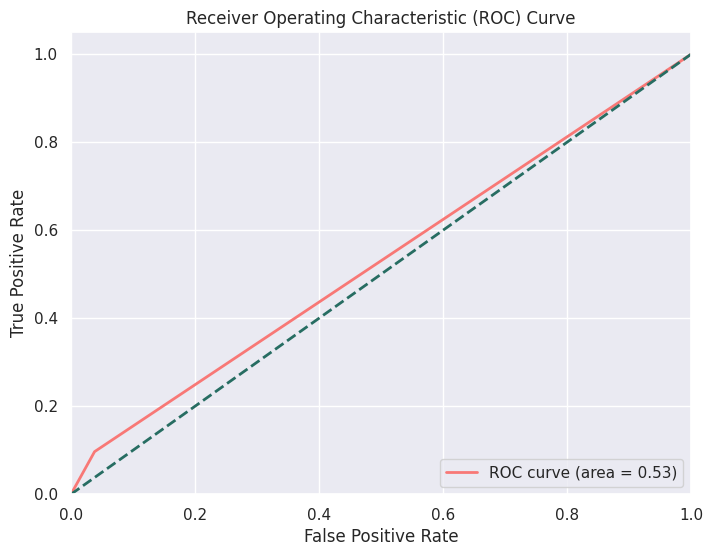

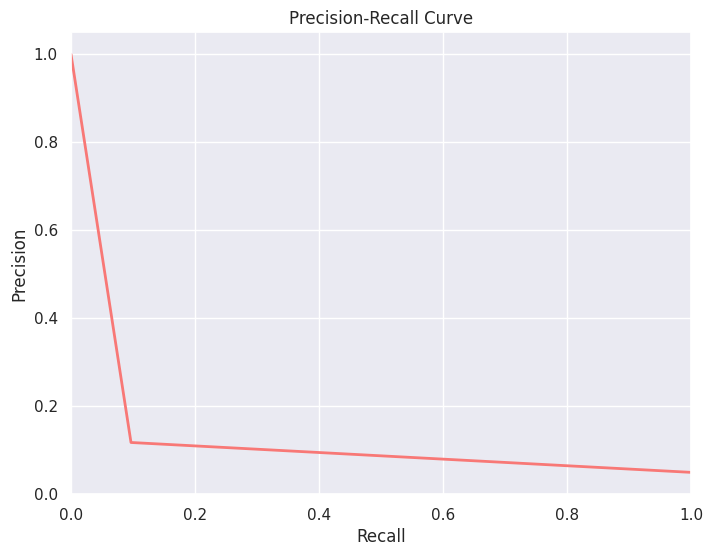

Results for KNeighborsClassifier:
train f1 score
0.9566074950690335
test f1 score
0.8443017656500803
--------------------
[[1033  151]
 [  43   19]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1184
           1       0.11      0.31      0.16        62

    accuracy                           0.84      1246
   macro avg       0.54      0.59      0.54      1246
weighted avg       0.92      0.84      0.88      1246



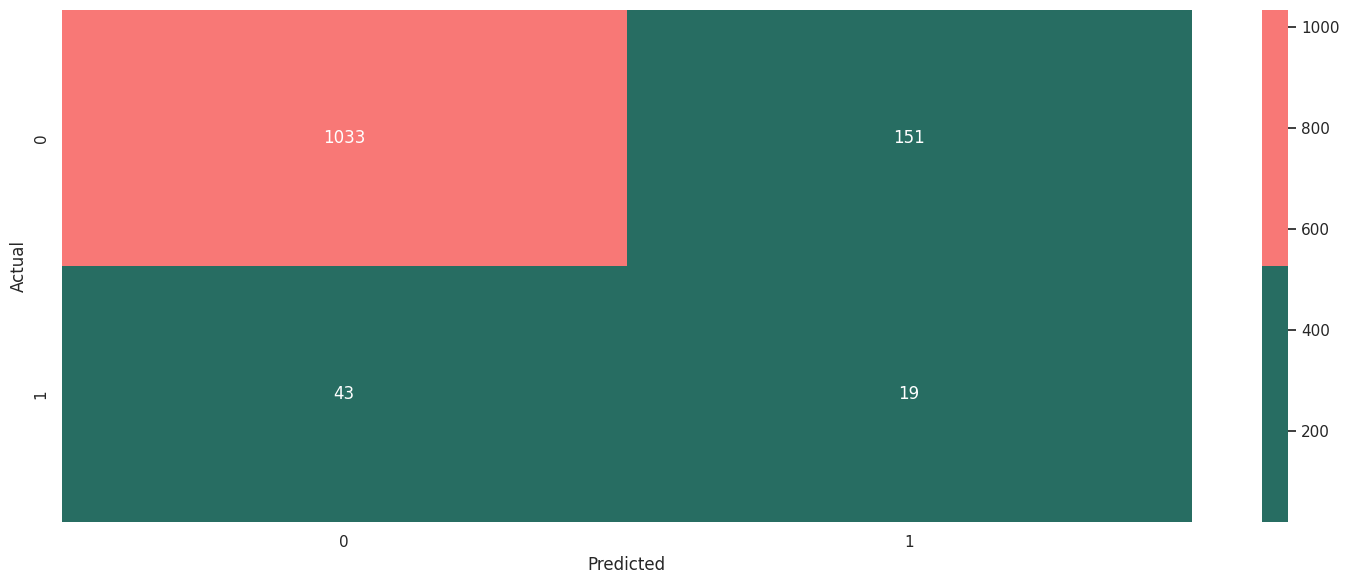

ROC Score:
0.6352917938099389


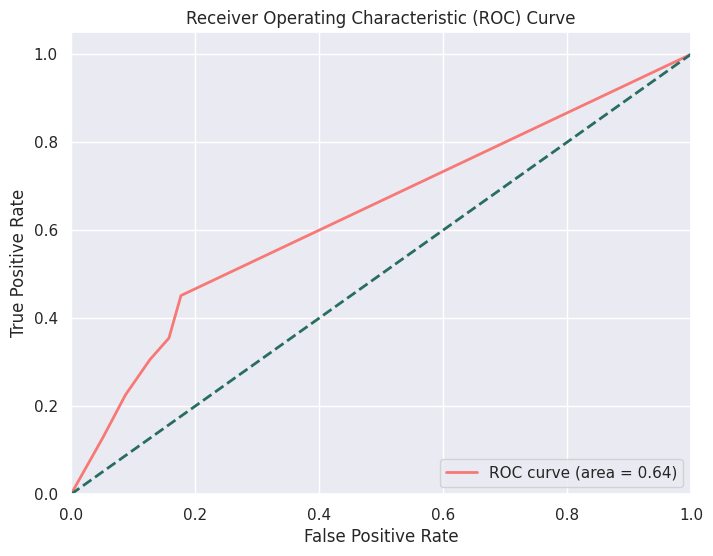

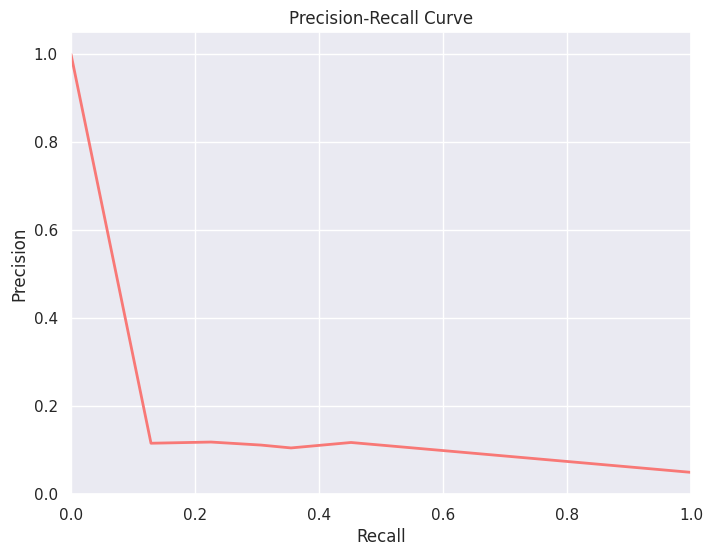

Results for XGBClassifier:
train f1 score
0.9985911524373062
test f1 score
0.9157303370786517
--------------------
[[1134   50]
 [  55    7]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1184
           1       0.12      0.11      0.12        62

    accuracy                           0.92      1246
   macro avg       0.54      0.54      0.54      1246
weighted avg       0.91      0.92      0.91      1246



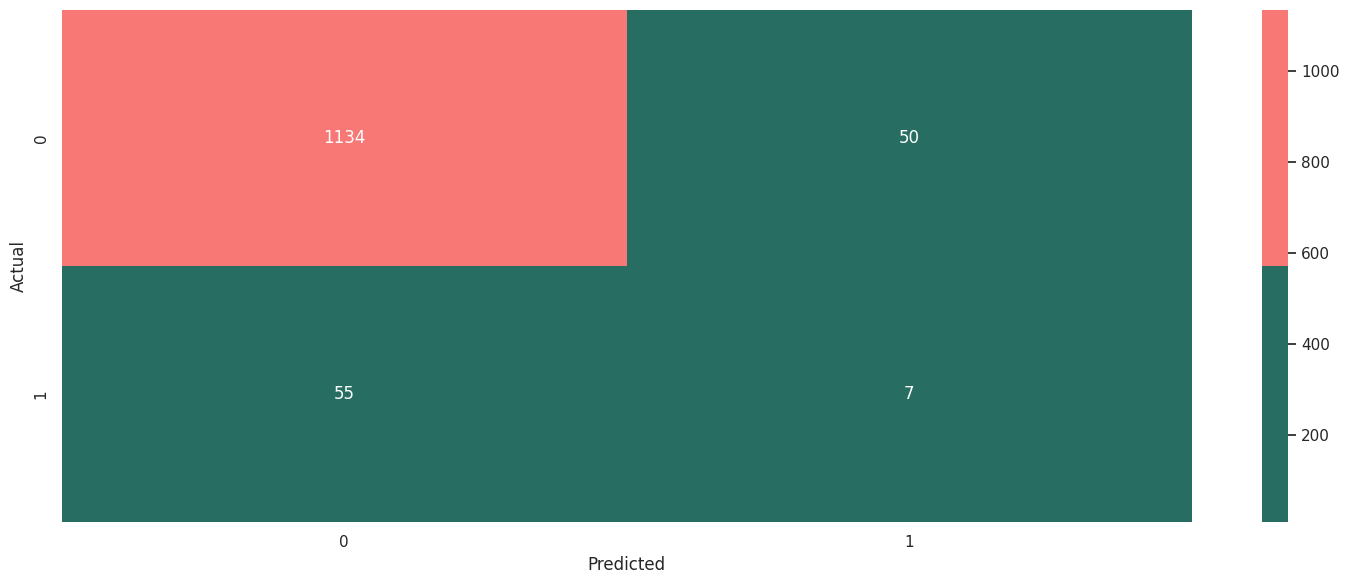

ROC Score:
0.7952675457715781


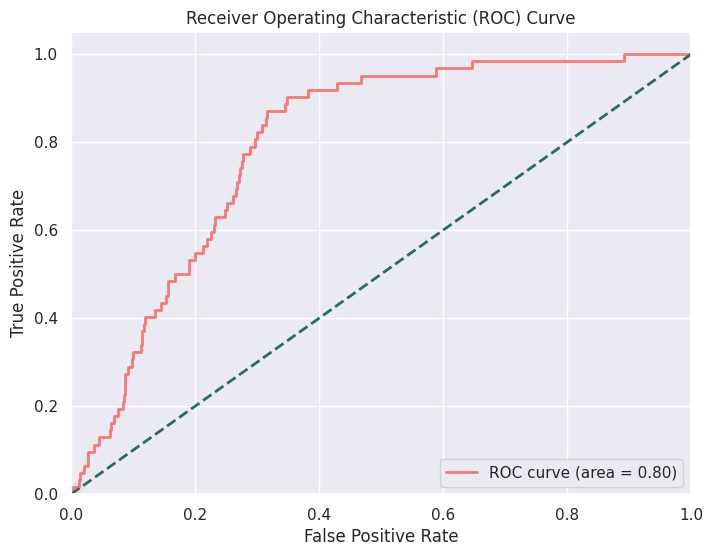

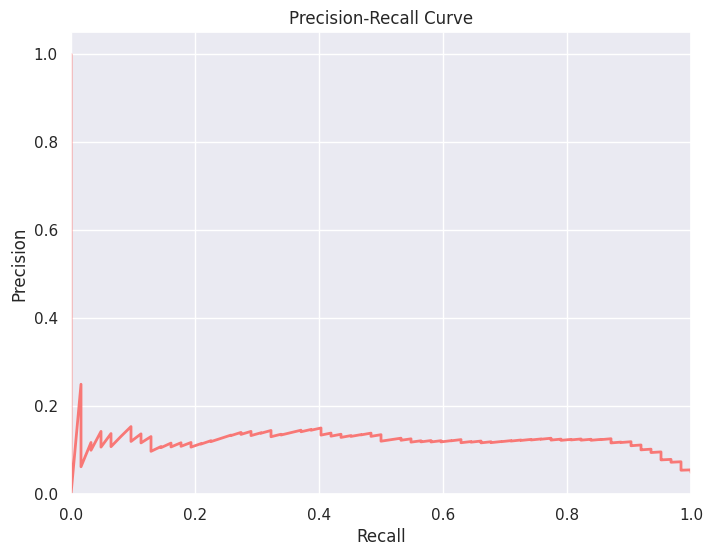

***  Baseline with SMOTE : ***
Results for LogisticRegression:
train f1 score
0.7786700479008172
test f1 score
0.7487961476725522
--------------------
[[884 300]
 [ 13  49]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1184
           1       0.14      0.79      0.24        62

    accuracy                           0.75      1246
   macro avg       0.56      0.77      0.54      1246
weighted avg       0.94      0.75      0.82      1246



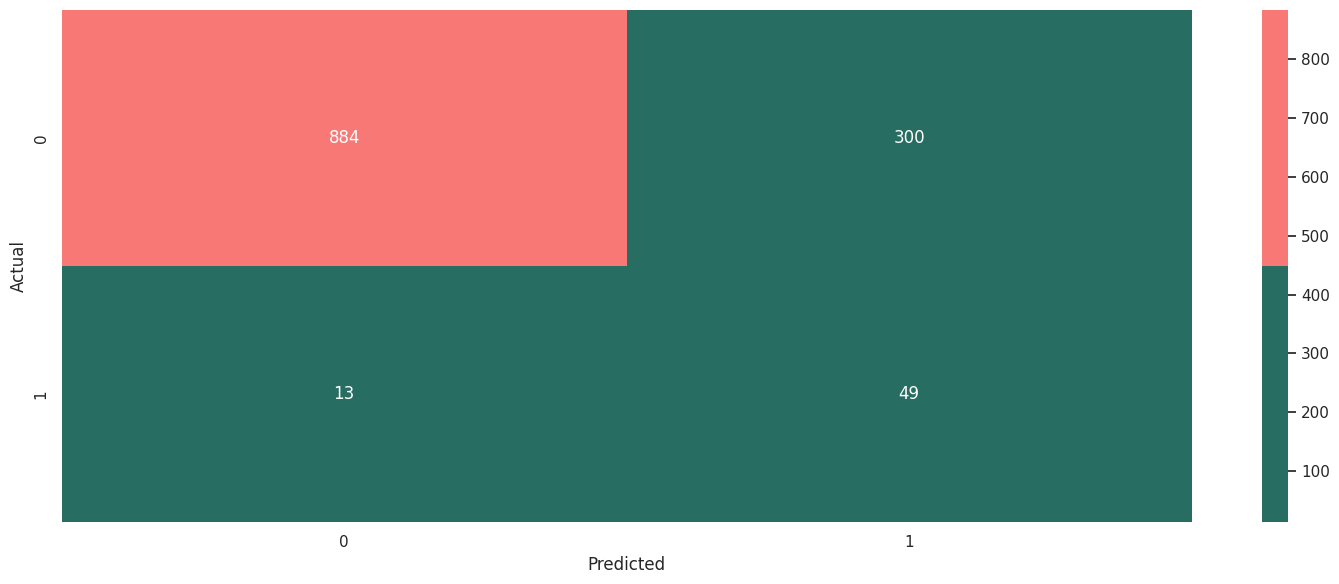

ROC Score:
0.8346774193548386


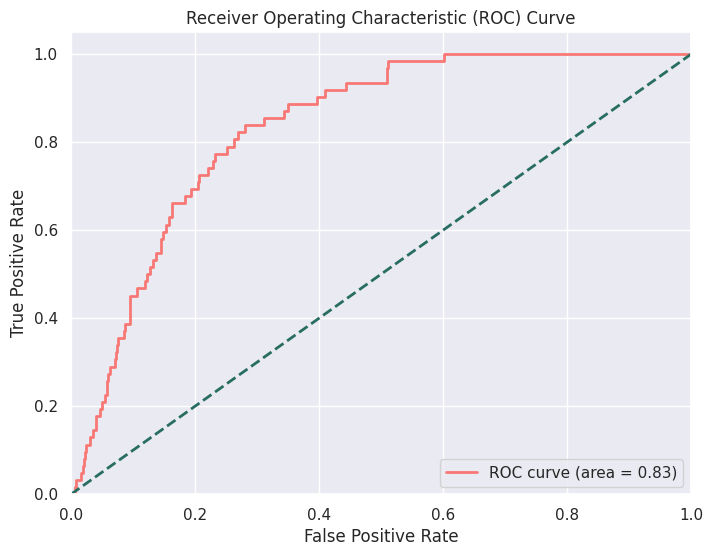

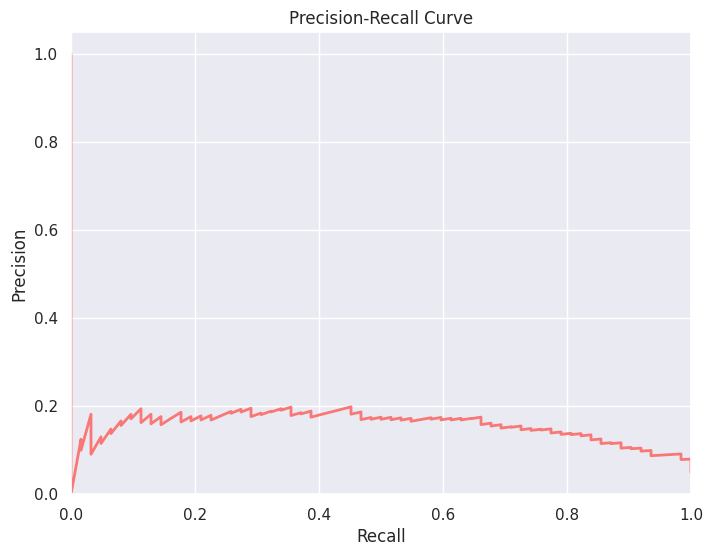

Results for RandomForestClassifier:
train f1 score
1.0
test f1 score
0.878812199036918
--------------------
[[1072  112]
 [  39   23]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1184
           1       0.17      0.37      0.23        62

    accuracy                           0.88      1246
   macro avg       0.57      0.64      0.58      1246
weighted avg       0.93      0.88      0.90      1246



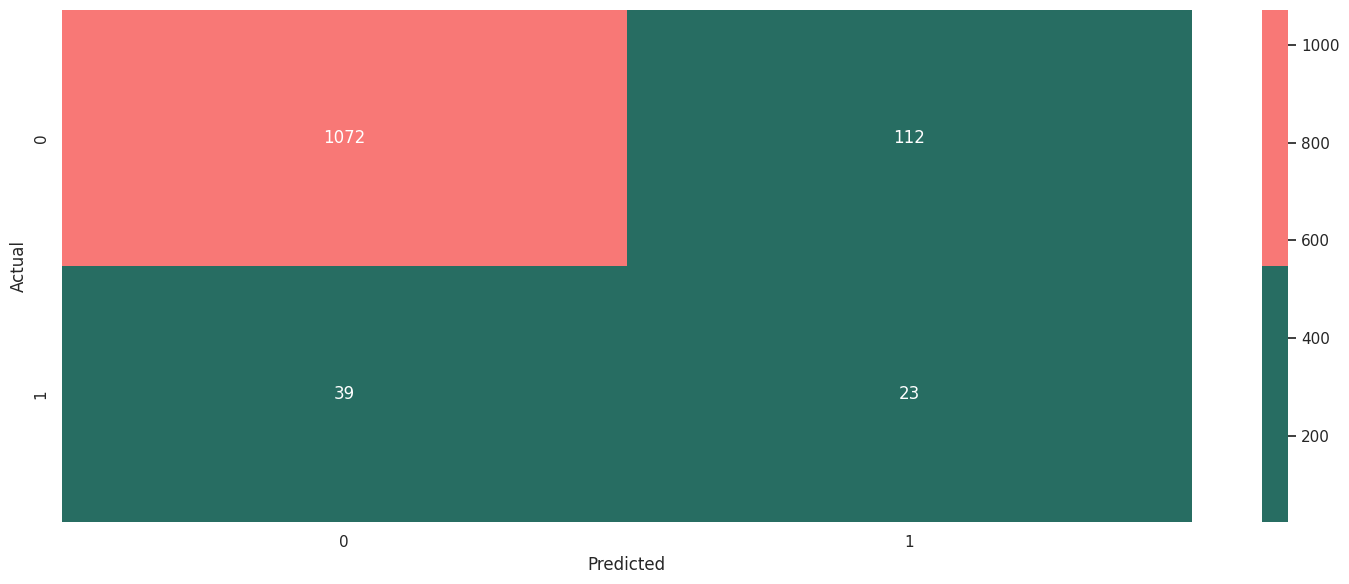

ROC Score:
0.822362685265911


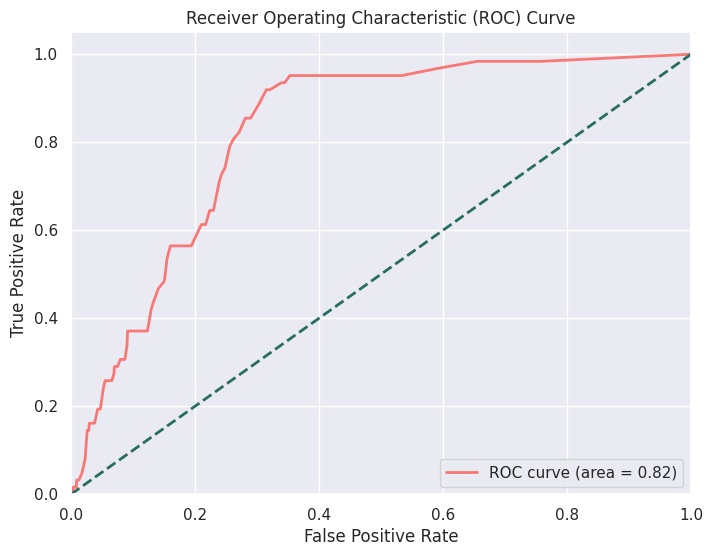

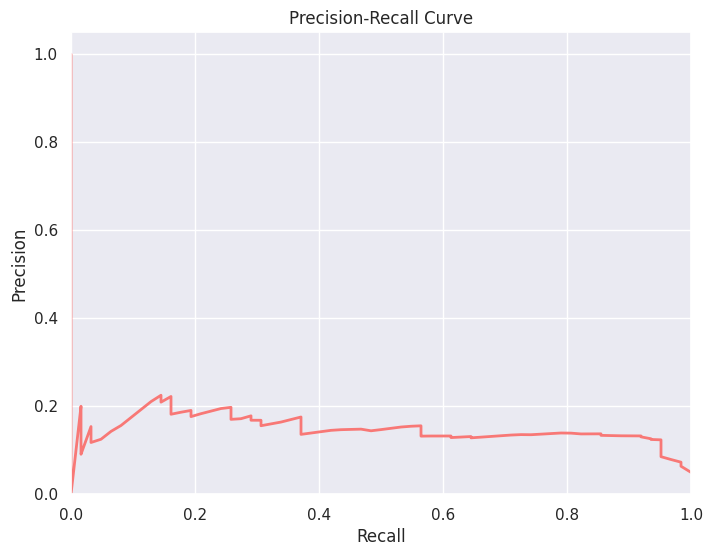

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.8507223113964687
--------------------
[[1044  140]
 [  46   16]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1184
           1       0.10      0.26      0.15        62

    accuracy                           0.85      1246
   macro avg       0.53      0.57      0.53      1246
weighted avg       0.92      0.85      0.88      1246



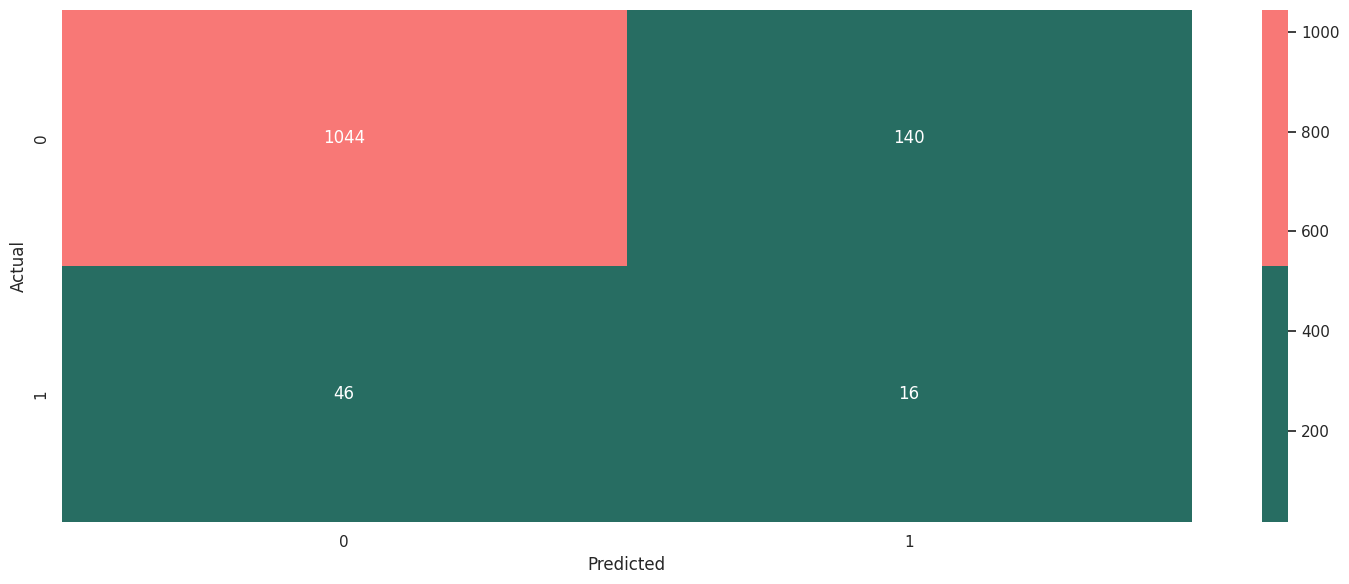

ROC Score:
0.5699106364428945


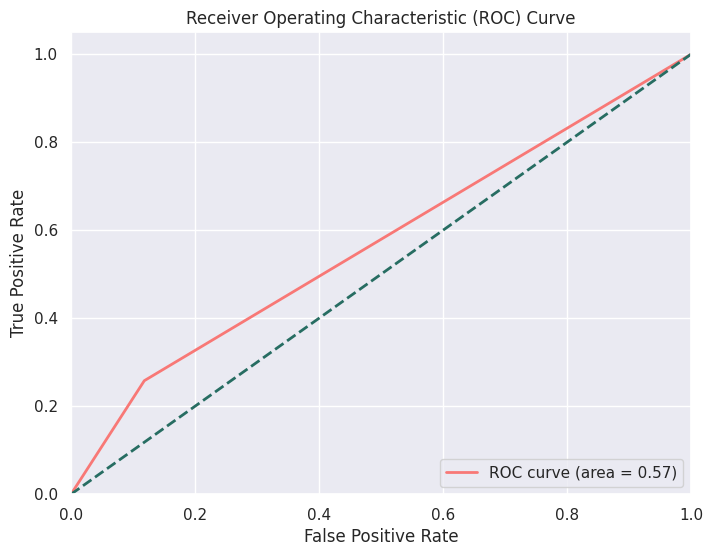

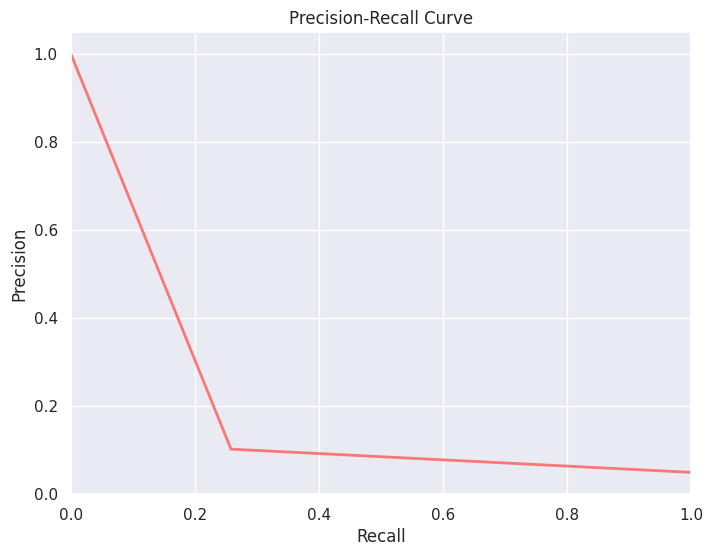

Results for KNeighborsClassifier:
train f1 score
0.9139194139194139
test f1 score
0.7873194221508828
--------------------
[[953 231]
 [ 34  28]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1184
           1       0.11      0.45      0.17        62

    accuracy                           0.79      1246
   macro avg       0.54      0.63      0.53      1246
weighted avg       0.92      0.79      0.84      1246



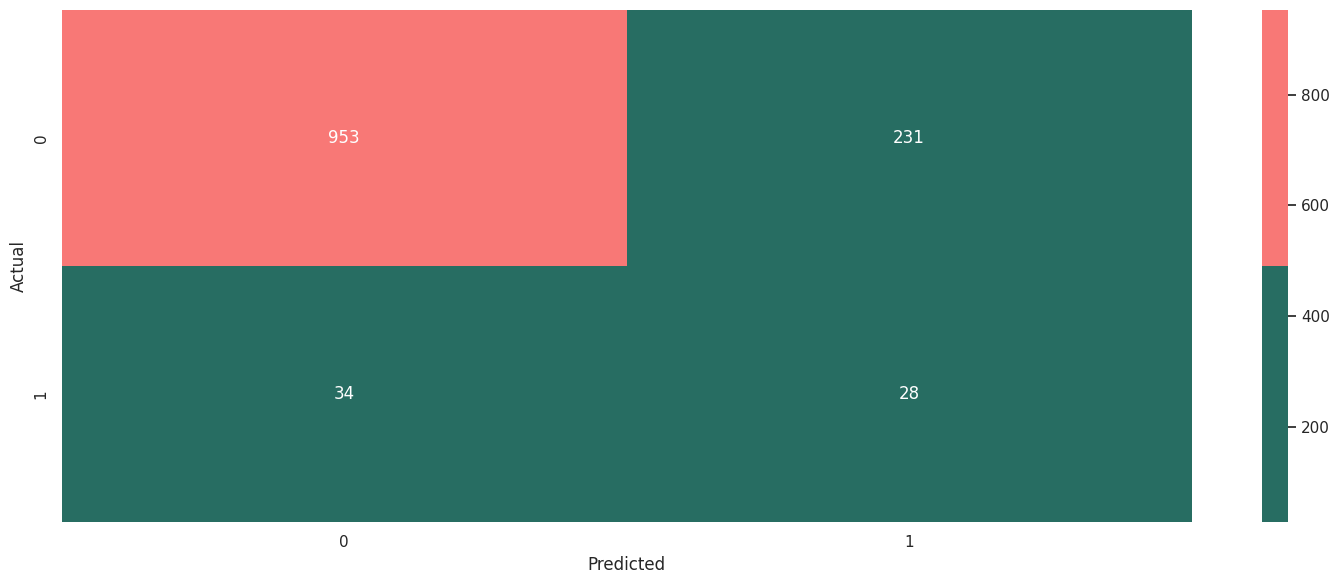

ROC Score:
0.6710576503923278


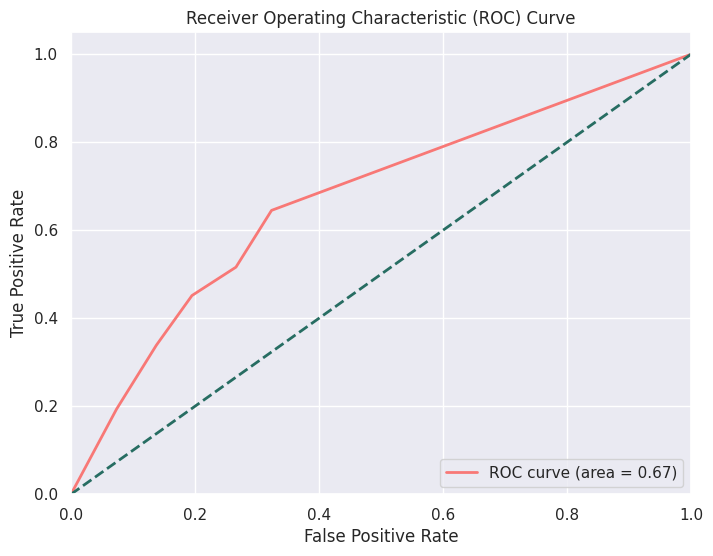

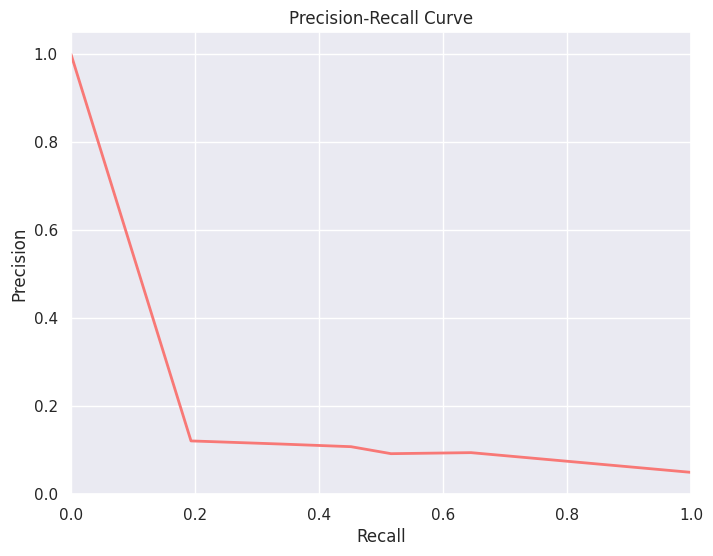

Results for XGBClassifier:
train f1 score
0.9935193012116089
test f1 score
0.9285714285714286
--------------------
[[1153   31]
 [  58    4]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1184
           1       0.11      0.06      0.08        62

    accuracy                           0.93      1246
   macro avg       0.53      0.52      0.52      1246
weighted avg       0.91      0.93      0.92      1246



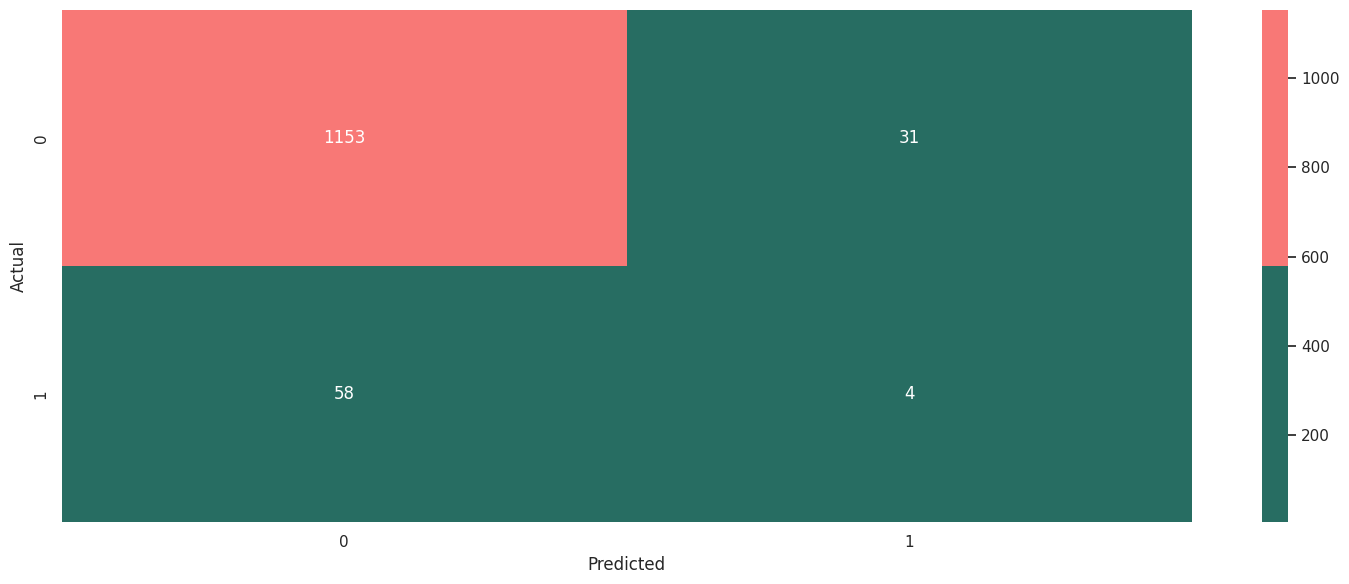

ROC Score:
0.7995313862249346


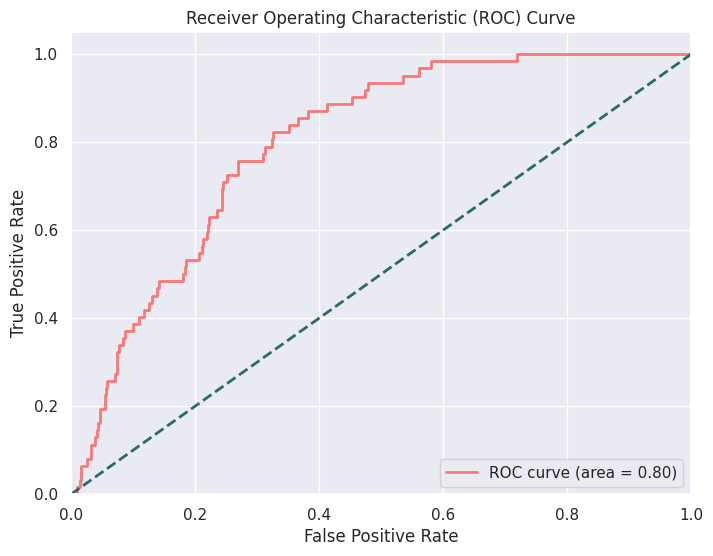

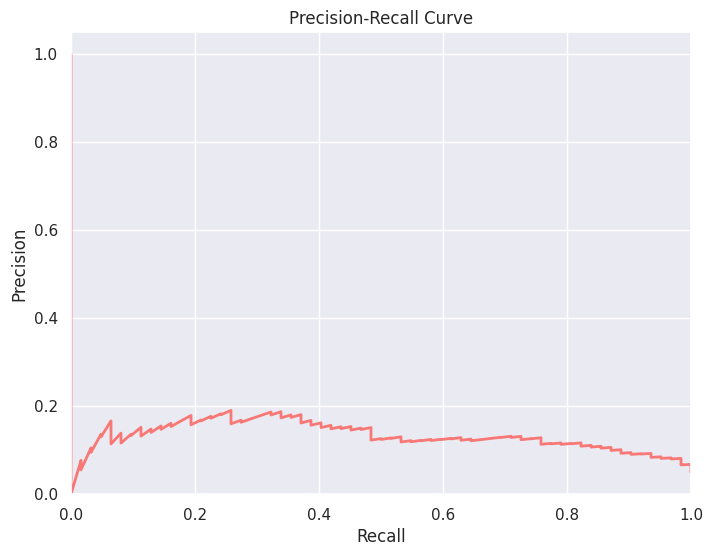

***  Baseline with ADASYN : ***
Results for LogisticRegression:
train f1 score
0.7791824694479562
test f1 score
0.7439807383627608
--------------------
[[879 305]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1184
           1       0.14      0.77      0.23        62

    accuracy                           0.74      1246
   macro avg       0.56      0.76      0.54      1246
weighted avg       0.94      0.74      0.82      1246



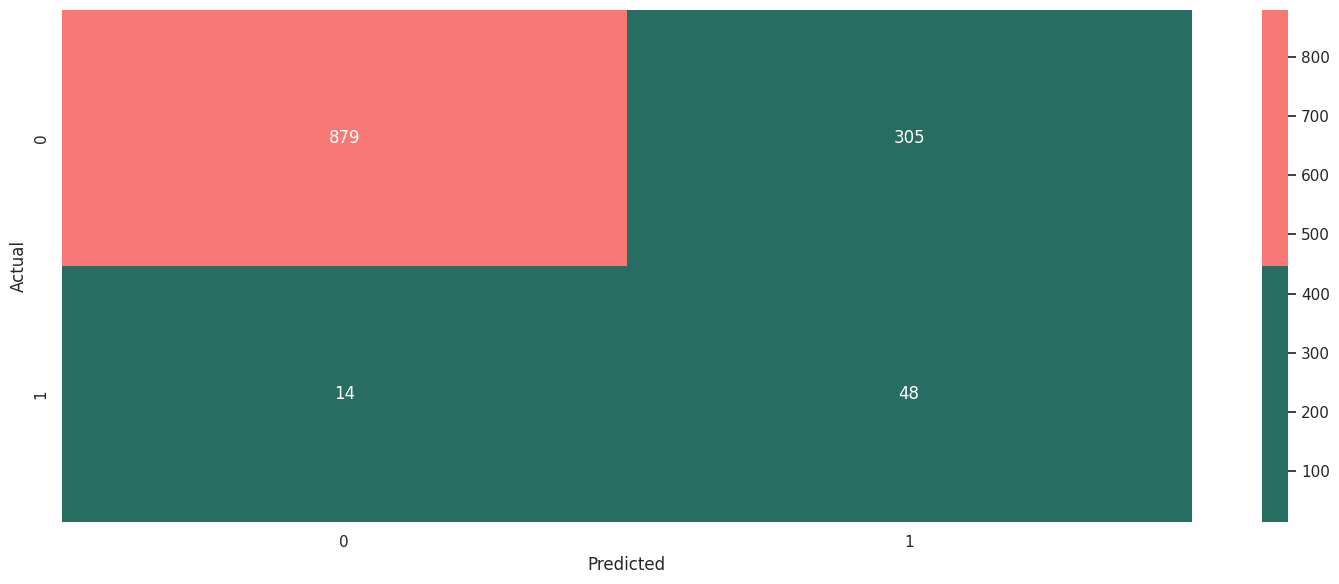

ROC Score:
0.8332743025283348


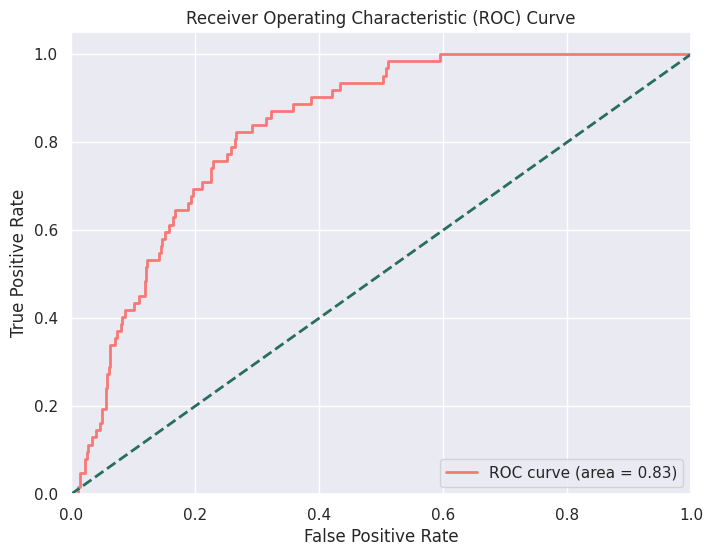

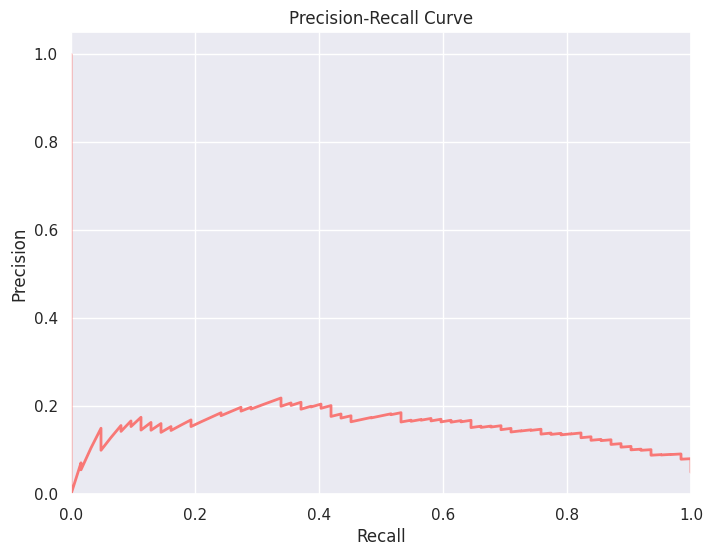

Results for RandomForestClassifier:
train f1 score
1.0
test f1 score
0.8659711075441413
--------------------
[[1057  127]
 [  40   22]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1184
           1       0.15      0.35      0.21        62

    accuracy                           0.87      1246
   macro avg       0.56      0.62      0.57      1246
weighted avg       0.92      0.87      0.89      1246



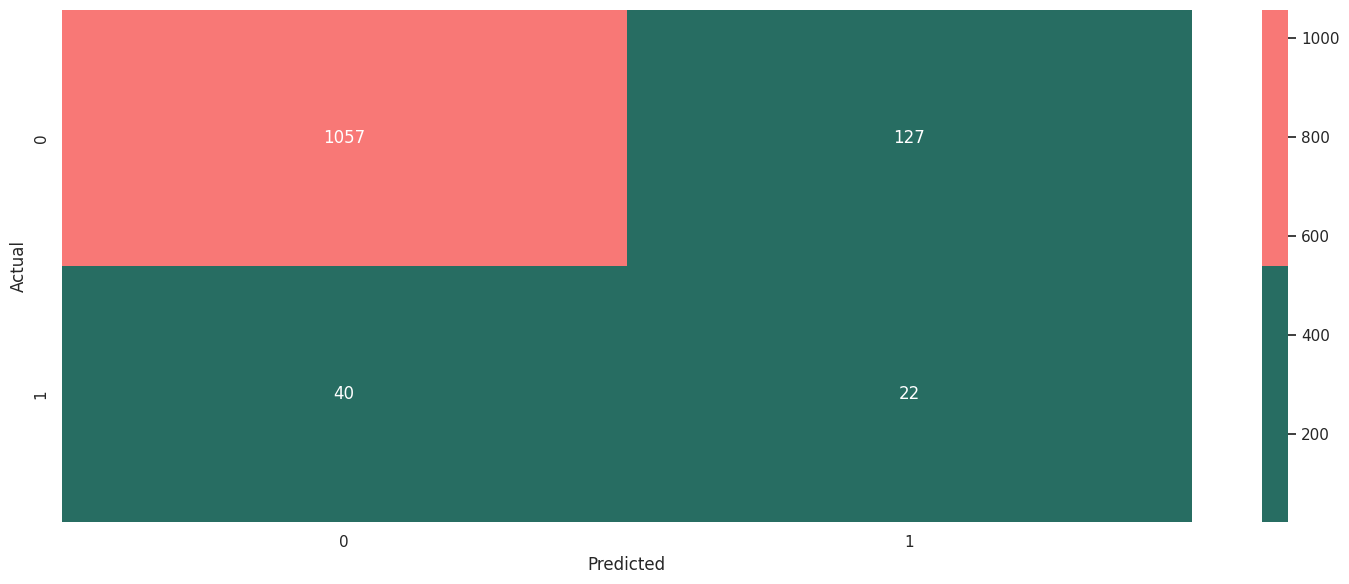

ROC Score:
0.8213409982563208


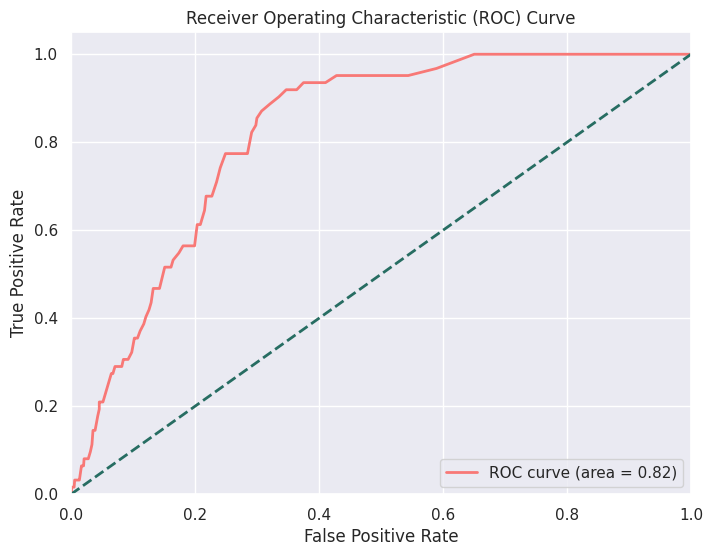

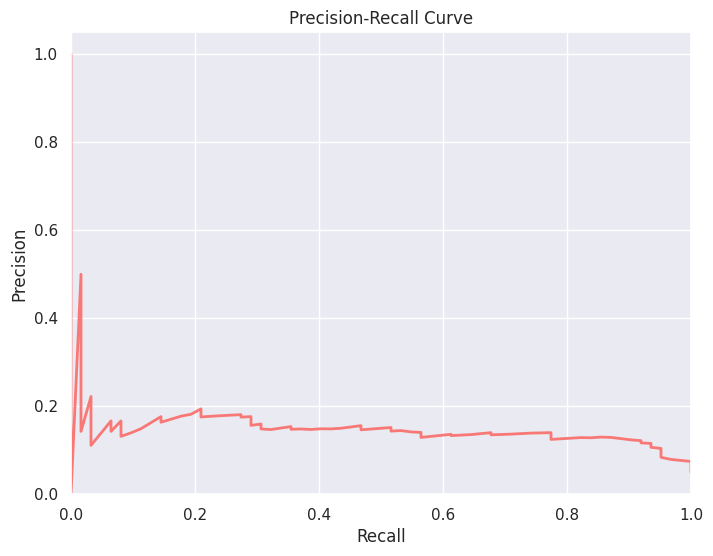

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.869983948635634
--------------------
[[1066  118]
 [  44   18]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1184
           1       0.13      0.29      0.18        62

    accuracy                           0.87      1246
   macro avg       0.55      0.60      0.56      1246
weighted avg       0.92      0.87      0.89      1246



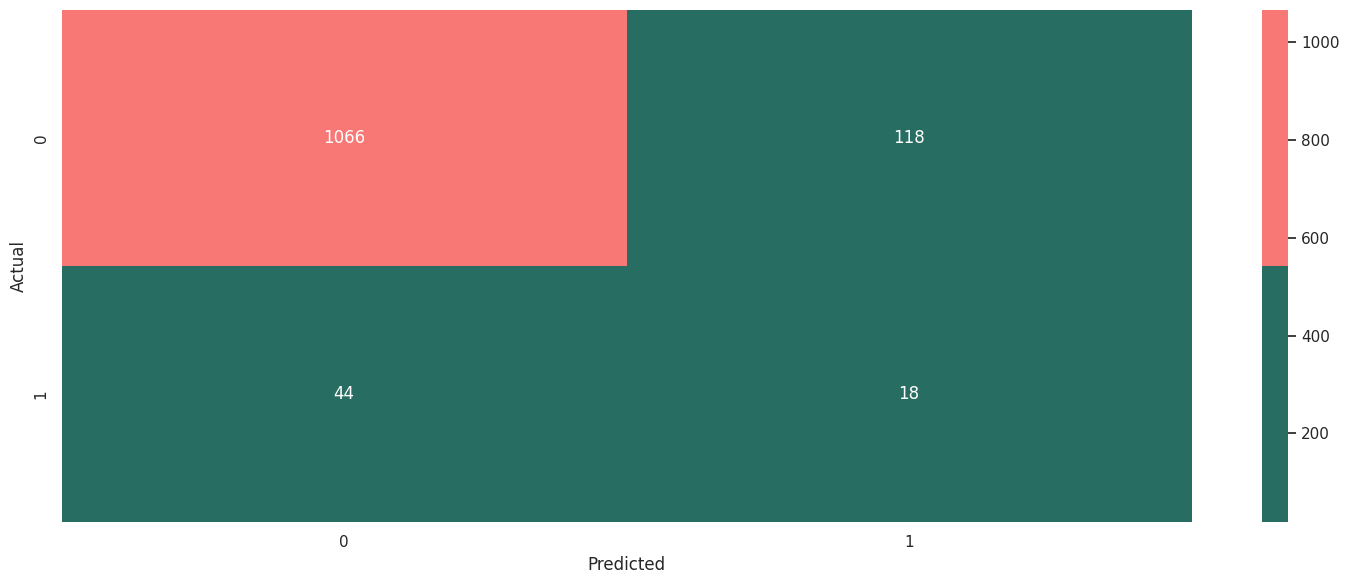

ROC Score:
0.5953302092414996


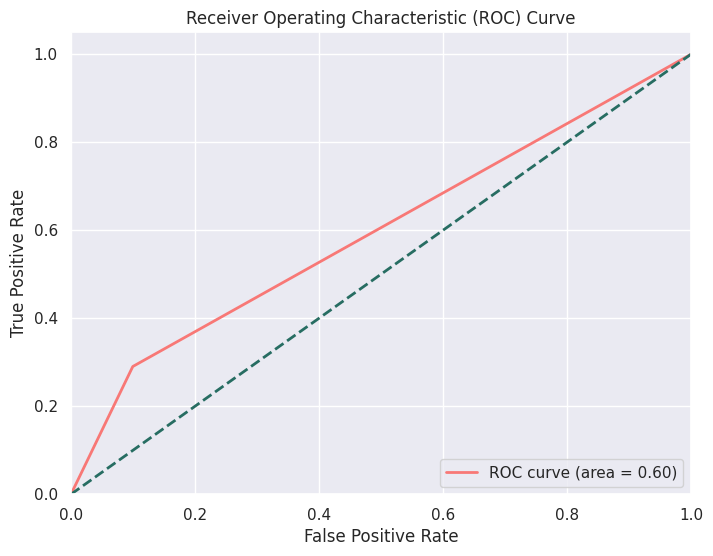

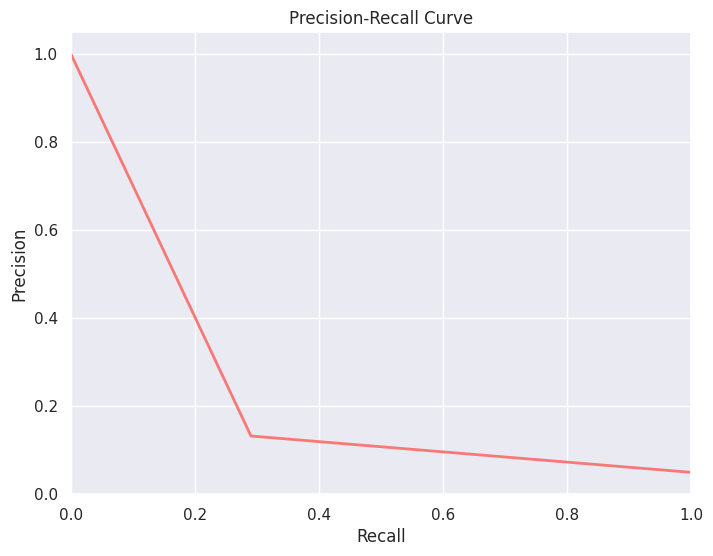

Results for KNeighborsClassifier:
train f1 score
0.909818794774547
test f1 score
0.7784911717495987
--------------------
[[939 245]
 [ 31  31]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1184
           1       0.11      0.50      0.18        62

    accuracy                           0.78      1246
   macro avg       0.54      0.65      0.53      1246
weighted avg       0.93      0.78      0.84      1246



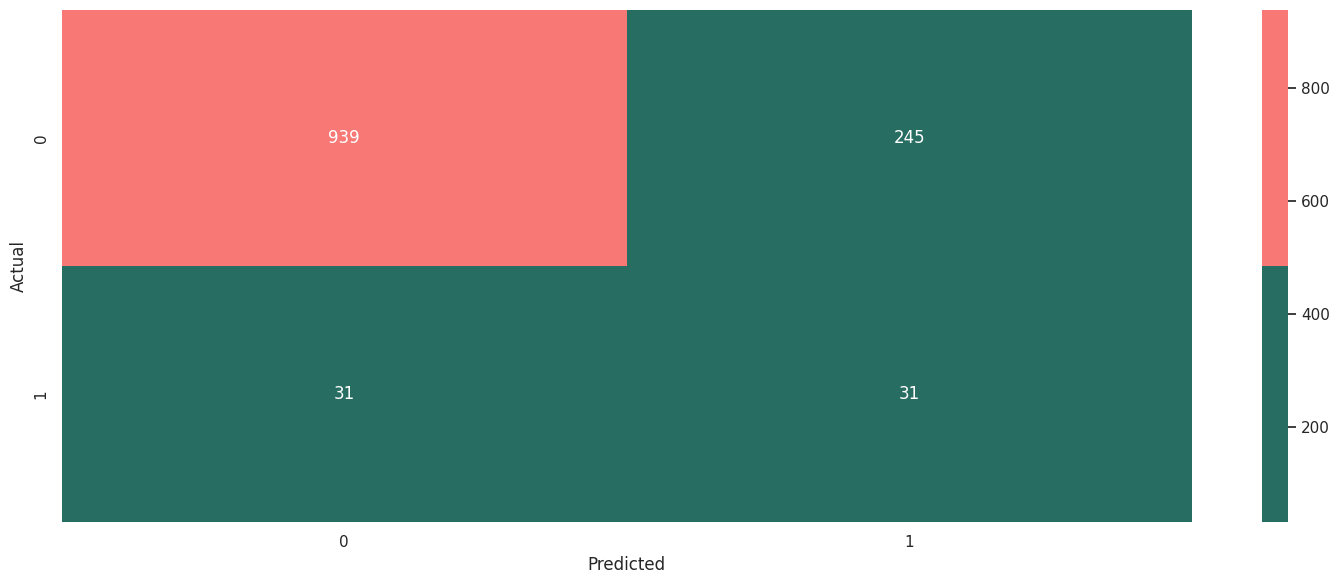

ROC Score:
0.6882356146469049


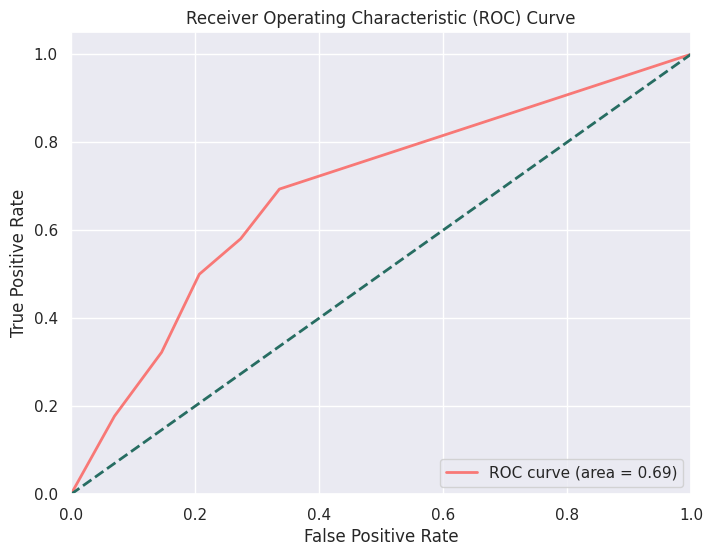

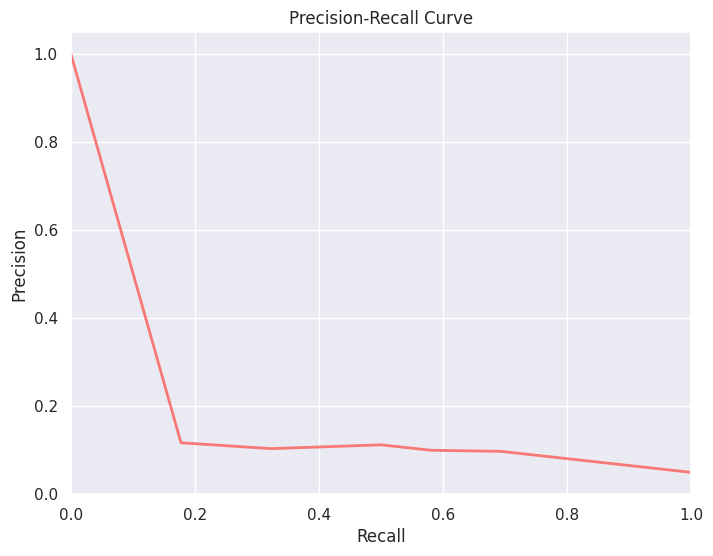

Results for XGBClassifier:
train f1 score
0.9952240483213934
test f1 score
0.9285714285714286
--------------------
[[1150   34]
 [  55    7]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1184
           1       0.17      0.11      0.14        62

    accuracy                           0.93      1246
   macro avg       0.56      0.54      0.55      1246
weighted avg       0.92      0.93      0.92      1246



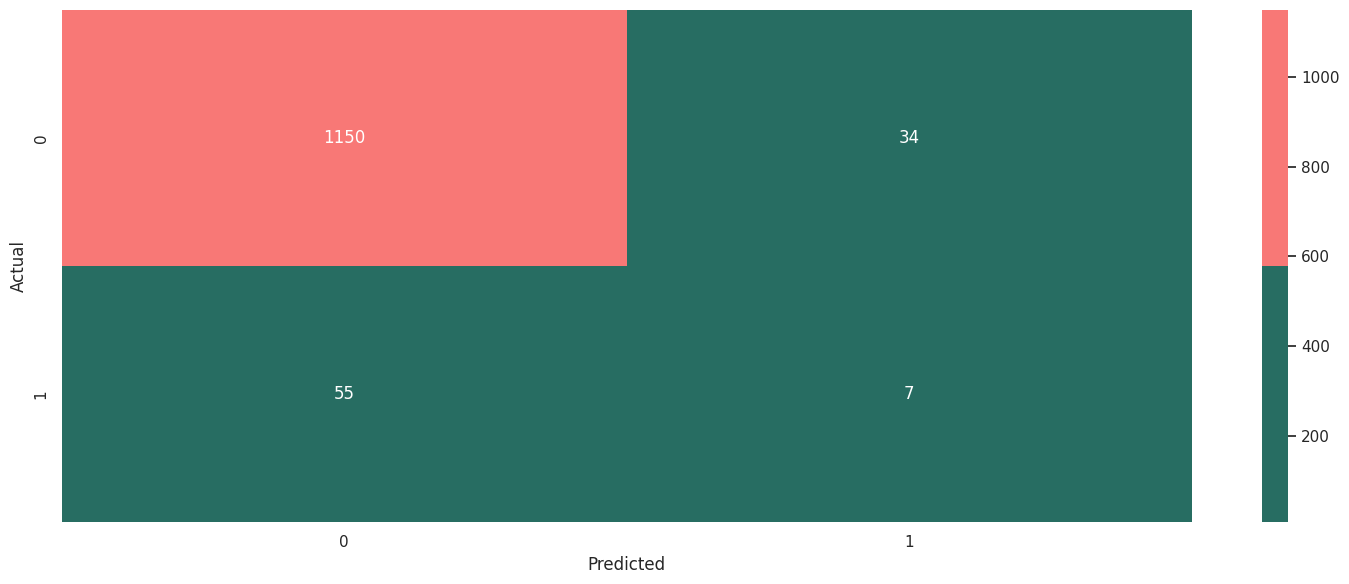

ROC Score:
0.7961666303400174


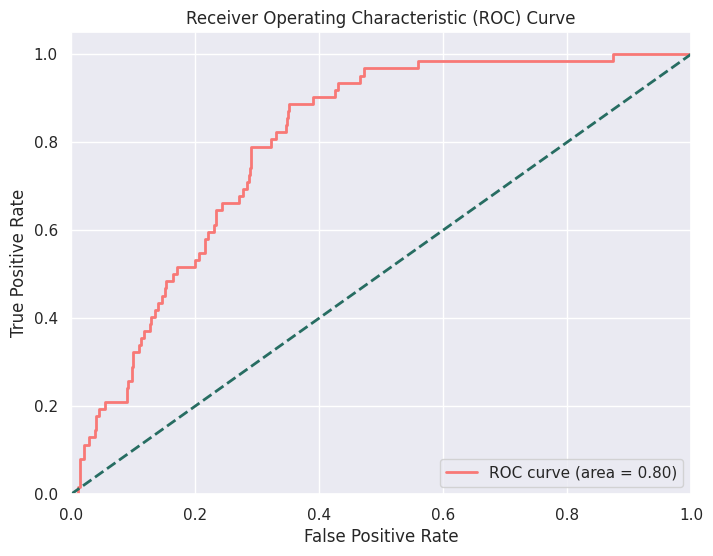

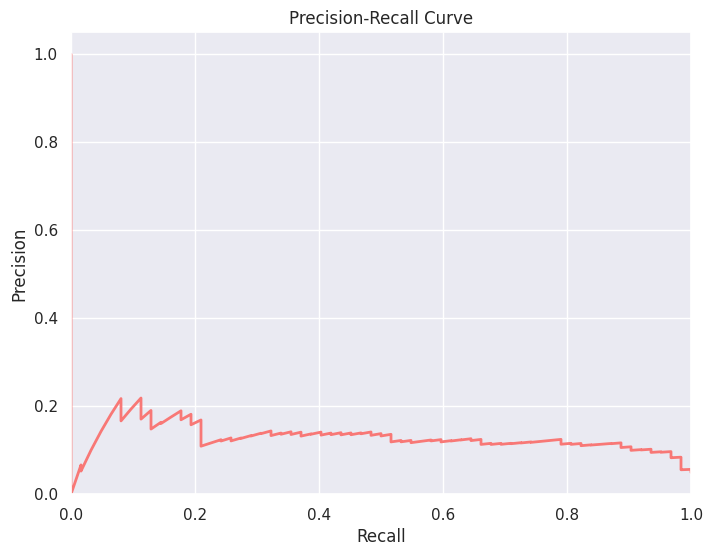

In [ ]:
alg = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42), KNeighborsClassifier(),XGBClassifier()]
#gradient boosting
print("***  Baseline with RUS : ***")
for model in alg:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_un, y_un, X_test, y_test, model)
    # ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
print("***  Baseline with ROS : ***")
for model in alg:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_ovr, y_ovr, X_test, y_test, model)

print("***  Baseline with SMOTE : ***")
for model in alg:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_sm, y_sm, X_test, y_test, model)

print("***  Baseline with ADASYN : ***")
for model in alg:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_ad, y_ad, X_test, y_test, model)

### Applying tuning on models and using data from RUS and SMOTE

### Grid Search of:
- RandomForestClassifier
- KNeighborsClassifier
- XGBOOST

**on RUS and SMOTE**


#### RF

In [ ]:
# Create the parameter grid
param_grid = {'max_depth': [80, 90, 100],
              'max_features': [2, 3],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200]}

# Define which model to use
rf_model = RandomForestClassifier()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf_model,
                                 param_grid = param_grid,
                                 cv = 5,
                                 n_jobs = -1,
                                 scoring='f1')

In [ ]:
# UnderSampled
grid_search_rf.fit(X_un, y_un)

#optimal parameters
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
# SMOTE
grid_search_rf.fit(X_sm, y_sm)

grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

#### Knn

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30, 50, 100],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator = knn_model,
                                 param_grid = param_grid,
                                 cv = 5,
                                 n_jobs = -1,
                                 scoring='f1')


In [ ]:
# UnderSampled
grid_search_knn.fit(X_un, y_un)

#optimal parameters
grid_search_knn.best_params_

{'leaf_size': 30, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [ ]:
# SMOTE
grid_search_knn.fit(X_sm, y_sm)

grid_search_knn.best_params_

{'leaf_size': 30, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

#### XGBClassifier

In [ ]:
# Define the XGBoost classifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

xgb_model = XGBClassifier()

grid_search_xgb = GridSearchCV(estimator = xgb_model,
                                 param_grid = param_grid,
                                 cv = 5,
                                 n_jobs = -1,
                                 scoring='f1')


In [ ]:
# UnderSampled
grid_search_xgb.fit(X_un, y_un)

#optimal parameters
grid_search_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 0.1,
 'subsample': 0.8}

In [ ]:
X

array([[1.        , 0.81689453, 0.        , ..., 5.43236737, 0.64756447,
        1.        ],
       [1.        , 0.97558594, 0.        , ..., 4.66268409, 0.53008596,
        2.        ],
       [0.        , 0.59716797, 0.        , ..., 5.14300768, 0.58452722,
        3.        ],
       ...,
       [0.        , 0.54833984, 1.        , ..., 4.5540874 , 0.51002865,
        3.        ],
       [1.        , 0.48730469, 0.        , ..., 4.43010226, 0.45845272,
        3.        ],
       [0.        , 0.97558594, 1.        , ..., 4.42783617, 0.43266476,
        2.        ]])

In [ ]:
# SMOTE
grid_search_xgb.fit(X_sm, y_sm)

grid_search_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.3,
 'max_depth': 7,
 'n_estimators': 200,
 'reg_alpha': 0.2,
 'reg_lambda': 0,
 'subsample': 1.0}

### Modelling
- Under Sampling
- SMOTE

In [ ]:
clf01 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=42,
                          solver='liblinear')

clf02 = RandomForestClassifier(class_weight={0:1, 1:12},
                              criterion='gini',
                              max_depth=90,
                              max_features='log2',
                              min_samples_leaf=3,
                              min_samples_split= 8,
                              n_estimators=200,
                              n_jobs=-1,
                              random_state=42)

clf03 = DecisionTreeClassifier(random_state=42,
                              class_weight="balanced")
clf04 = KNeighborsClassifier(n_neighbors=7,
                            weights ='uniform',
                            leaf_size = 30,
                            p=1 )
clf05 = XGBClassifier(n_estimators=200,
                     learning_rate=0.01,
                     max_depth=7,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     gamma=0.1,
                     reg_alpha=0.1,
                     reg_lambda=0)

ensemble_model = VotingClassifier(estimators=[('lr', clf01), ('rf', clf02), ('dt', clf03), ('knn', clf04), ('xgb', clf05)], voting='hard')

In [ ]:
#SMOTE
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=42,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12},
                              criterion='entropy',
                              max_depth=90,
                              max_features='log2',
                              min_samples_leaf=3,
                              min_samples_split=8,
                              n_estimators=200,
                              n_jobs=-1,
                              random_state=42)

clf3 = DecisionTreeClassifier(random_state=42,
                              class_weight="balanced")
clf4 = KNeighborsClassifier(n_neighbors=3,
                            weights ='distance',
                            leaf_size = 30,
                            p=2 )
clf5 = XGBClassifier(n_estimators=100,
                     learning_rate=0.3,
                     max_depth=7,
                     subsample=1,
                     colsample_bytree=0.8,
                     gamma=0,
                     reg_alpha=0.2,
                     reg_lambda=0.2)
# Combine the classifiers in the ensemble model
# ensemble_model2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('knn', clf4), ('xgb', clf5)], voting='hard')
ensemble_model2 = VotingClassifier(estimators=[('lr', clf1),  ('rf', clf2),('xgb', clf5)], voting='hard')

#### Tuned models with RUS

Results for LogisticRegression:
train f1 score
0.6169354838709677
test f1 score
0.28330658105939005
--------------------
[[291 893]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.39      1184
           1       0.06      1.00      0.12        62

    accuracy                           0.28      1246
   macro avg       0.53      0.62      0.26      1246
weighted avg       0.95      0.28      0.38      1246



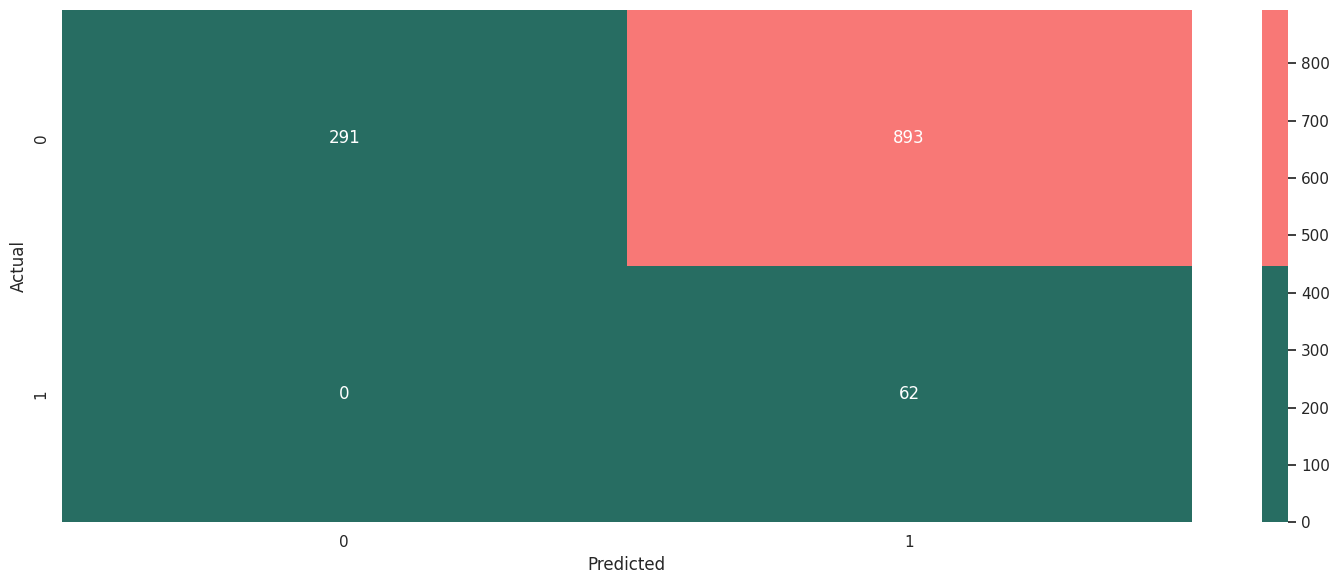

ROC Score:
0.8391728421970358


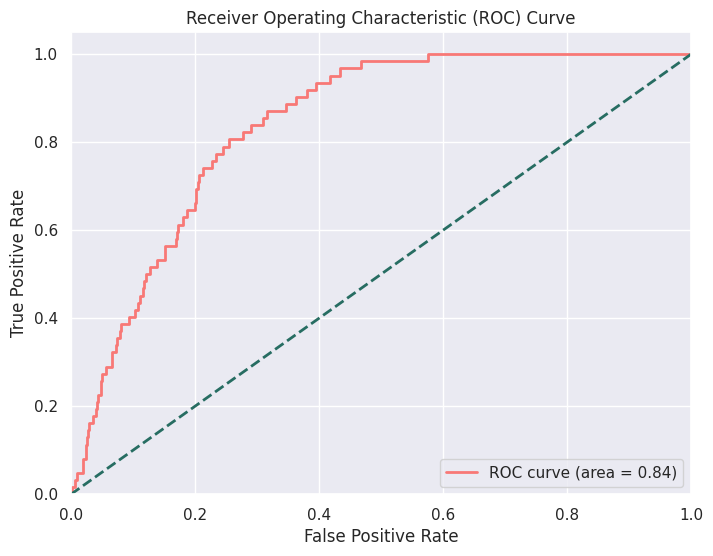

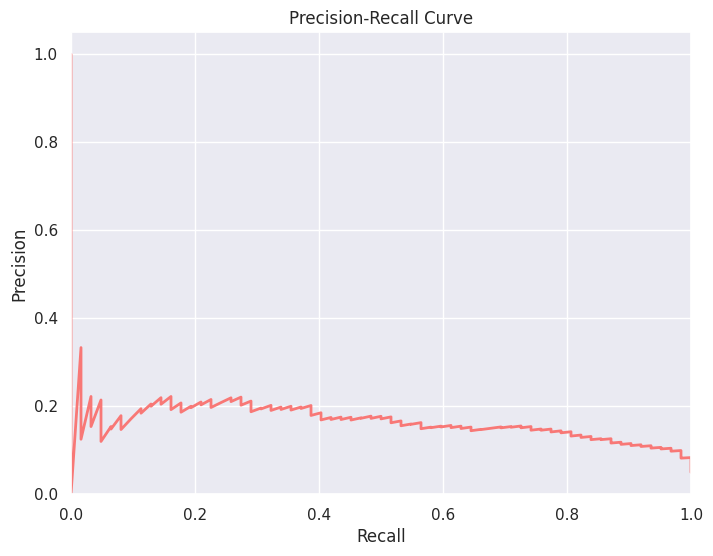

Results for RandomForestClassifier:
train f1 score
0.7701612903225806
test f1 score
0.5329052969502408
--------------------
[[602 582]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.51      0.67      1184
           1       0.10      1.00      0.18        62

    accuracy                           0.53      1246
   macro avg       0.55      0.75      0.42      1246
weighted avg       0.96      0.53      0.65      1246



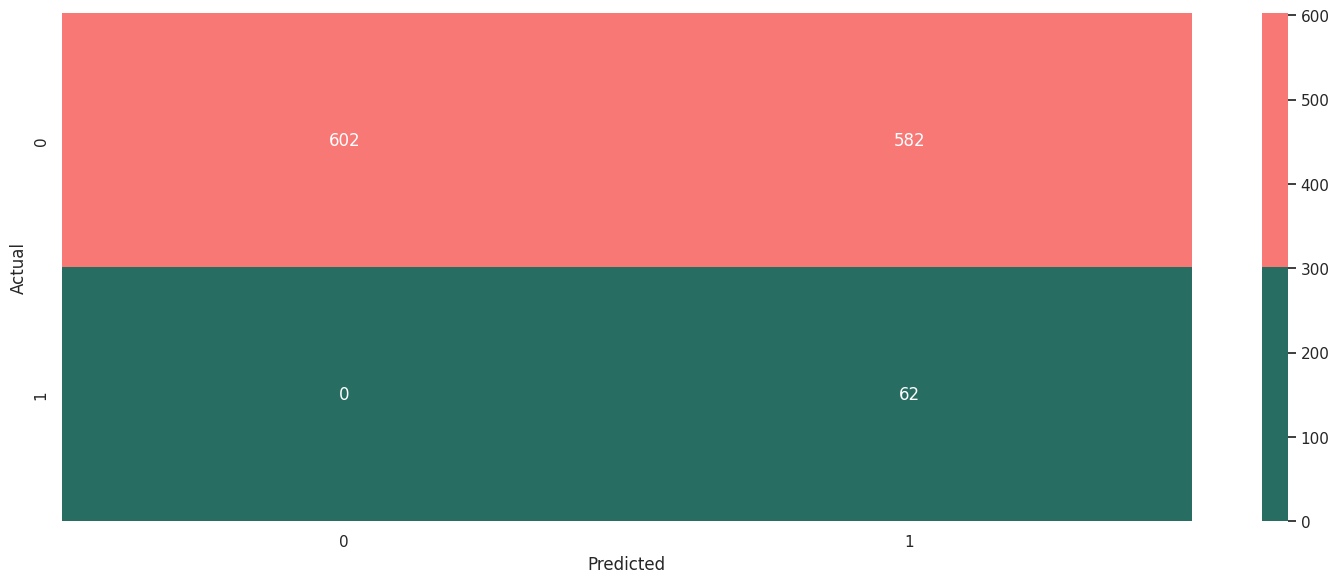

ROC Score:
0.9184829991281604


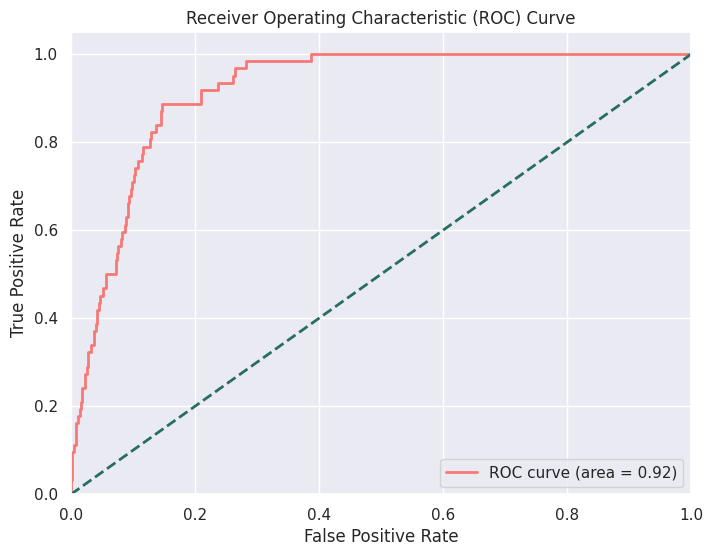

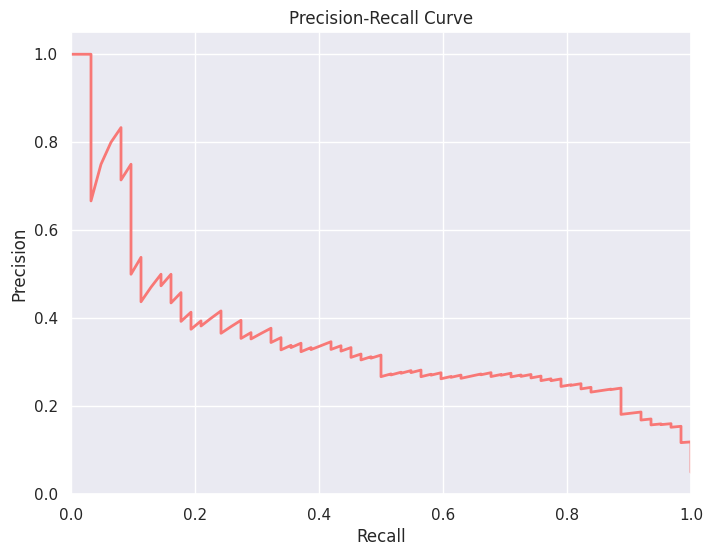

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.732744783306581
--------------------
[[851 333]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1184
           1       0.16      1.00      0.27        62

    accuracy                           0.73      1246
   macro avg       0.58      0.86      0.55      1246
weighted avg       0.96      0.73      0.81      1246



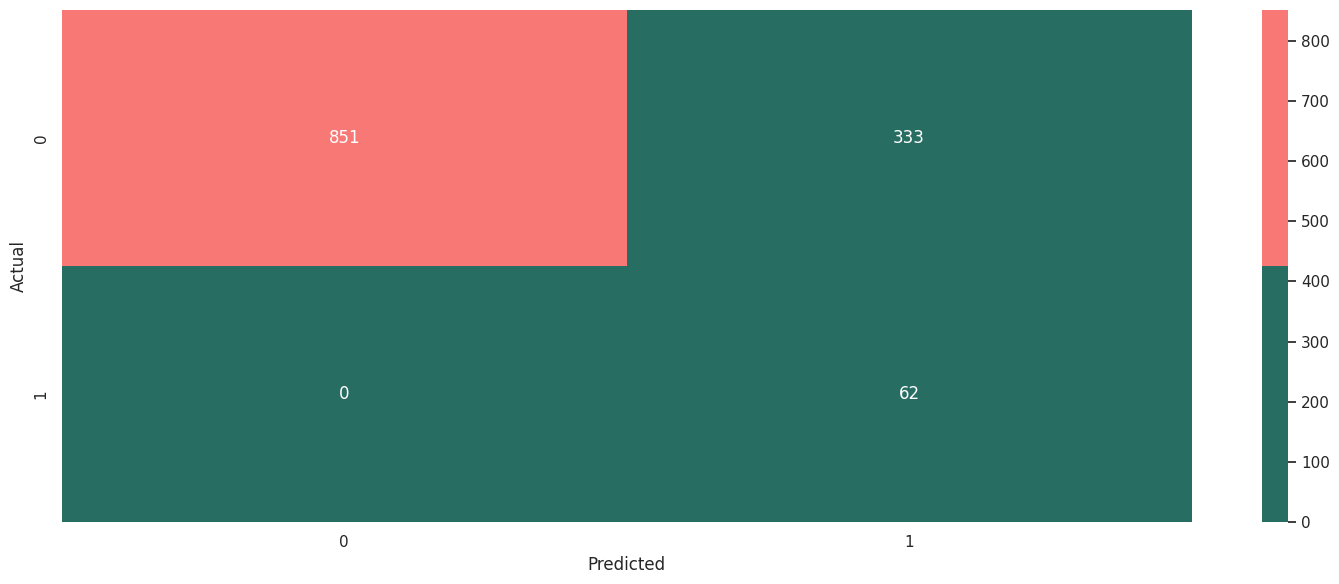

ROC Score:
0.859375


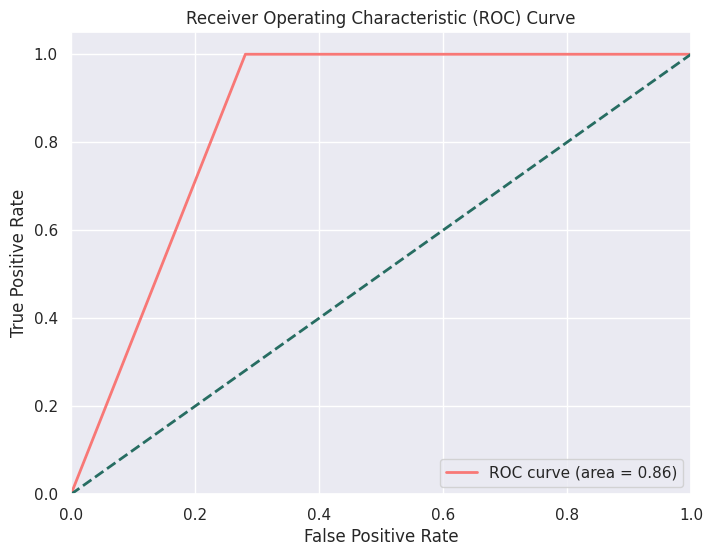

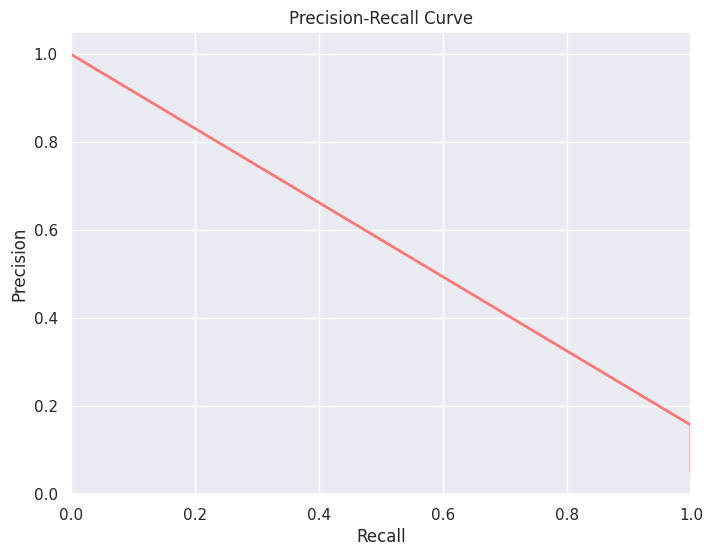

Results for KNeighborsClassifier:
train f1 score
0.7641129032258065
test f1 score
0.6540930979133226
--------------------
[[765 419]
 [ 12  50]]
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      1184
           1       0.11      0.81      0.19        62

    accuracy                           0.65      1246
   macro avg       0.55      0.73      0.48      1246
weighted avg       0.94      0.65      0.75      1246



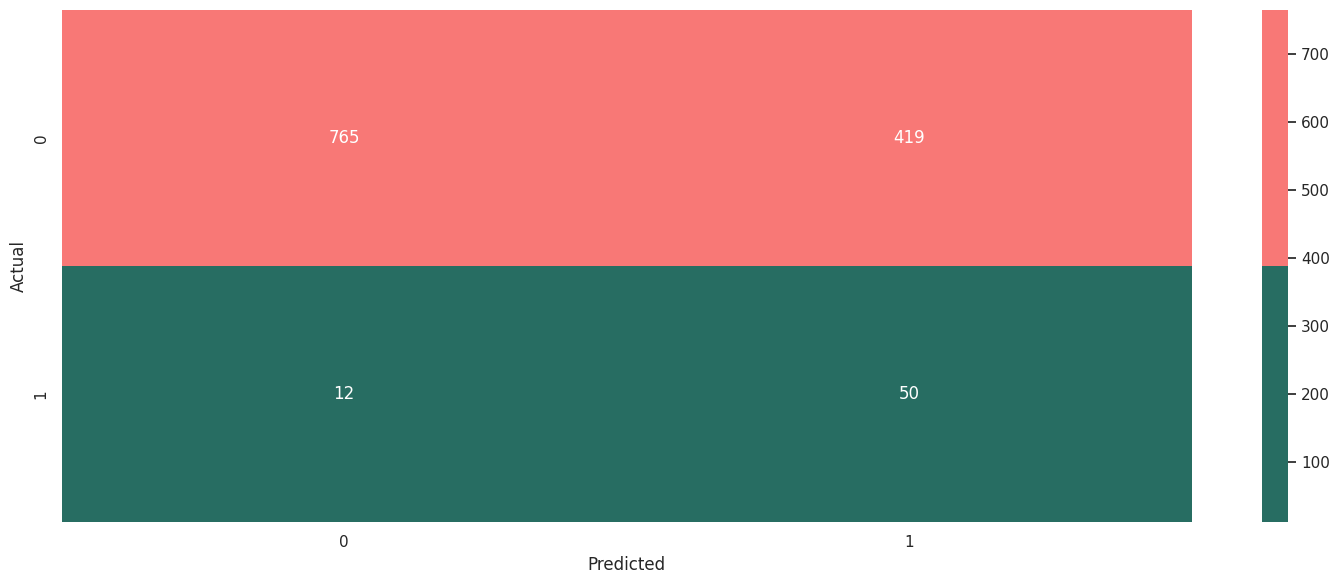

ROC Score:
0.7668442131647777


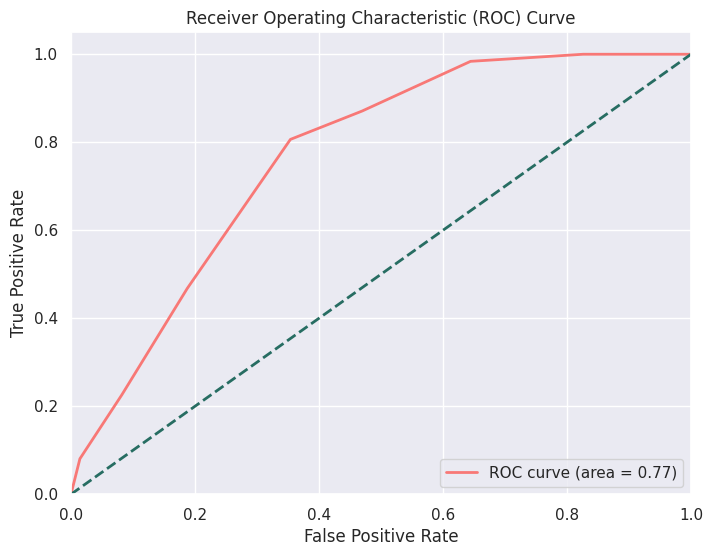

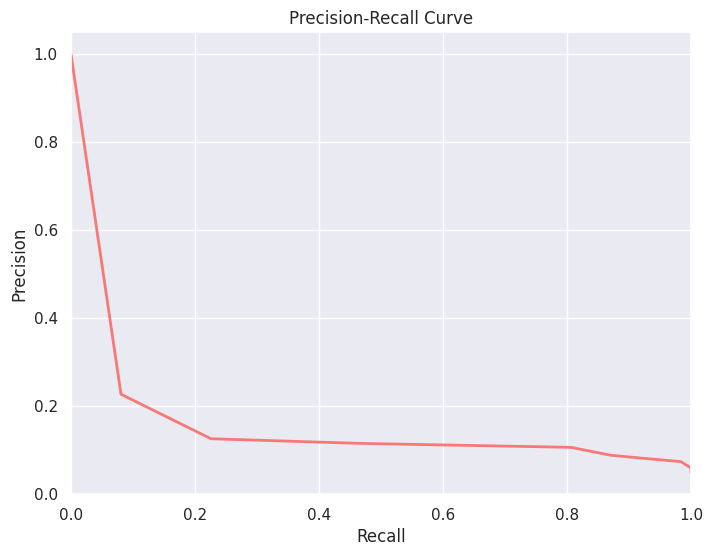

Results for XGBClassifier:
train f1 score
0.9435483870967742
test f1 score
0.7495987158908507
--------------------
[[874 310]
 [  2  60]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1184
           1       0.16      0.97      0.28        62

    accuracy                           0.75      1246
   macro avg       0.58      0.85      0.56      1246
weighted avg       0.96      0.75      0.82      1246



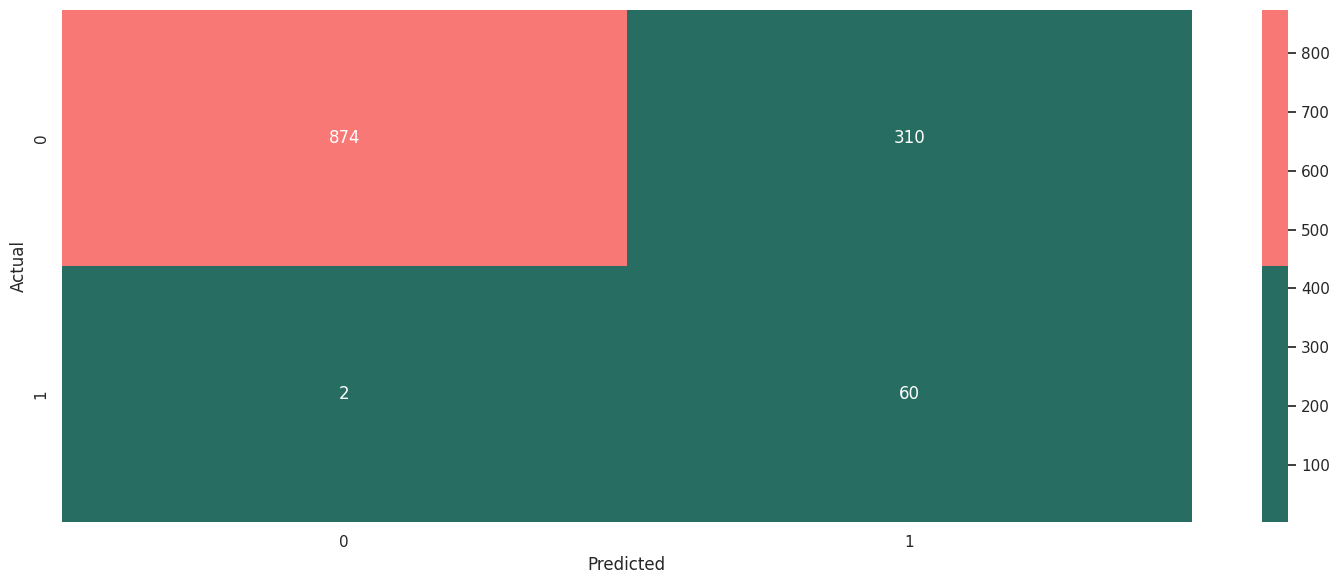

ROC Score:
0.9210440278988665


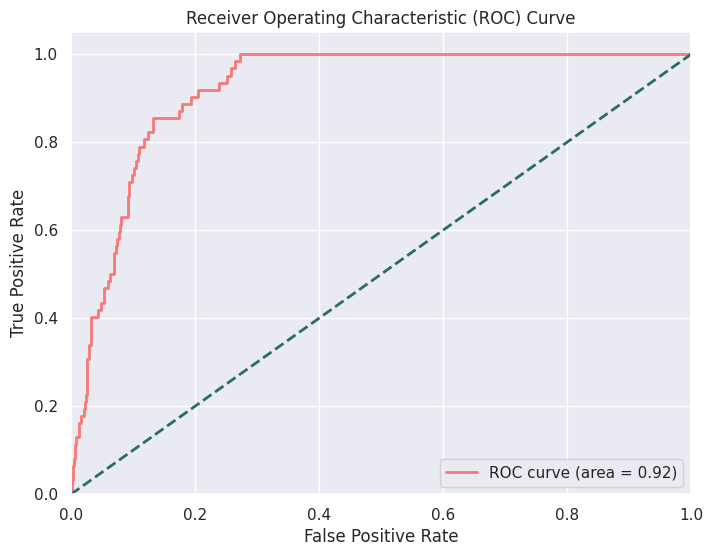

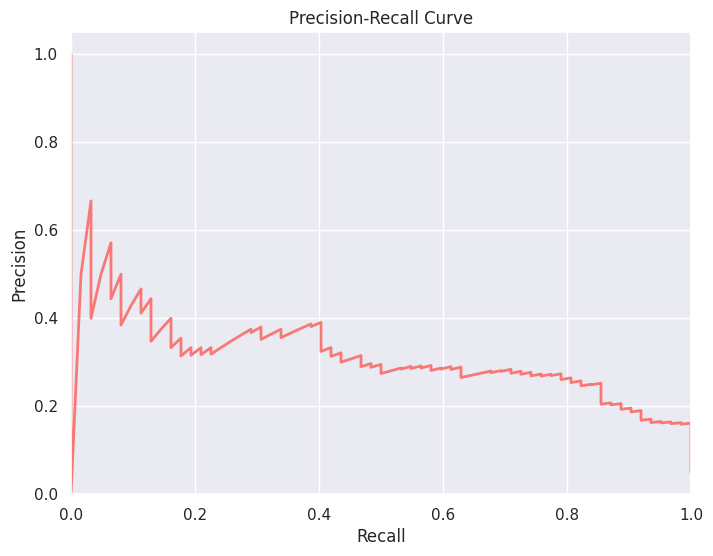

In [ ]:
algr = [clf01,clf02,clf03,clf04,clf05]
for model in algr:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_un, y_un, X_test, y_test, model)

#### Tuned Models with SMOTE

Results for LogisticRegression:
train f1 score
0.6548323471400395
test f1 score
0.3667736757624398
--------------------
[[395 789]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1184
           1       0.07      1.00      0.14        62

    accuracy                           0.37      1246
   macro avg       0.54      0.67      0.32      1246
weighted avg       0.95      0.37      0.48      1246



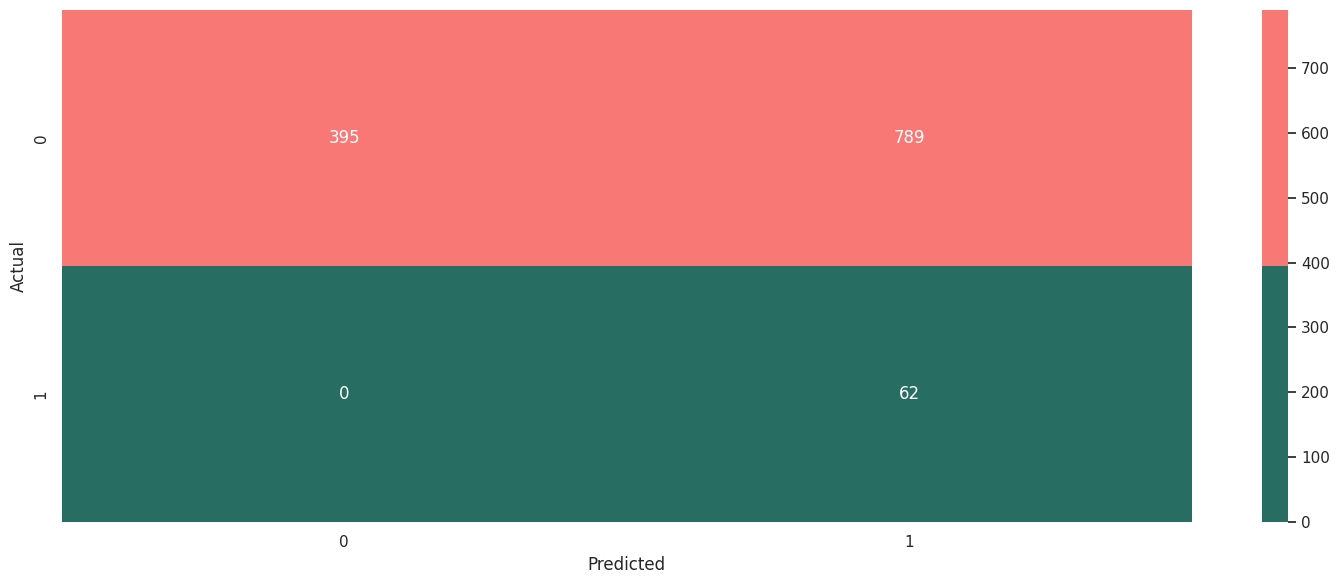

ROC Score:
0.8322526155187446


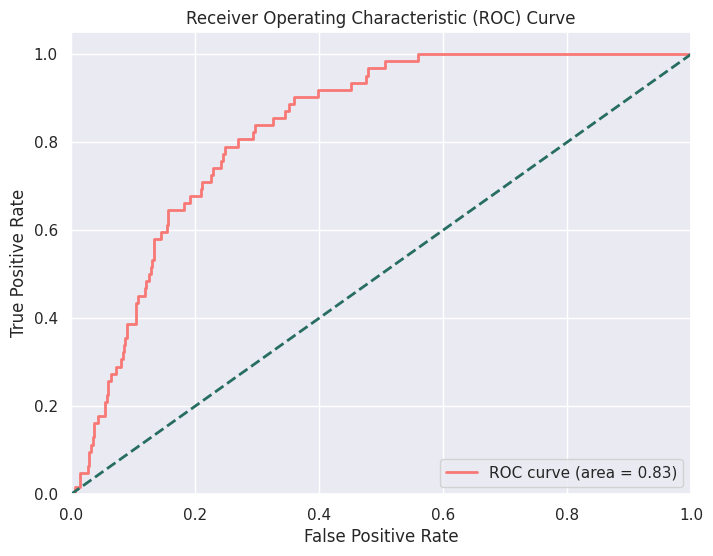

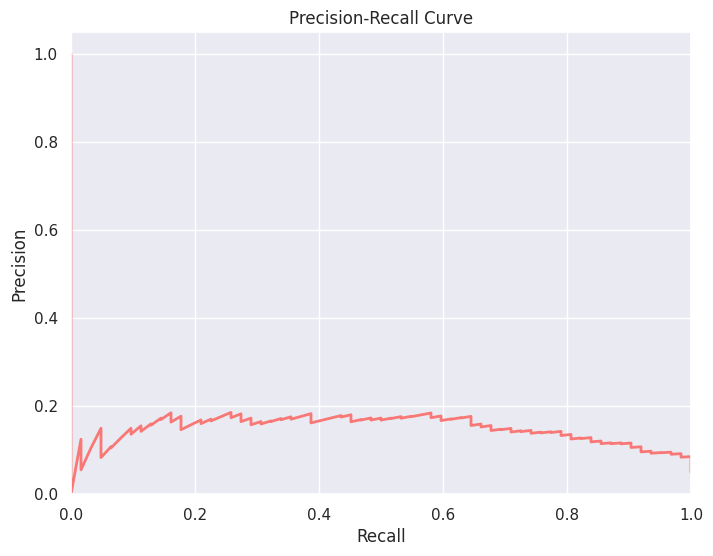

Results for RandomForestClassifier:
train f1 score
0.9153282614821077
test f1 score
0.7672552166934189
--------------------
[[916 268]
 [ 22  40]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1184
           1       0.13      0.65      0.22        62

    accuracy                           0.77      1246
   macro avg       0.55      0.71      0.54      1246
weighted avg       0.93      0.77      0.83      1246



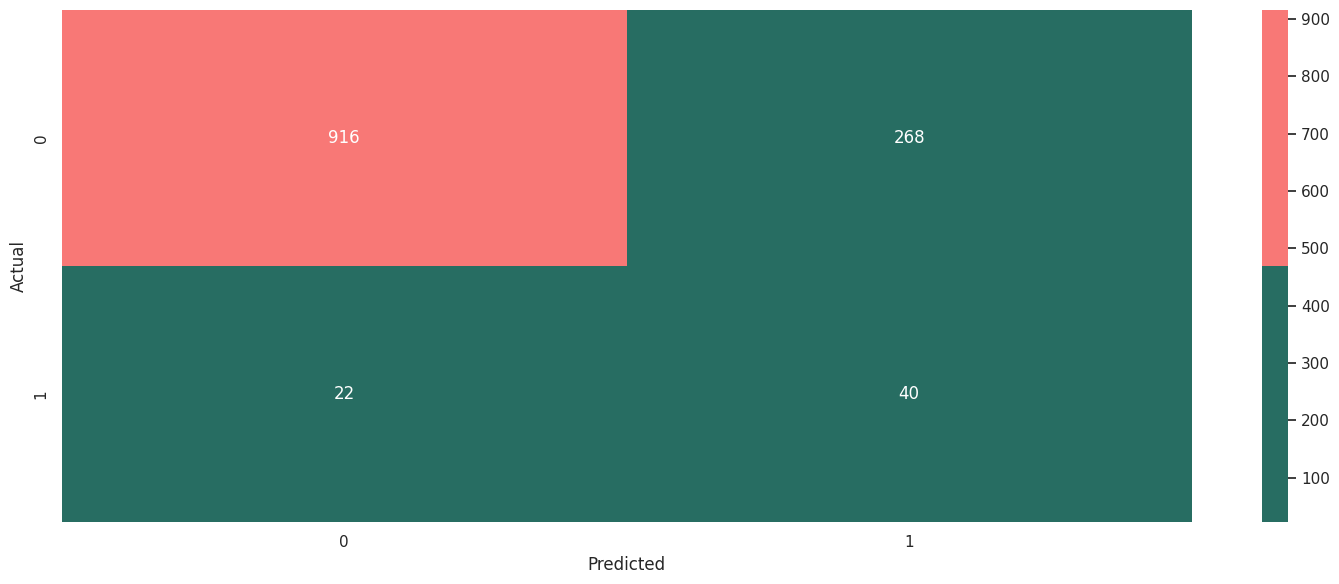

ROC Score:
0.821545335658239


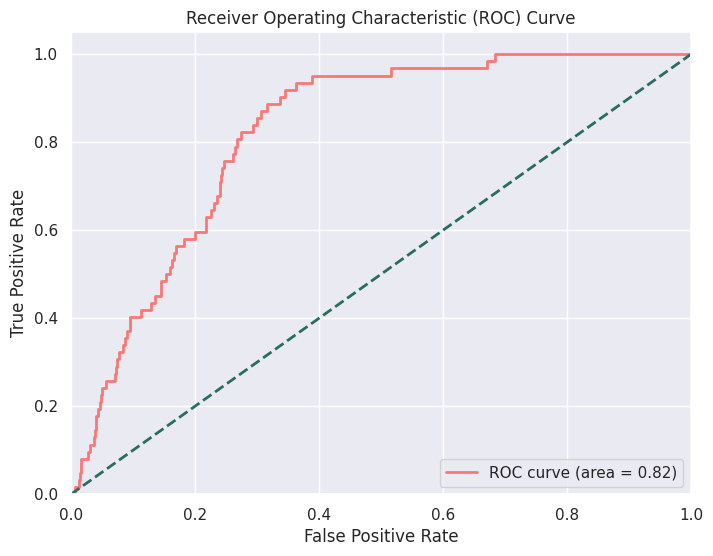

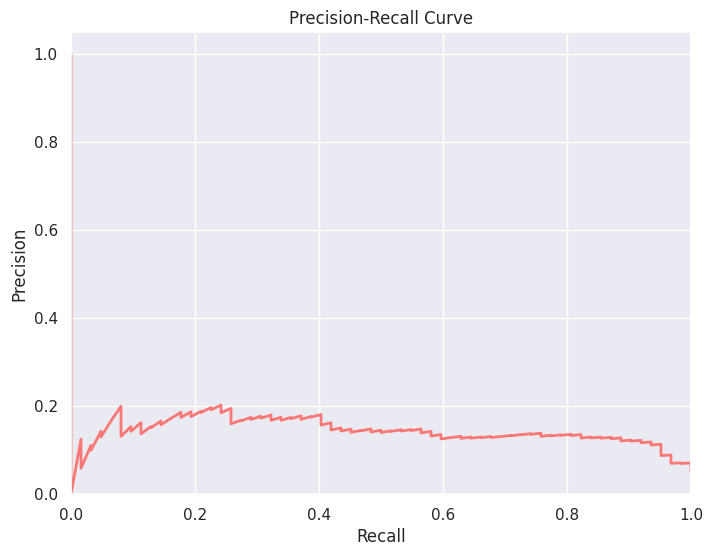

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.8507223113964687
--------------------
[[1044  140]
 [  46   16]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1184
           1       0.10      0.26      0.15        62

    accuracy                           0.85      1246
   macro avg       0.53      0.57      0.53      1246
weighted avg       0.92      0.85      0.88      1246



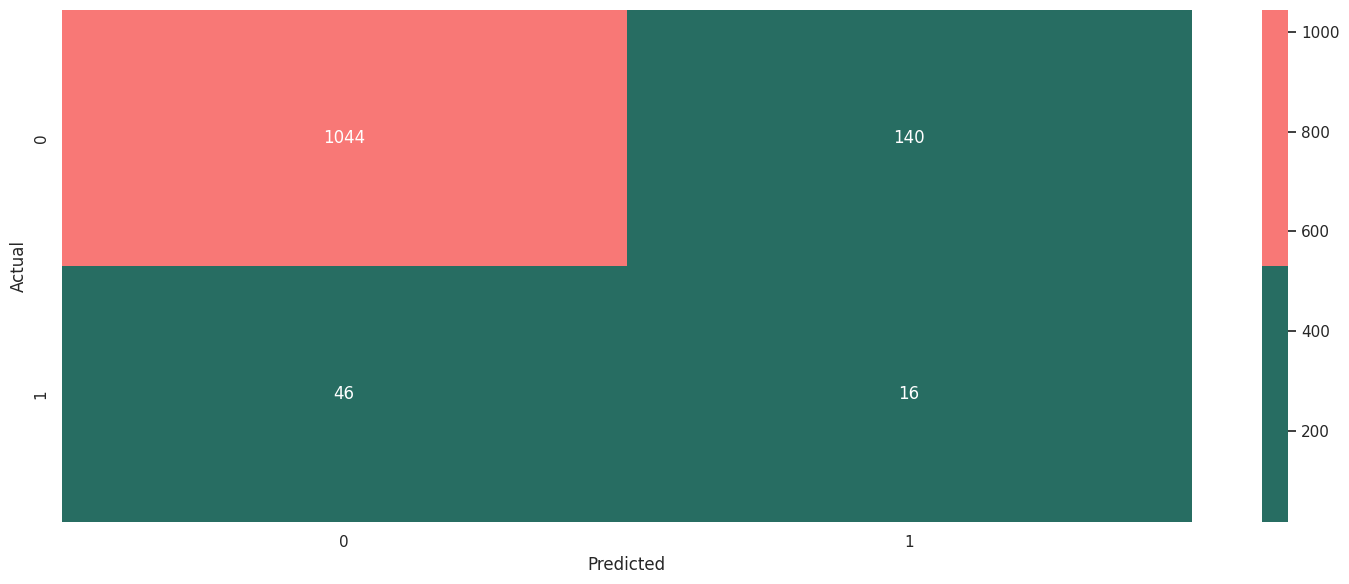

ROC Score:
0.5699106364428945


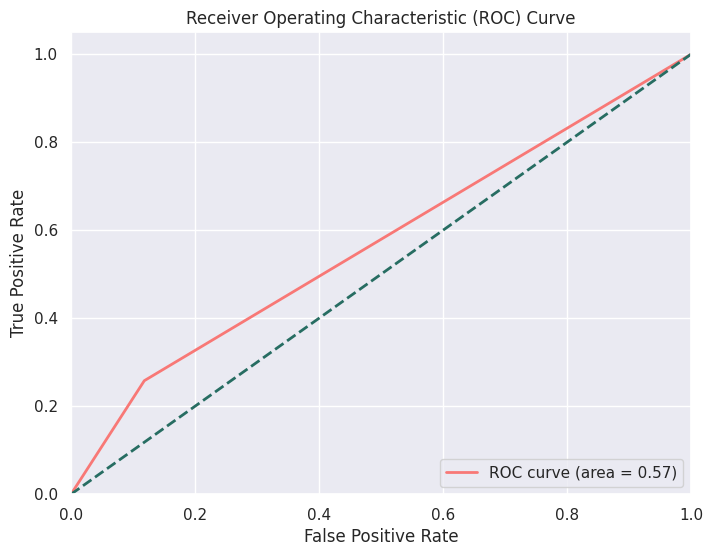

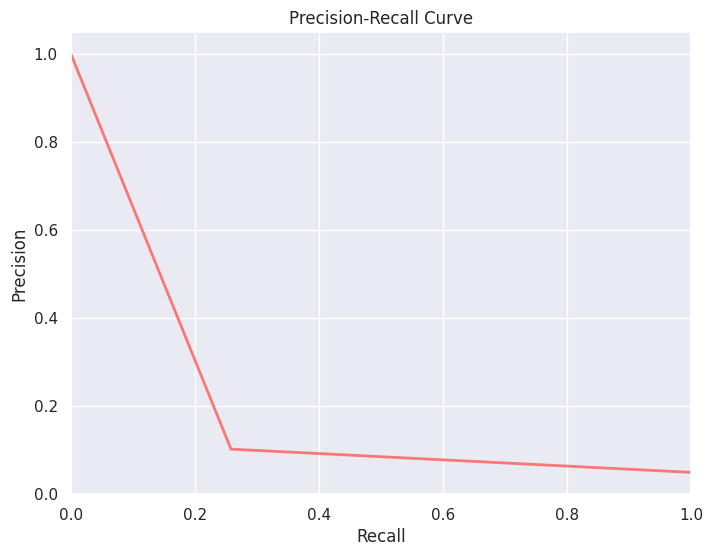

Results for KNeighborsClassifier:
train f1 score
1.0
test f1 score
0.8097913322632424
--------------------
[[989 195]
 [ 42  20]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1184
           1       0.09      0.32      0.14        62

    accuracy                           0.81      1246
   macro avg       0.53      0.58      0.52      1246
weighted avg       0.92      0.81      0.86      1246



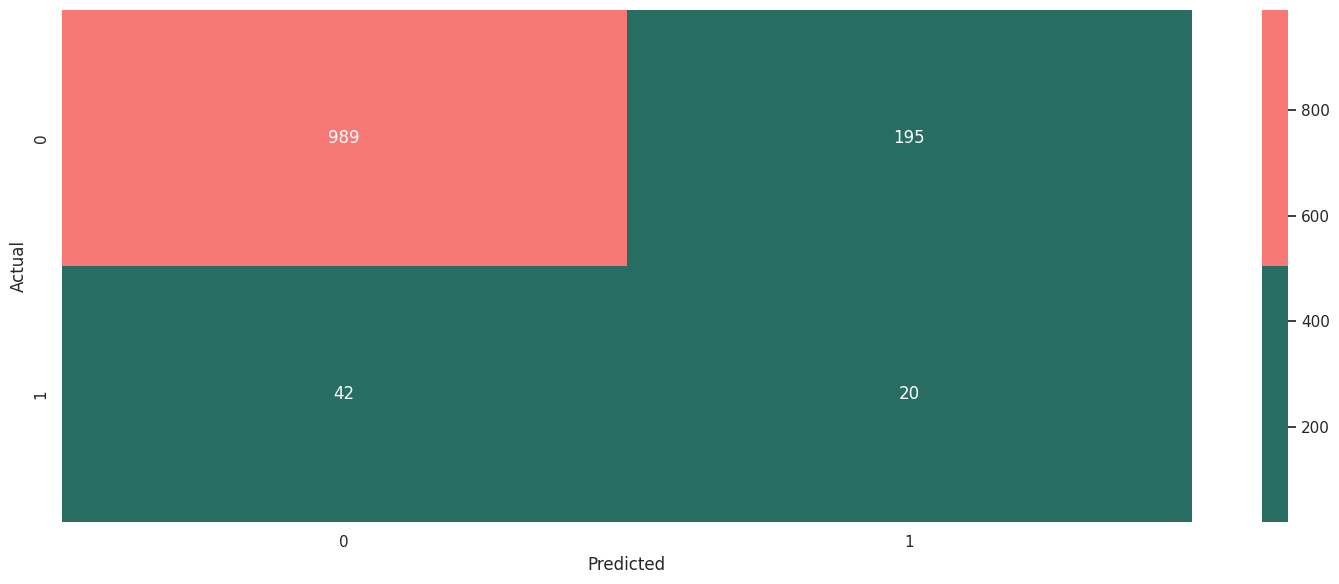

ROC Score:
0.6453383827375762


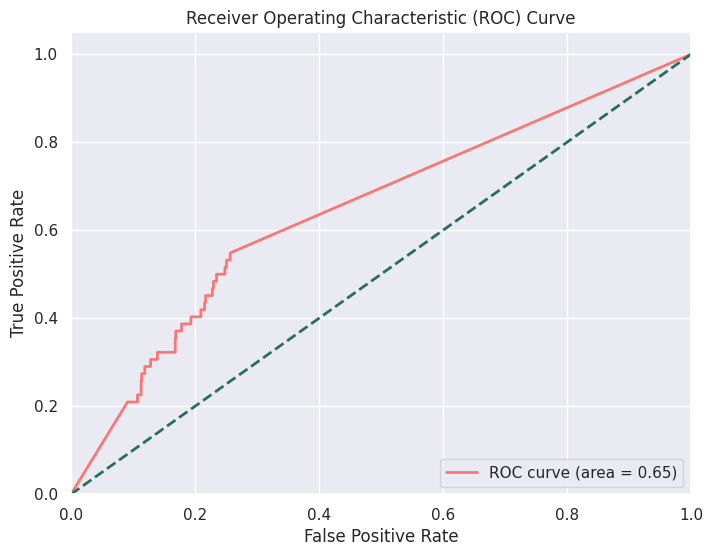

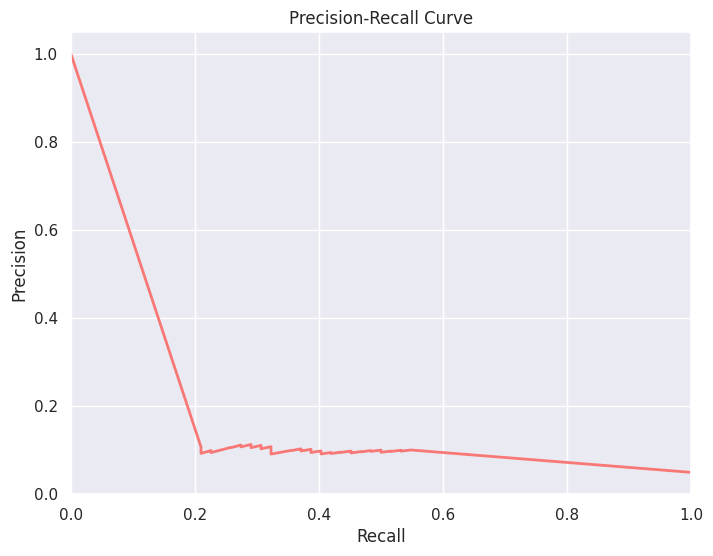

Results for XGBClassifier:
train f1 score
0.9980276134122288
test f1 score
0.9221508828250401
--------------------
[[1143   41]
 [  56    6]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1184
           1       0.13      0.10      0.11        62

    accuracy                           0.92      1246
   macro avg       0.54      0.53      0.53      1246
weighted avg       0.91      0.92      0.92      1246



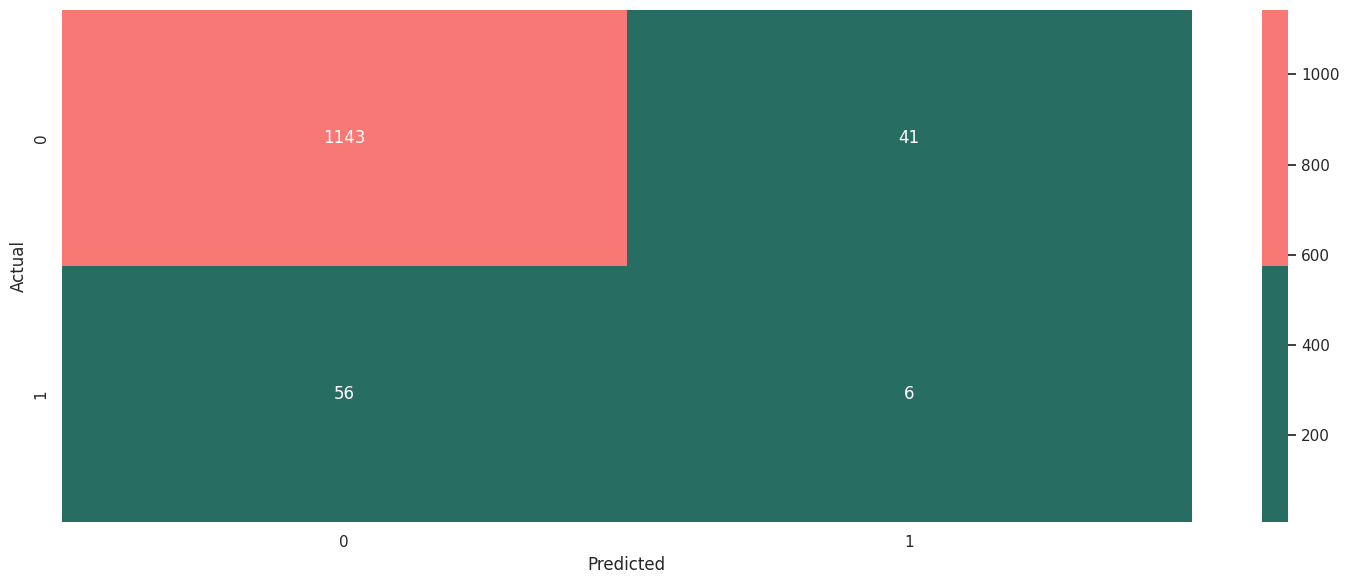

ROC Score:
0.8132628596338274


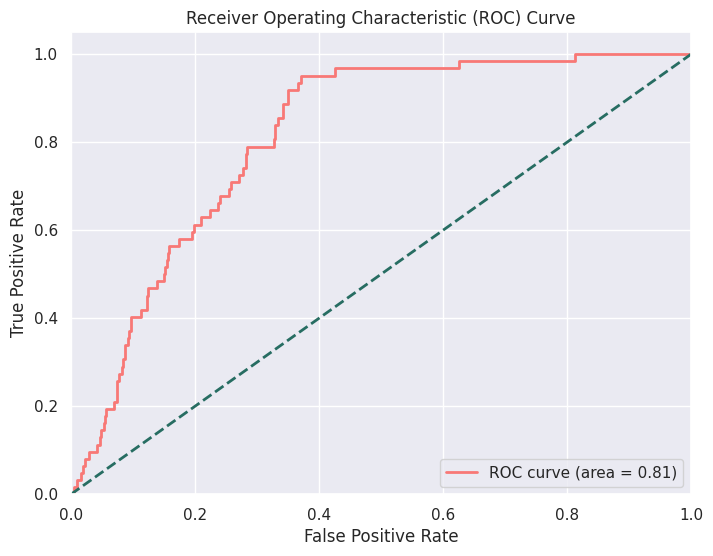

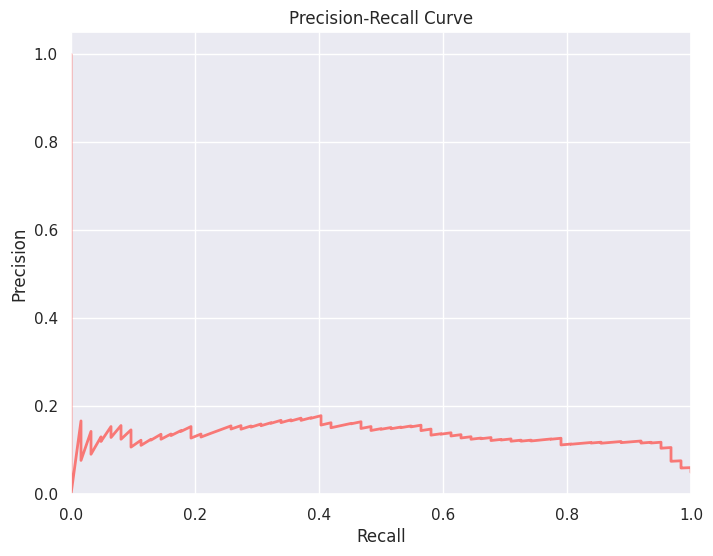

In [ ]:
algr = [clf1,clf2,clf3,clf4,clf5]
for model in algr:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_sm, y_sm, X_test, y_test, model)

#### Tuned modles with ROV

Results for LogisticRegression:
train f1 score
0.6081994928148774
test f1 score
0.28009630818619585
--------------------
[[287 897]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.24      0.39      1184
           1       0.06      1.00      0.12        62

    accuracy                           0.28      1246
   macro avg       0.53      0.62      0.26      1246
weighted avg       0.95      0.28      0.38      1246



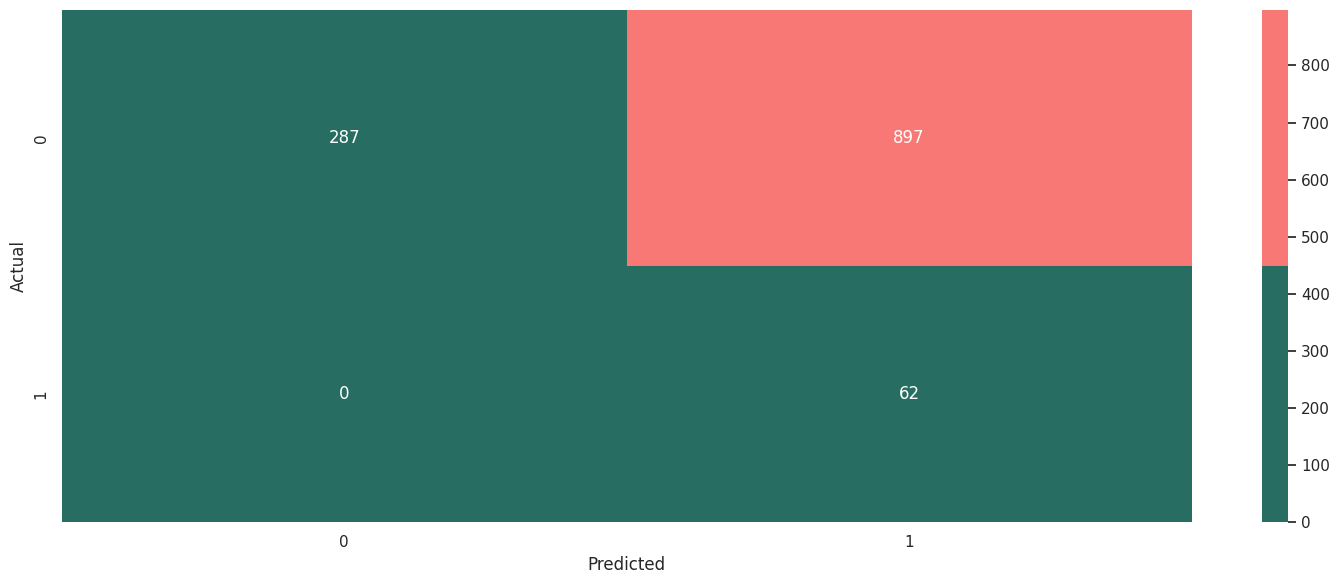

ROC Score:
0.8164641455972101


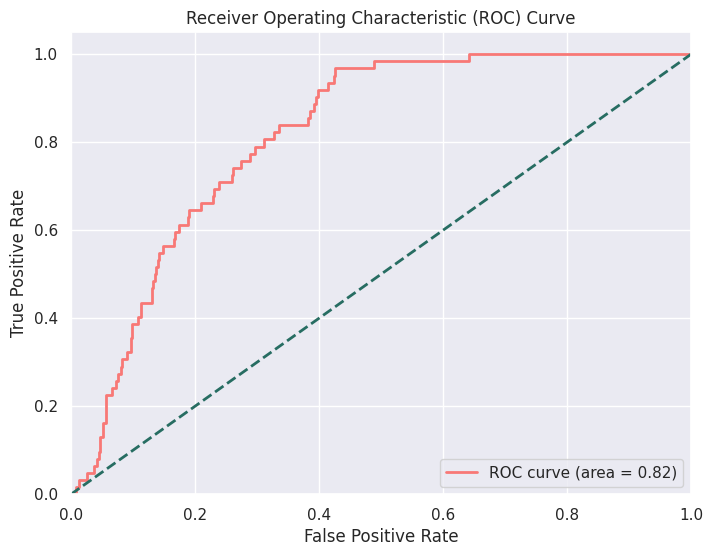

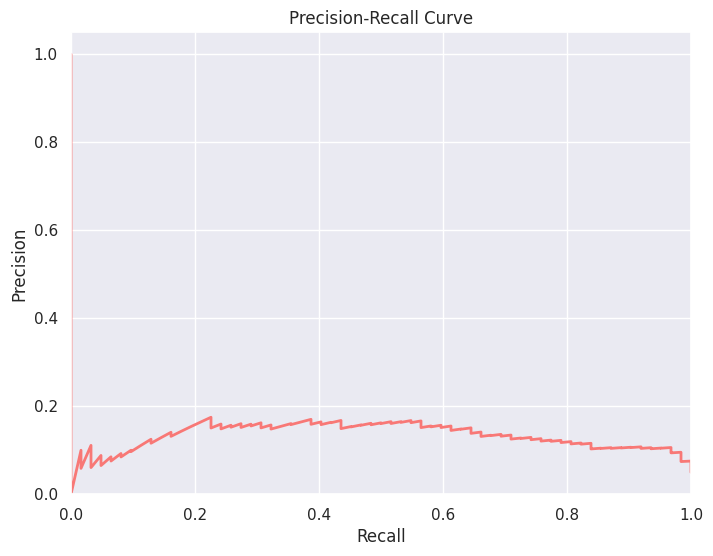

Results for RandomForestClassifier:
train f1 score
0.993941955480417
test f1 score
0.9229534510433387
--------------------
[[1137   47]
 [  49   13]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1184
           1       0.22      0.21      0.21        62

    accuracy                           0.92      1246
   macro avg       0.59      0.58      0.59      1246
weighted avg       0.92      0.92      0.92      1246



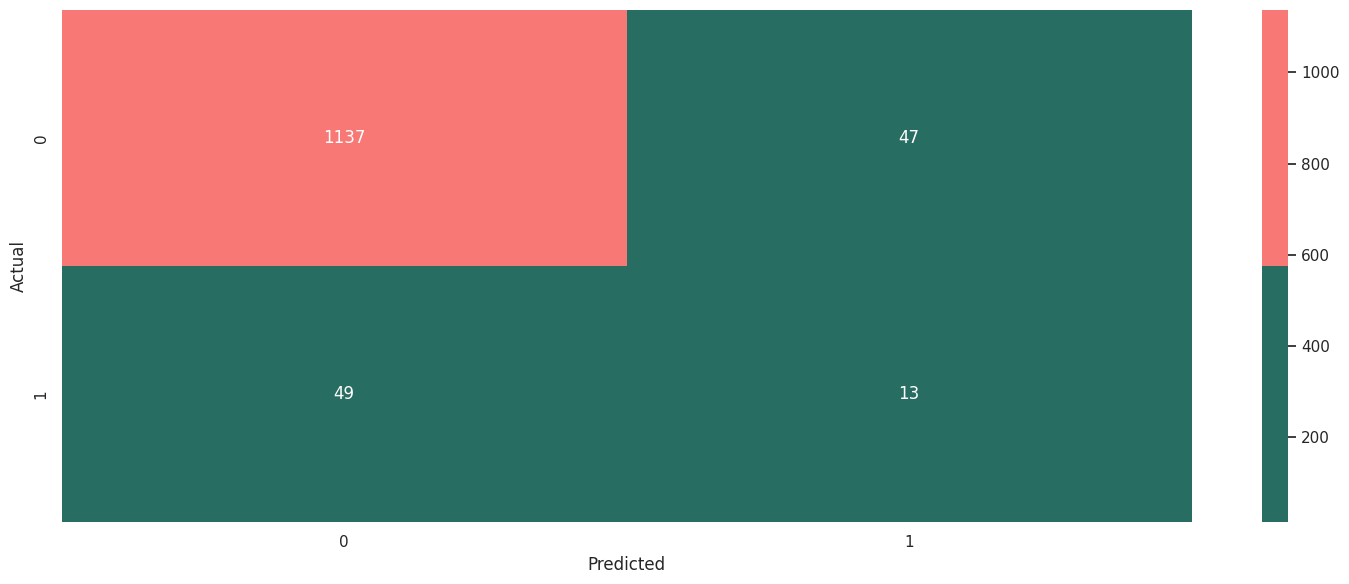

ROC Score:
0.8232617698343504


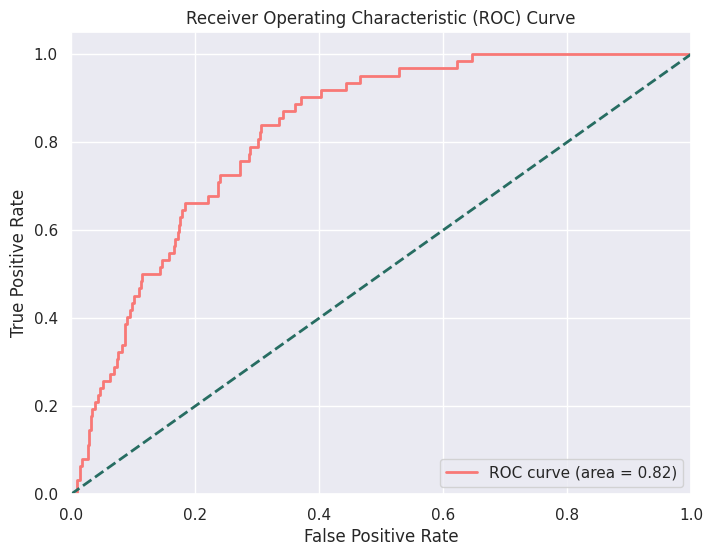

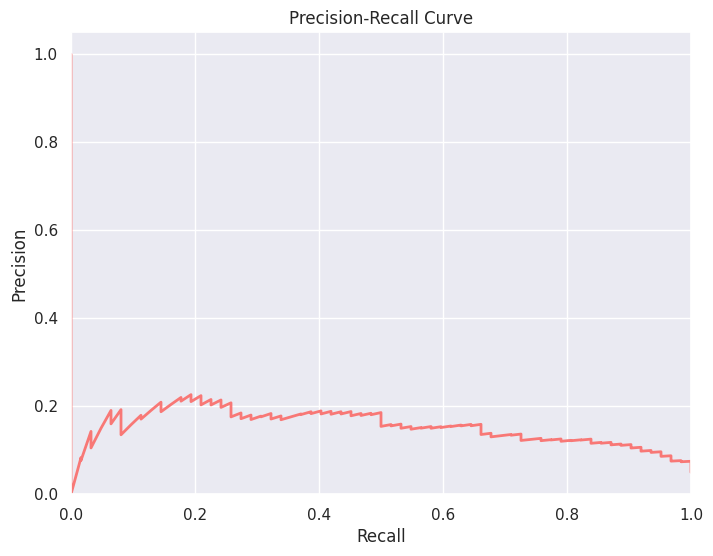

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.9189406099518459
--------------------
[[1139   45]
 [  56    6]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1184
           1       0.12      0.10      0.11        62

    accuracy                           0.92      1246
   macro avg       0.54      0.53      0.53      1246
weighted avg       0.91      0.92      0.92      1246



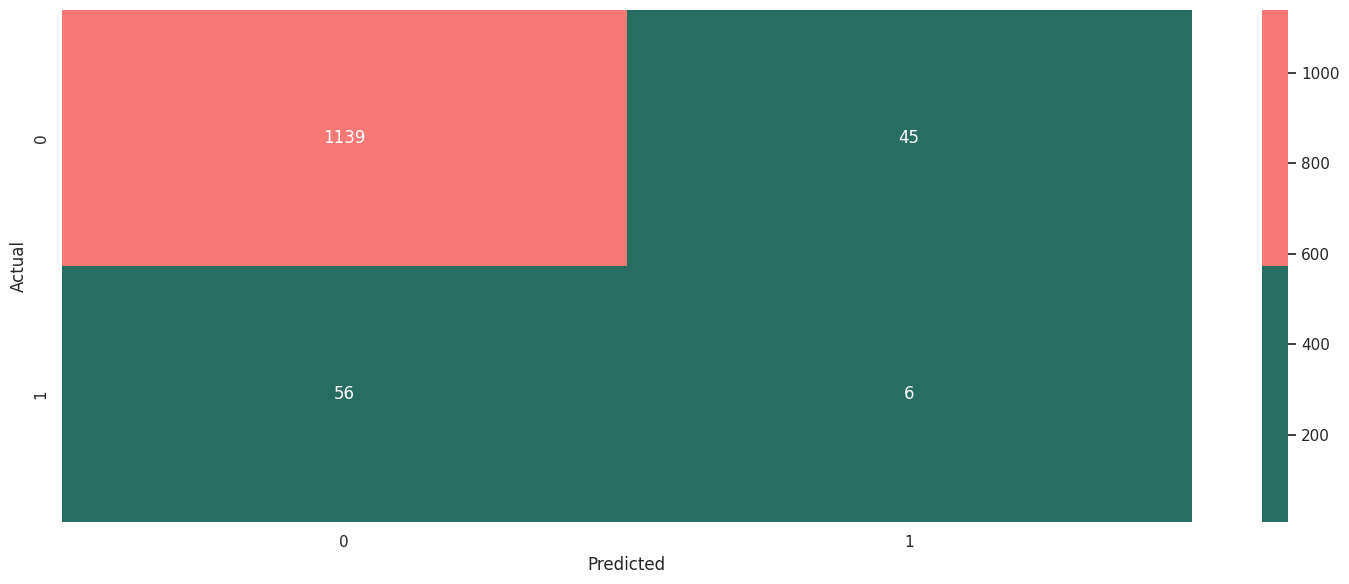

ROC Score:
0.529383718395815


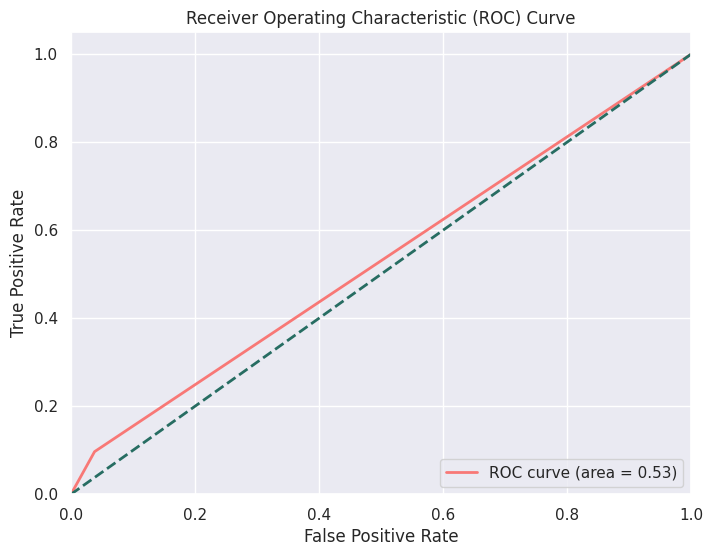

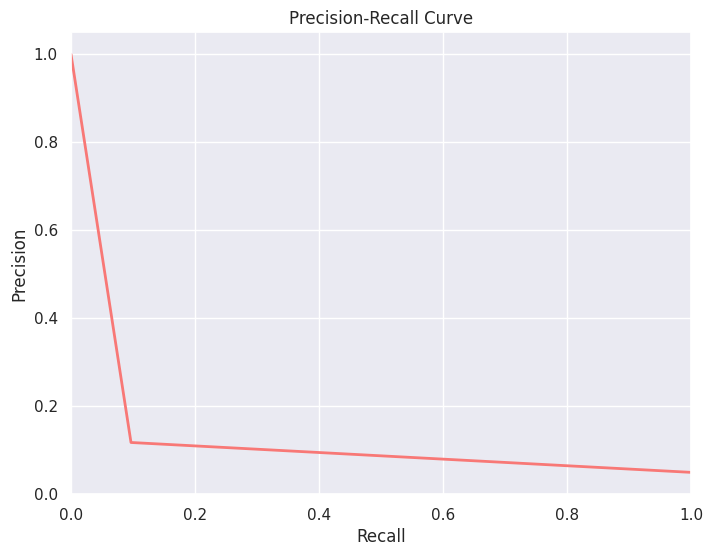

Results for KNeighborsClassifier:
train f1 score
1.0
test f1 score
0.8812199036918138
--------------------
[[1086   98]
 [  50   12]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1184
           1       0.11      0.19      0.14        62

    accuracy                           0.88      1246
   macro avg       0.53      0.56      0.54      1246
weighted avg       0.91      0.88      0.90      1246



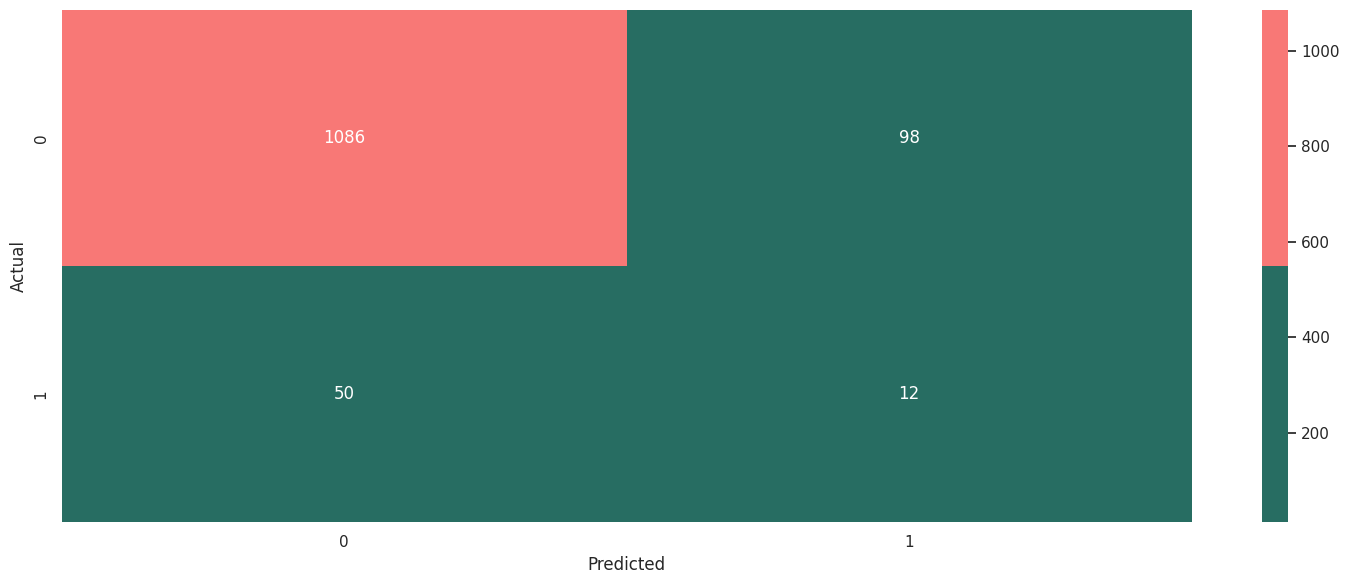

ROC Score:
0.5903239428945074


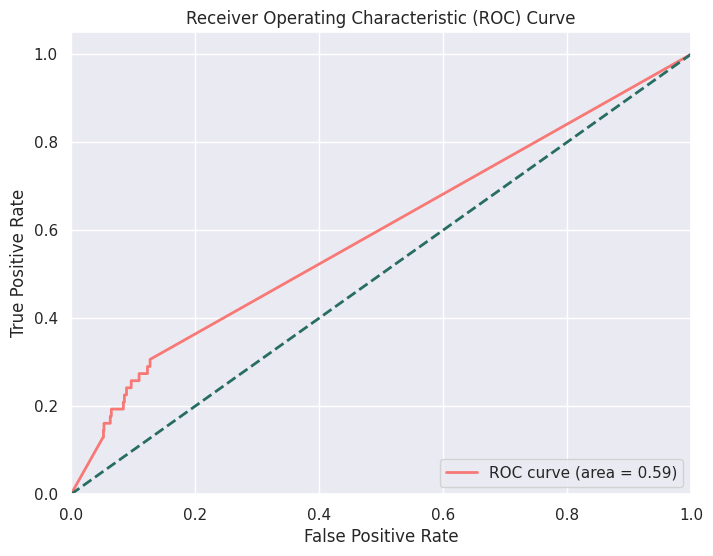

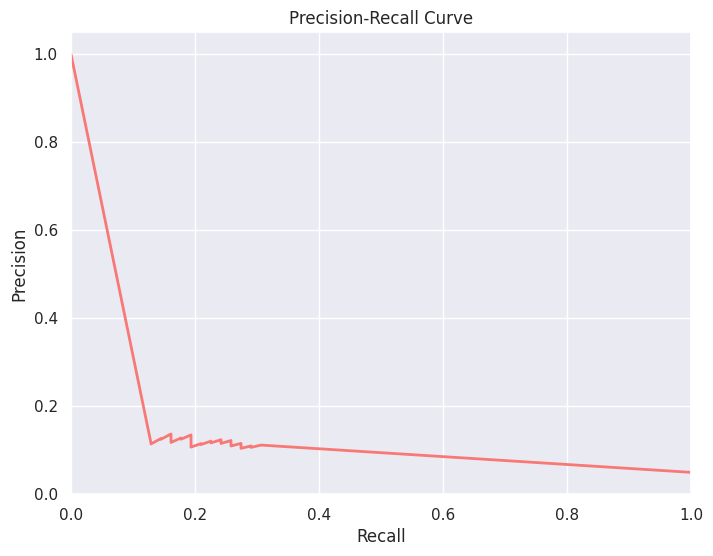

Results for XGBClassifier:
train f1 score
1.0
test f1 score
0.9333868378812199
--------------------
[[1159   25]
 [  58    4]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1184
           1       0.14      0.06      0.09        62

    accuracy                           0.93      1246
   macro avg       0.55      0.52      0.53      1246
weighted avg       0.91      0.93      0.92      1246



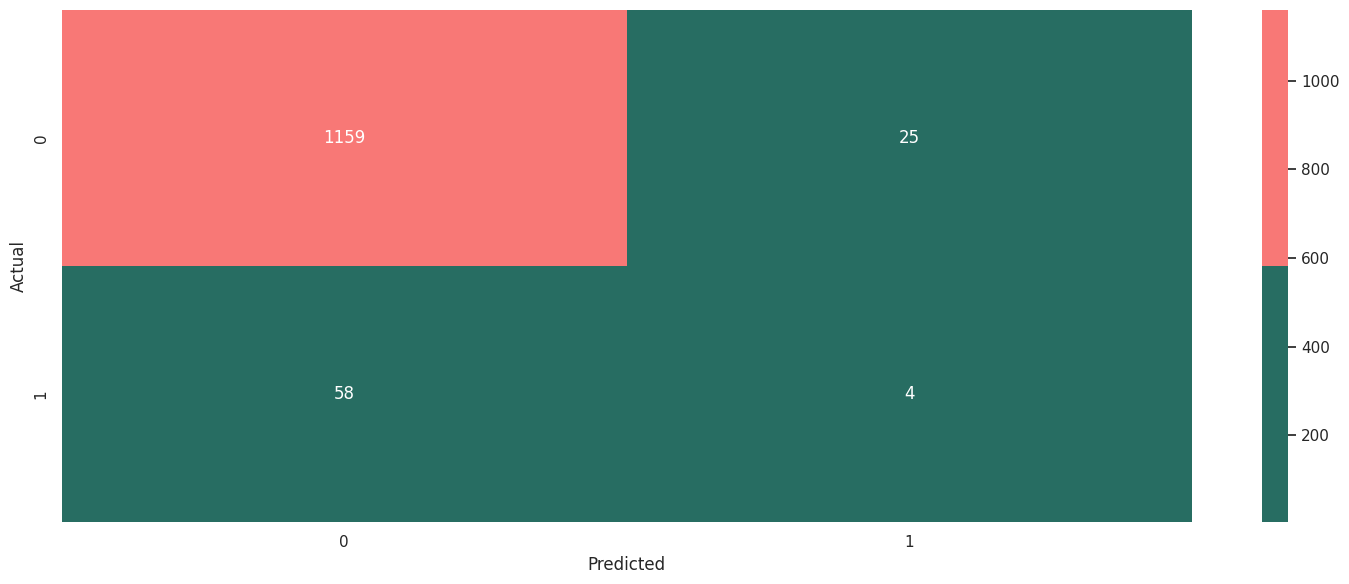

ROC Score:
0.8006348081952921


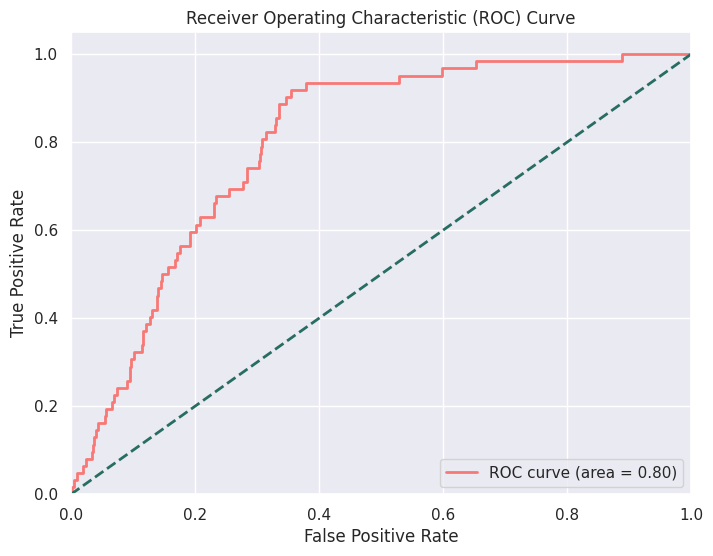

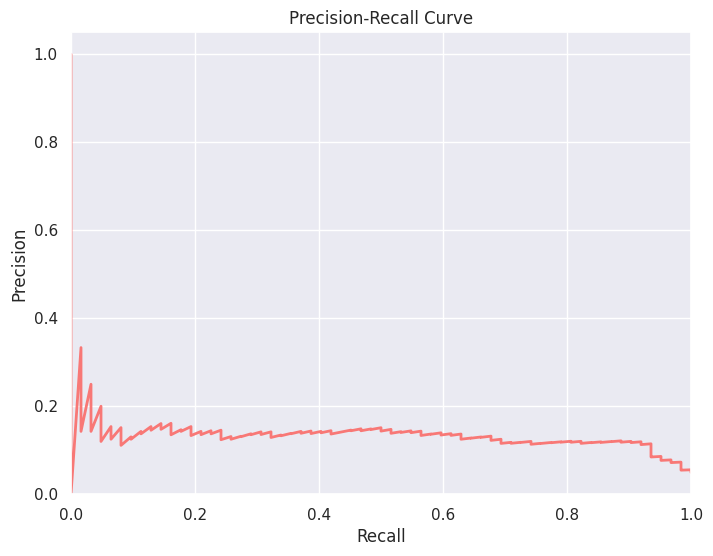

In [ ]:
algr = [clf1,clf2,clf3,clf4,clf5]
for model in algr:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_ovr, y_ovr, X_test, y_test, model)

#### Tuned modles with ADASYN

Results for LogisticRegression:
train f1 score
0.6571147633094536
test f1 score
0.36436597110754415
--------------------
[[392 792]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1184
           1       0.07      1.00      0.14        62

    accuracy                           0.36      1246
   macro avg       0.54      0.67      0.32      1246
weighted avg       0.95      0.36      0.48      1246



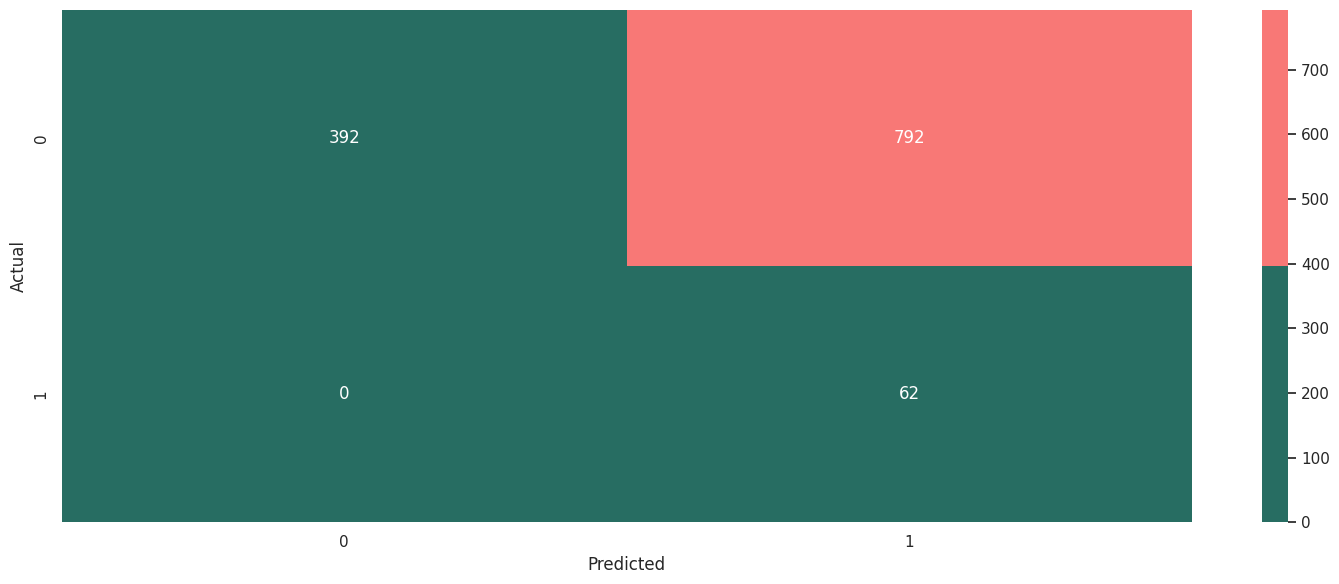

ROC Score:
0.8317349607672189


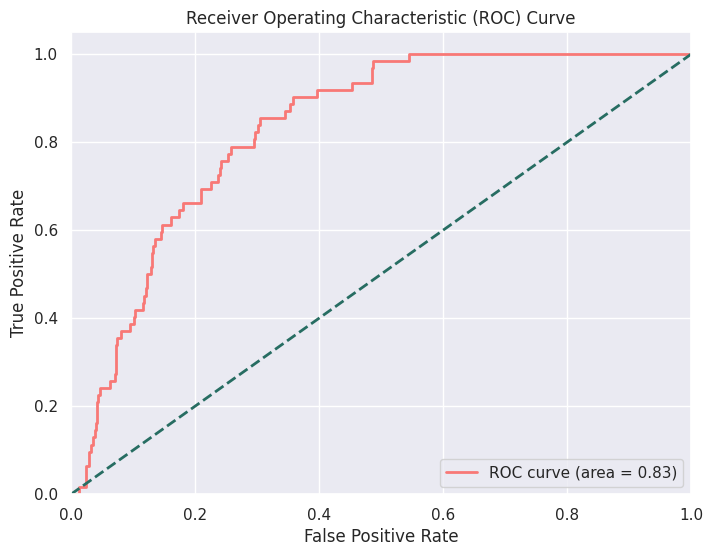

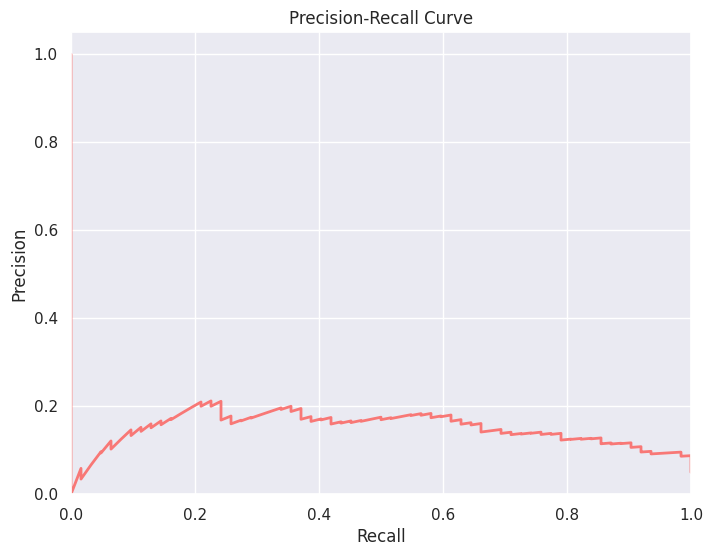

Results for RandomForestClassifier:
train f1 score
0.9084141031043685
test f1 score
0.7552166934189406
--------------------
[[900 284]
 [ 21  41]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1184
           1       0.13      0.66      0.21        62

    accuracy                           0.76      1246
   macro avg       0.55      0.71      0.53      1246
weighted avg       0.93      0.76      0.82      1246



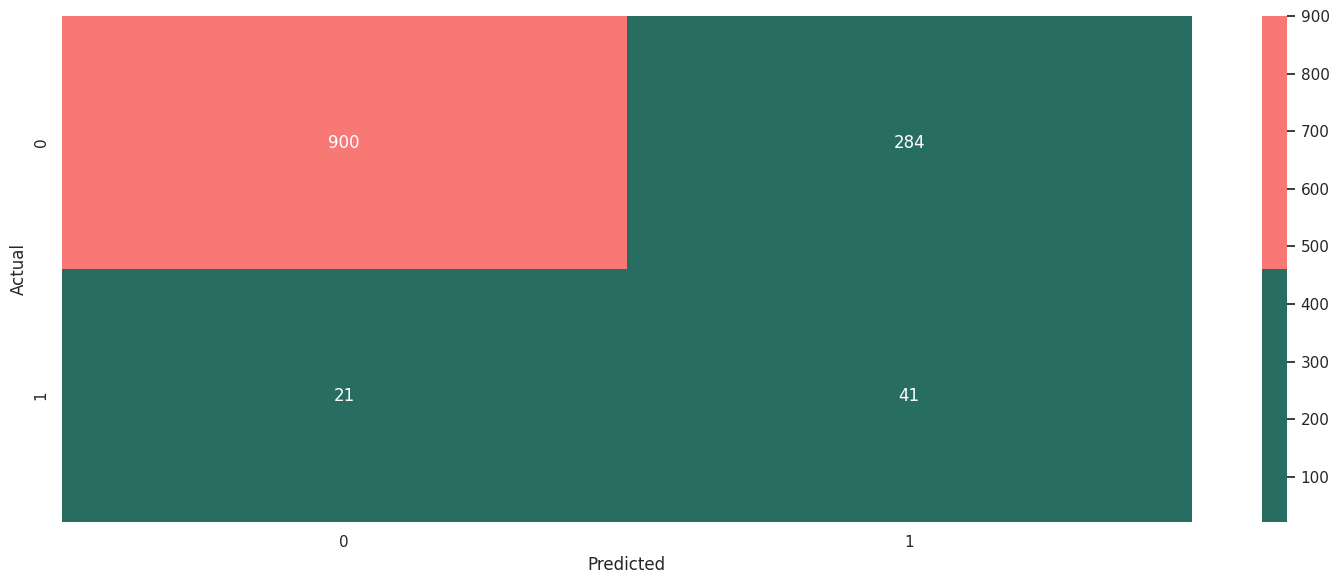

ROC Score:
0.8121730601569311


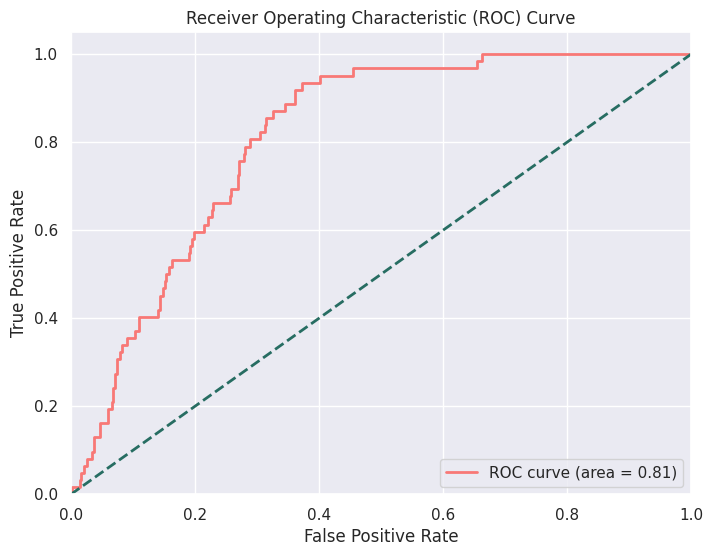

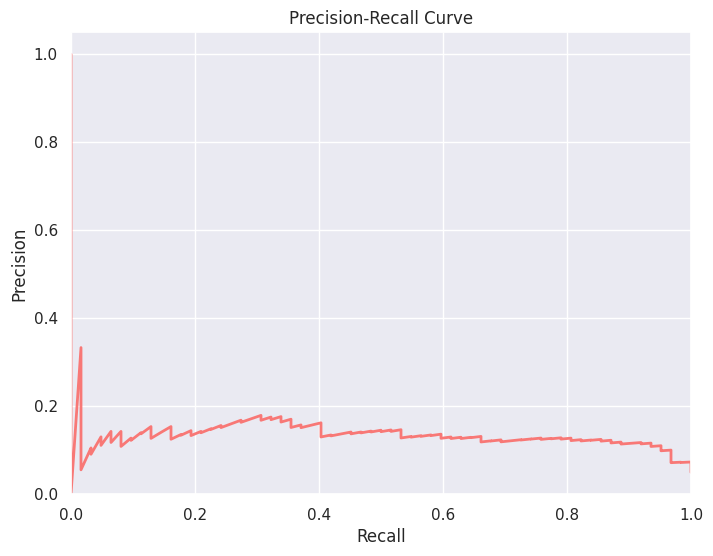

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.8731942215088283
--------------------
[[1068  116]
 [  42   20]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1184
           1       0.15      0.32      0.20        62

    accuracy                           0.87      1246
   macro avg       0.55      0.61      0.57      1246
weighted avg       0.92      0.87      0.89      1246



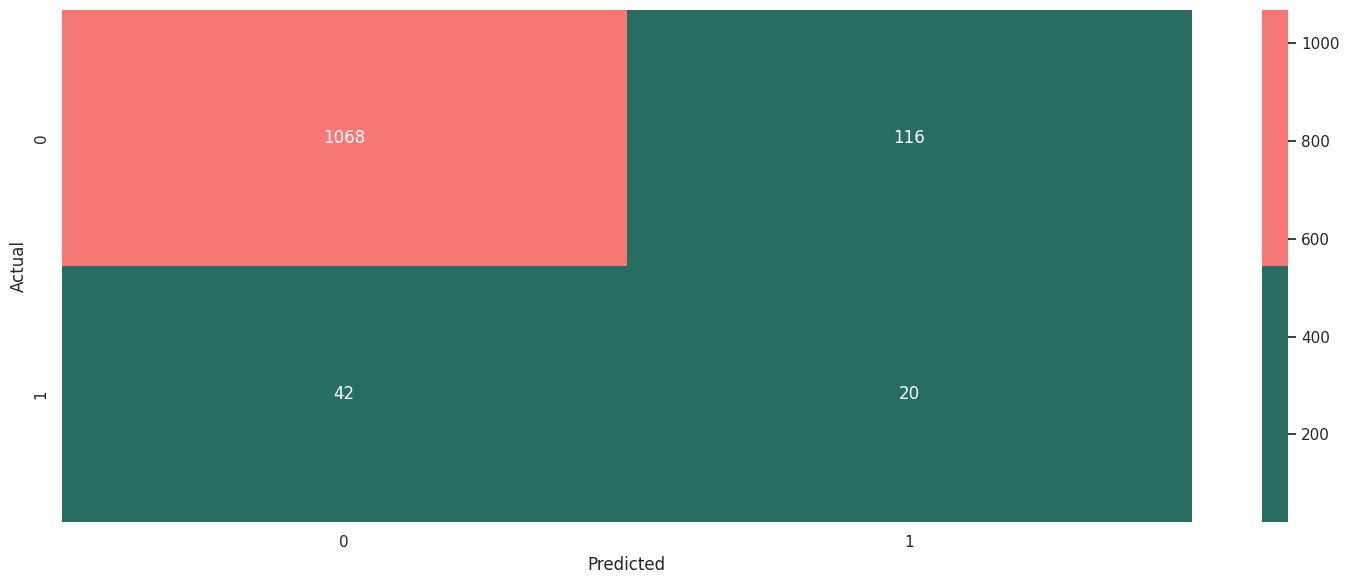

ROC Score:
0.6123038360941586


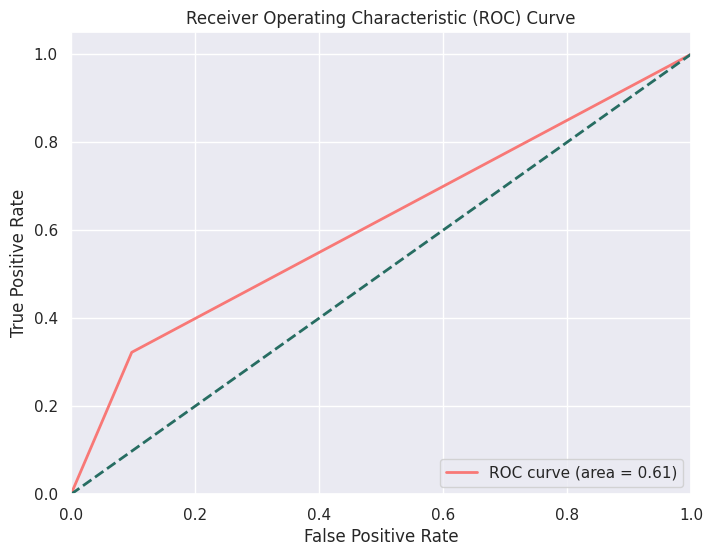

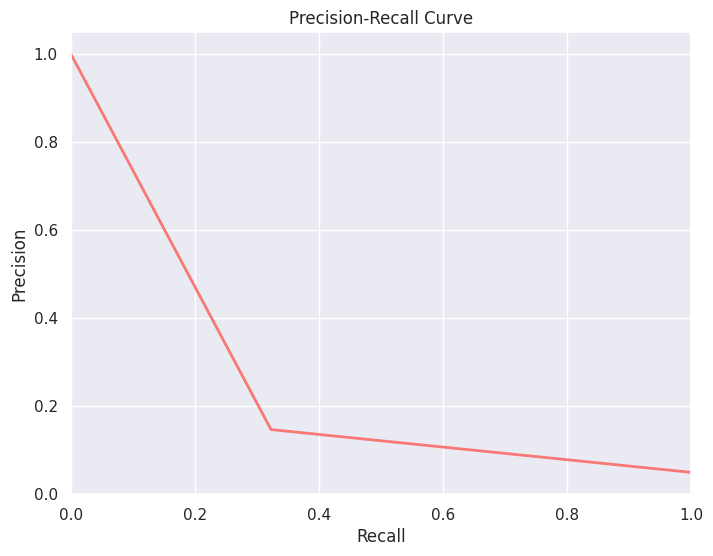

Results for KNeighborsClassifier:
train f1 score
0.8952100014046916
test f1 score
0.7560192616372392
--------------------
[[908 276]
 [ 28  34]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1184
           1       0.11      0.55      0.18        62

    accuracy                           0.76      1246
   macro avg       0.54      0.66      0.52      1246
weighted avg       0.93      0.76      0.82      1246



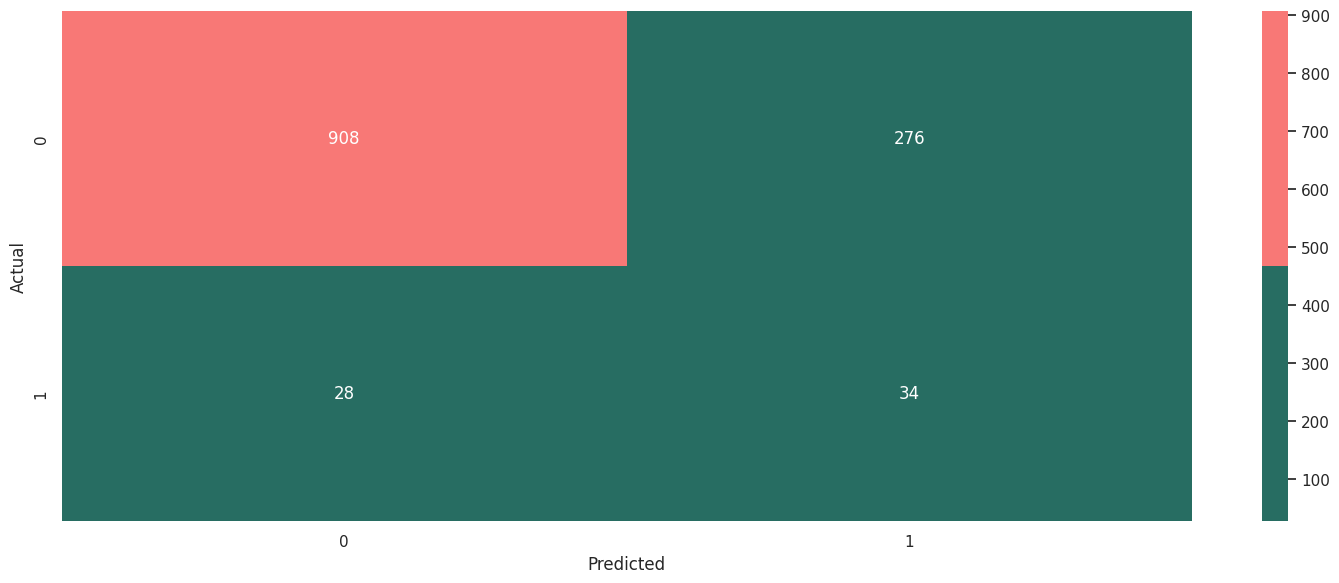

ROC Score:
0.7214131974716652


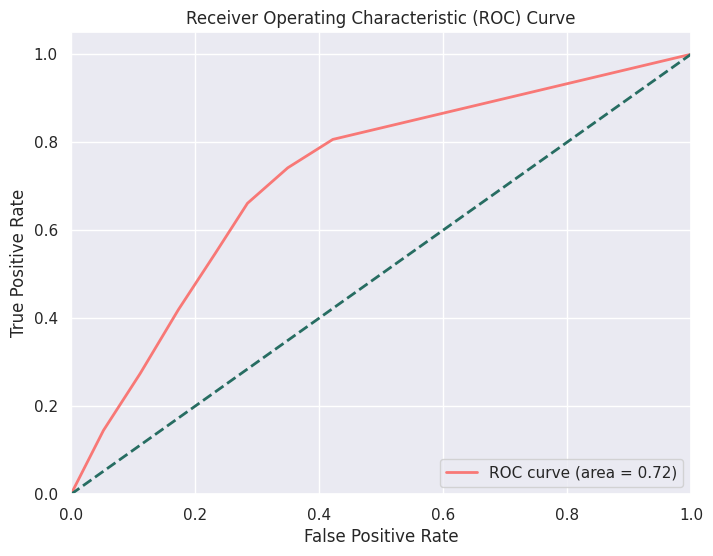

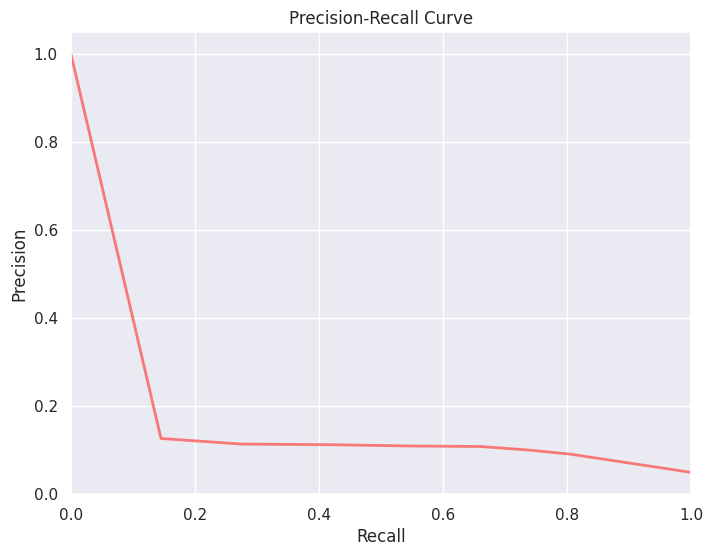

Results for XGBClassifier:
train f1 score
0.9099592639415648
test f1 score
0.8138041733547352
--------------------
[[979 205]
 [ 27  35]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1184
           1       0.15      0.56      0.23        62

    accuracy                           0.81      1246
   macro avg       0.56      0.70      0.56      1246
weighted avg       0.93      0.81      0.86      1246



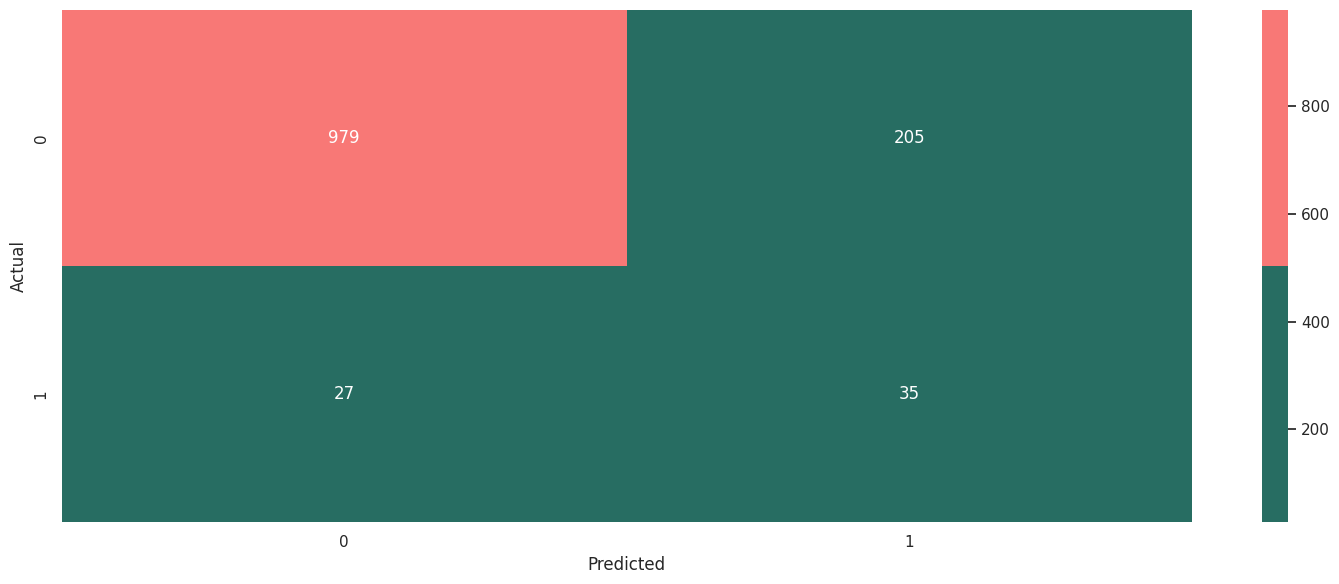

ROC Score:
0.8185620095902354


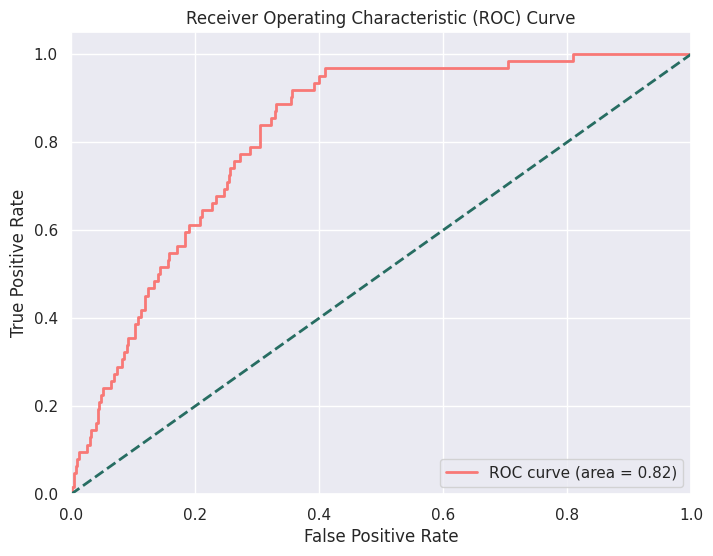

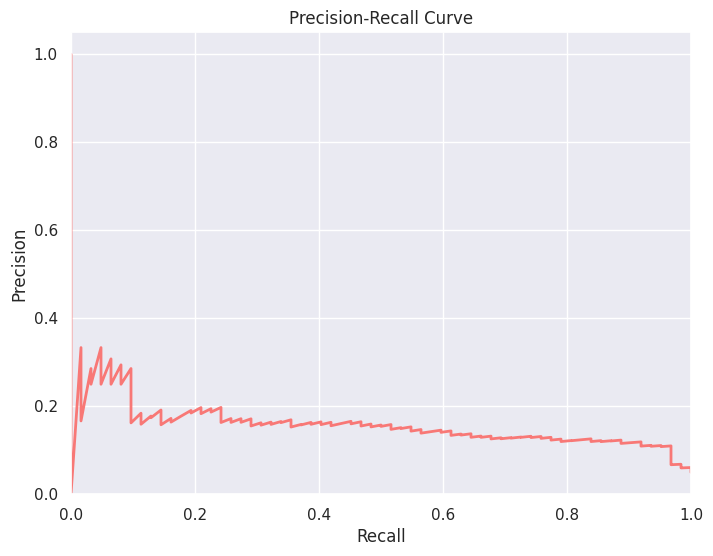

In [ ]:
algr = [clf01,clf02,clf03,clf04,clf05]
for model in algr:
    print(f"Results for {model.__class__.__name__}:")
    classification(X_ad, y_ad, X_test, y_test, model)

#### Tuned modles with Combined SMOTE RUS

Results for LogisticRegression:
train f1 score
0.6727822580645161
test f1 score
0.3820224719101124
--------------------
[[414 770]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52      1184
           1       0.07      1.00      0.14        62

    accuracy                           0.38      1246
   macro avg       0.54      0.67      0.33      1246
weighted avg       0.95      0.38      0.50      1246



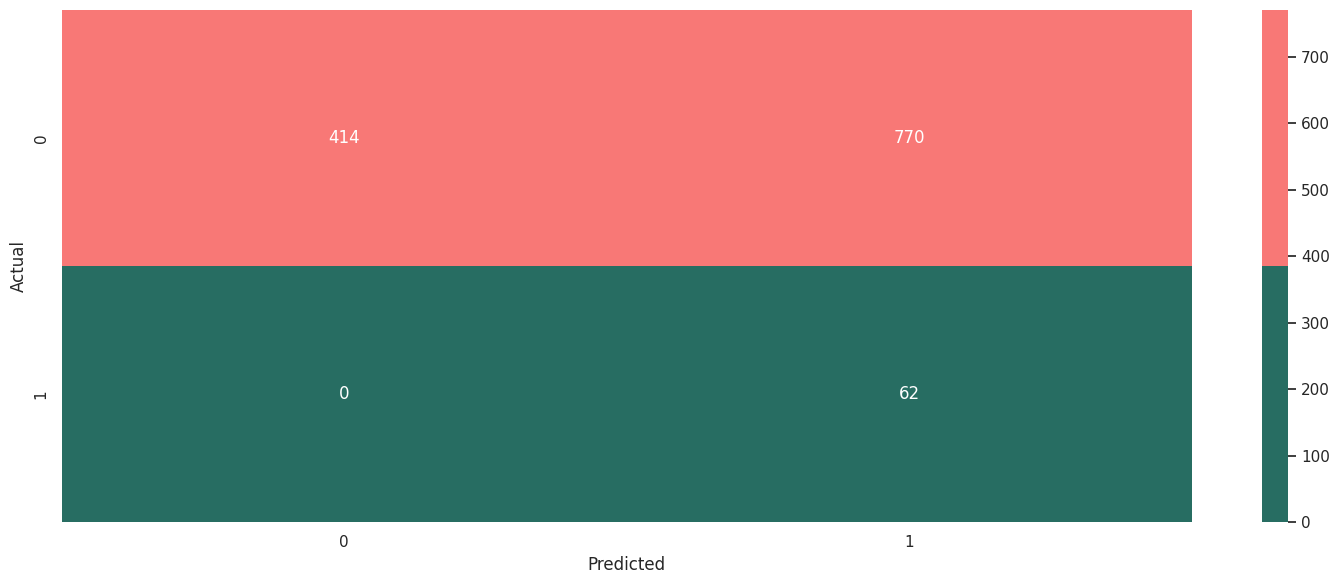

ROC Score:
0.8395406495204882


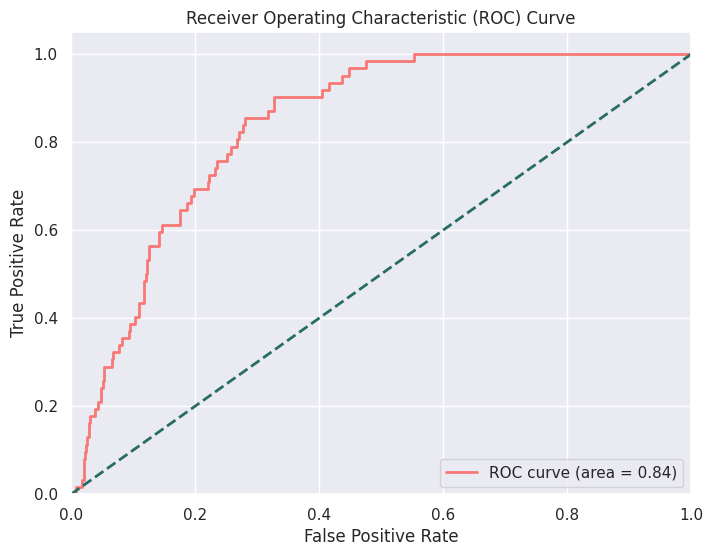

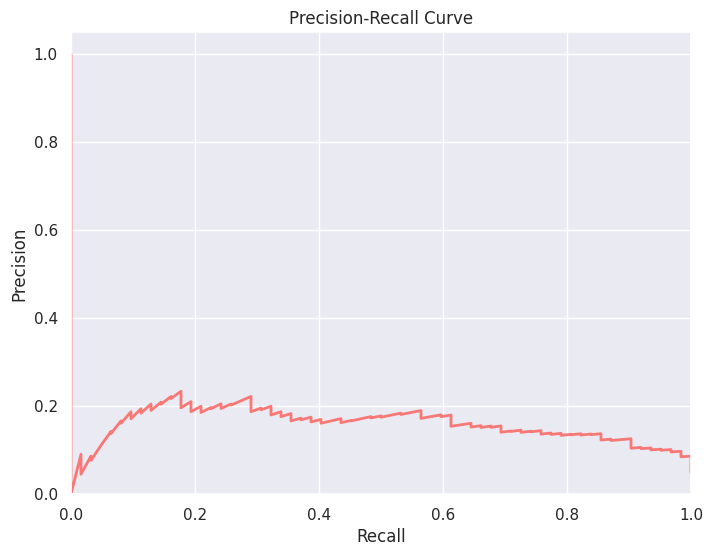

Results for RandomForestClassifier:
train f1 score
0.8826612903225808
test f1 score
0.7495987158908507
--------------------
[[872 312]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1184
           1       0.17      1.00      0.28        62

    accuracy                           0.75      1246
   macro avg       0.58      0.87      0.57      1246
weighted avg       0.96      0.75      0.82      1246



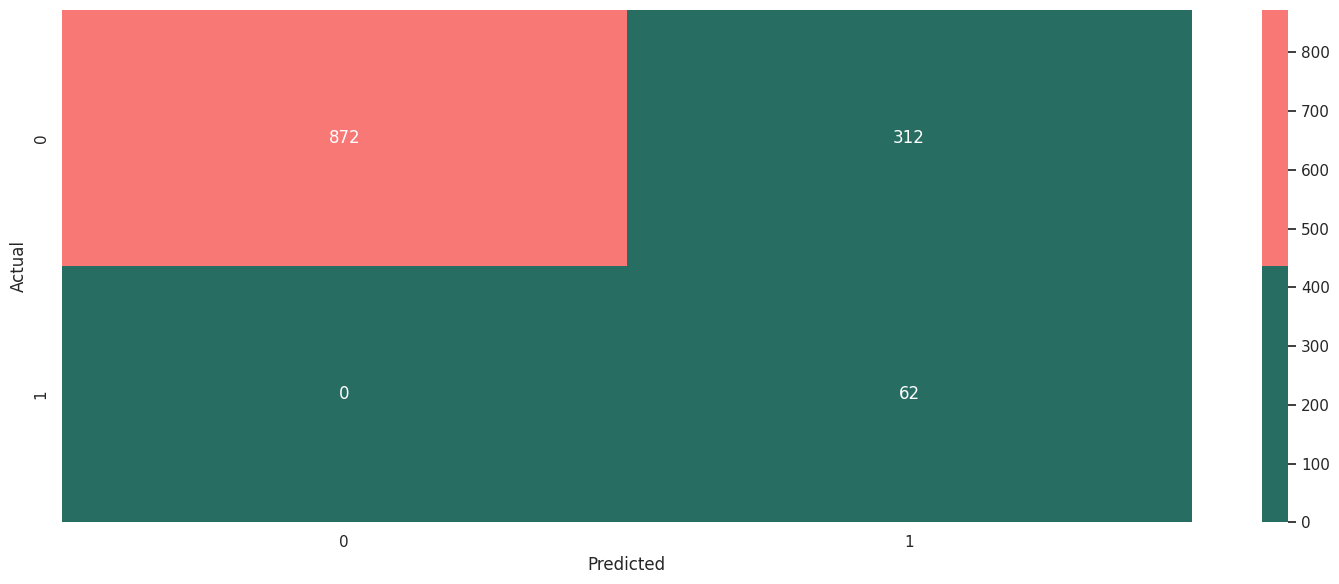

ROC Score:
0.9796207497820401


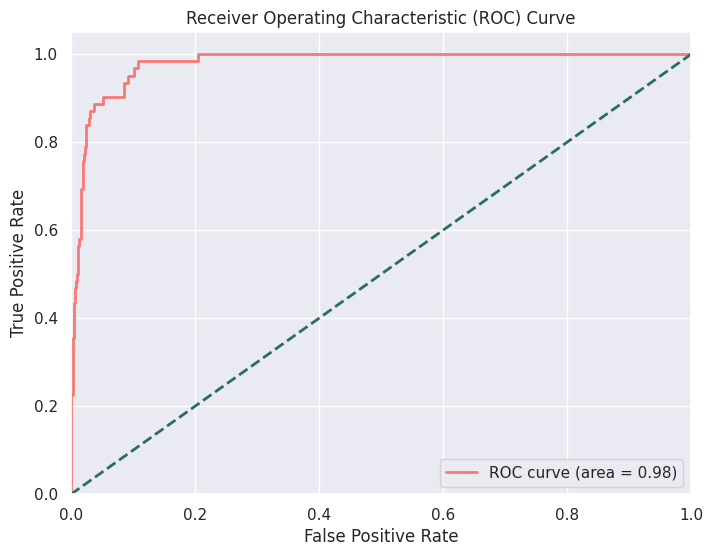

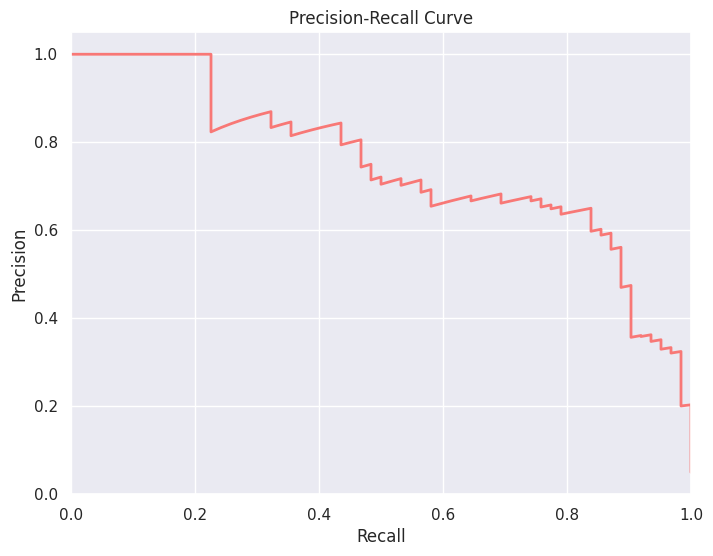

Results for DecisionTreeClassifier:
train f1 score
1.0
test f1 score
0.920545746388443
--------------------
[[1085   99]
 [   0   62]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1184
           1       0.39      1.00      0.56        62

    accuracy                           0.92      1246
   macro avg       0.69      0.96      0.76      1246
weighted avg       0.97      0.92      0.94      1246



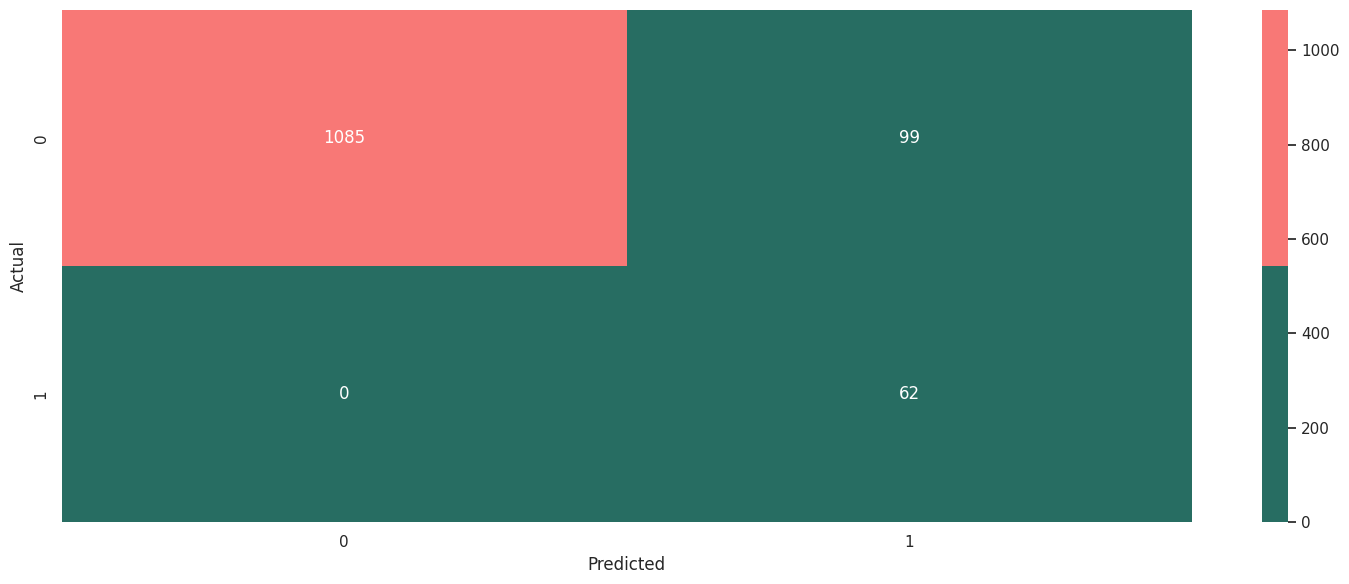

ROC Score:
0.9581925675675675


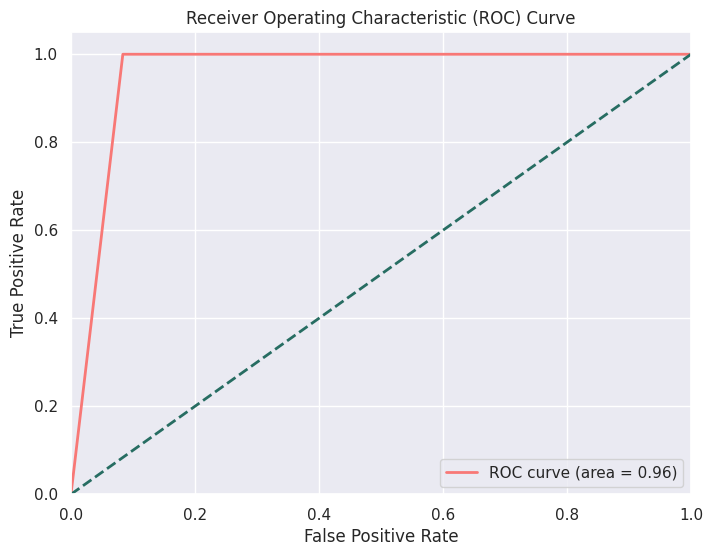

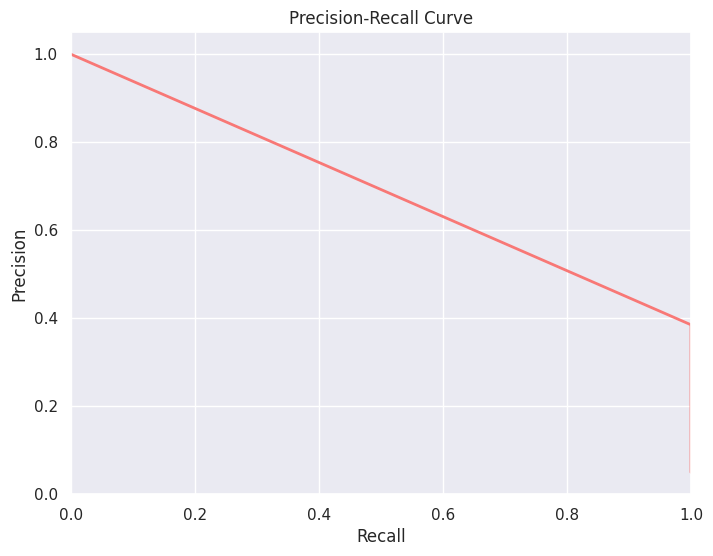

Results for KNeighborsClassifier:
train f1 score
0.8768145161290323
test f1 score
0.7841091492776886
--------------------
[[918 266]
 [  3  59]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      1184
           1       0.18      0.95      0.30        62

    accuracy                           0.78      1246
   macro avg       0.59      0.86      0.59      1246
weighted avg       0.96      0.78      0.84      1246



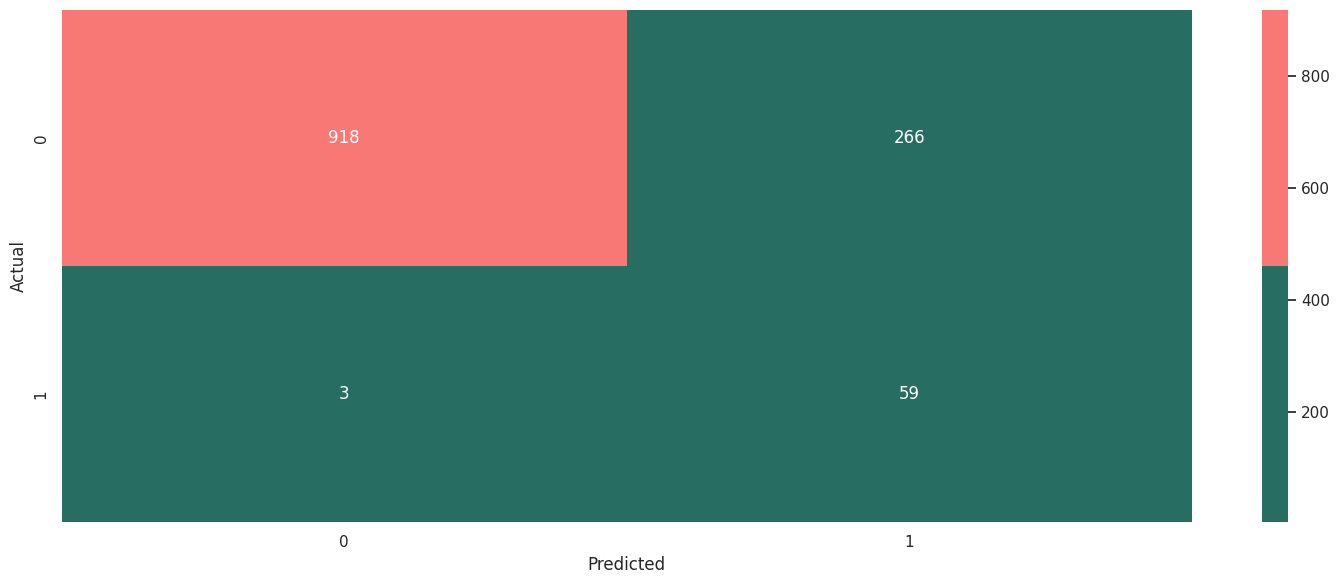

ROC Score:
0.9453942349607672


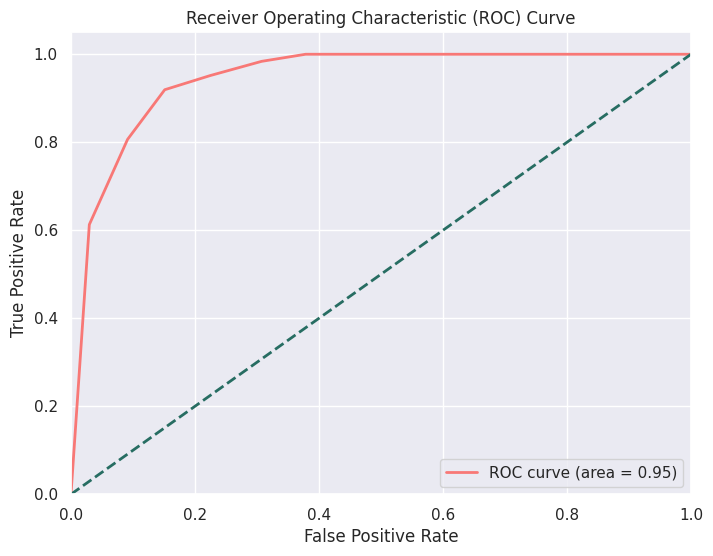

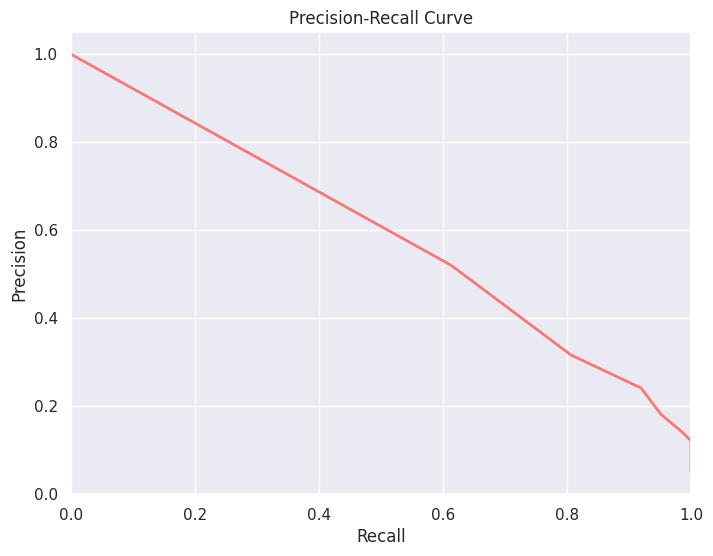

Results for XGBClassifier:
train f1 score
0.9102822580645161
test f1 score
0.8210272873194222
--------------------
[[965 219]
 [  4  58]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1184
           1       0.21      0.94      0.34        62

    accuracy                           0.82      1246
   macro avg       0.60      0.88      0.62      1246
weighted avg       0.96      0.82      0.87      1246



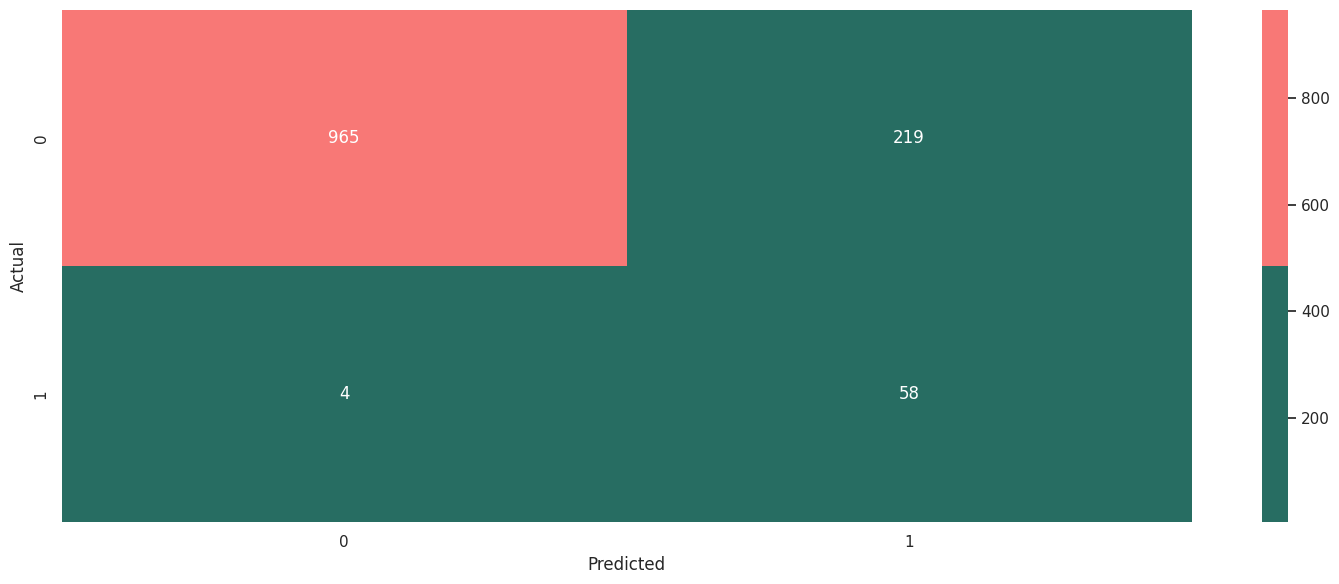

ROC Score:
0.9317785527462946


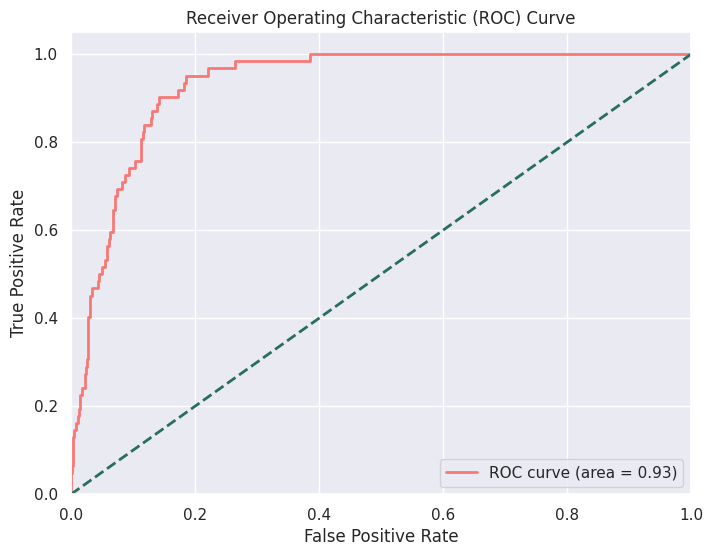

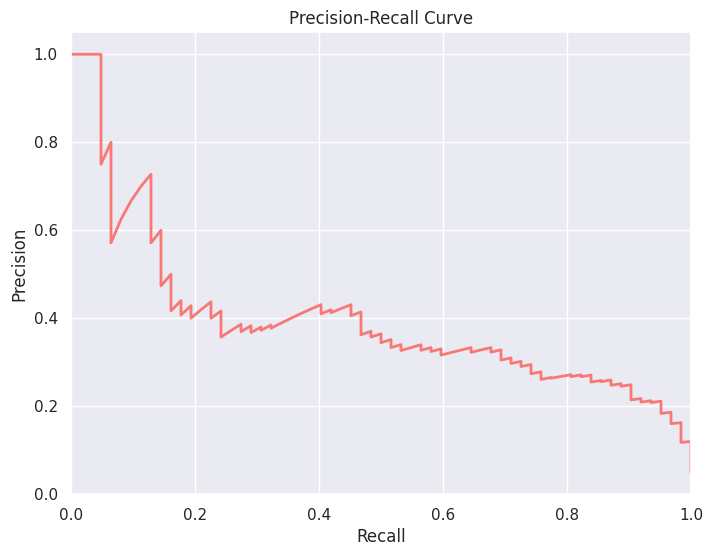

In [ ]:
algr = [clf01,clf02,clf03,clf04,clf05]
for model in algr:
    print(f"Results for {model.__class__.__name__}:")
    classification(f1, t1, X_test, y_test, model)

#### Ensemble Method (Voting Classifier)

- RUS
- SMOTE

train f1 score
0.8850806451612905
test f1 score
0.6091492776886035
--------------------
[[697 487]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74      1184
           1       0.11      1.00      0.20        62

    accuracy                           0.61      1246
   macro avg       0.56      0.79      0.47      1246
weighted avg       0.96      0.61      0.71      1246



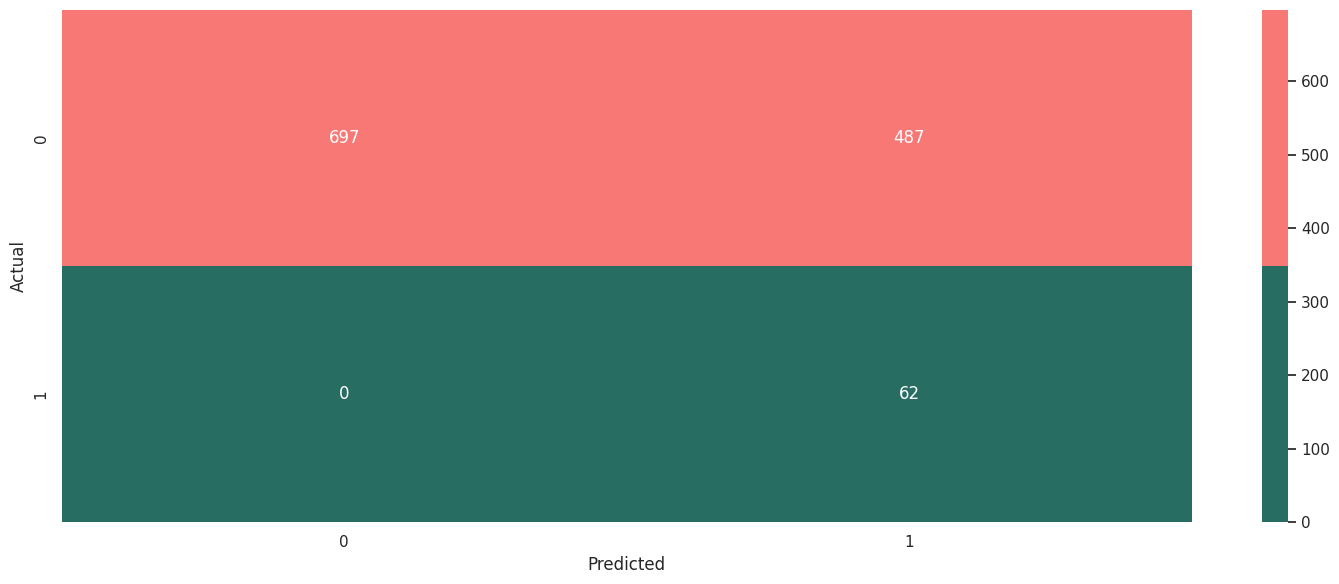

train f1 score
0.9156100309946463
test f1 score
0.7664526484751204
--------------------
[[915 269]
 [ 22  40]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1184
           1       0.13      0.65      0.22        62

    accuracy                           0.77      1246
   macro avg       0.55      0.71      0.54      1246
weighted avg       0.93      0.77      0.83      1246



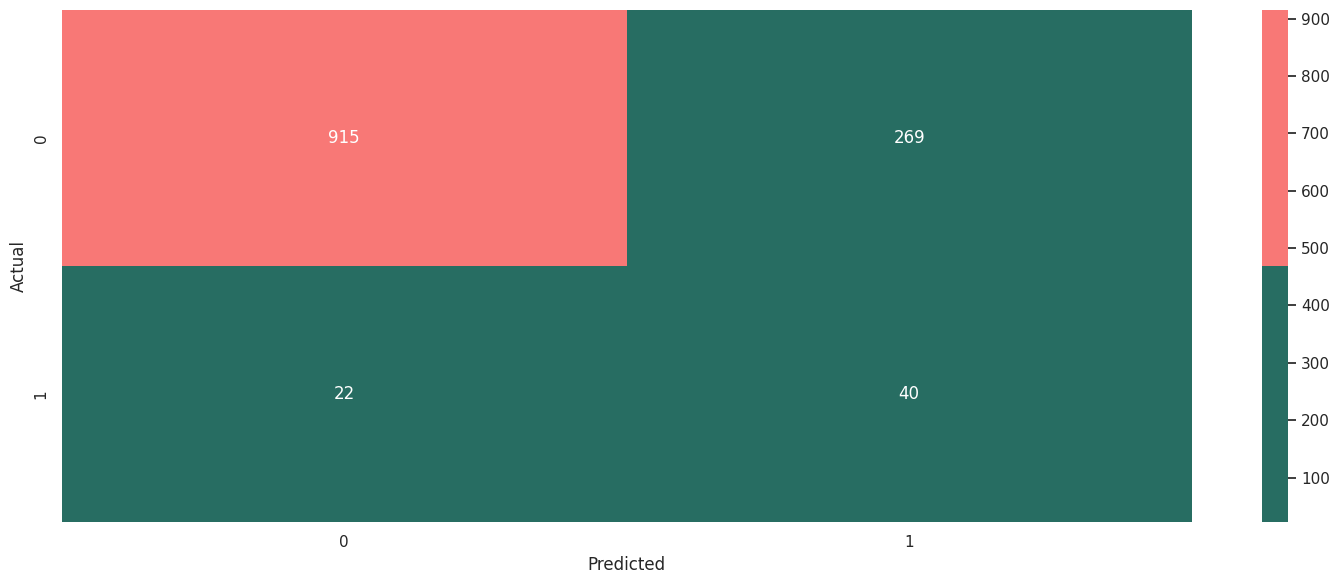

In [ ]:
classification(X_un, y_un, X_test, y_test, ensemble_model)
classification(X_sm, y_sm, X_test, y_test, ensemble_model2)

# ML Models use of combine dataset

 **Logistic Regression model**

The accuracy of Logistic Regression model  79.70430107526882


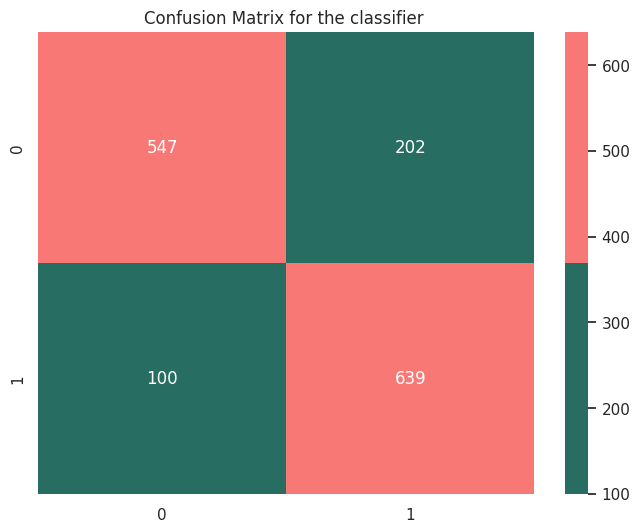

In [ ]:
# Logistic Regression model with data (combined undersampling and oversampling method)
l1=LogisticRegression(random_state=42)
l1.fit(x_trainc,y_trainc)
y_pred_log=l1.predict(x_testc)
ac1=accuracy_score(y_testc,y_pred_log)*100
print('The accuracy of Logistic Regression model ',ac1 )
conf_and_plot(y_testc,y_pred_log)

**Random ForestClassifier**

The accuracy of Random Forest Classifier model  86.29032258064517


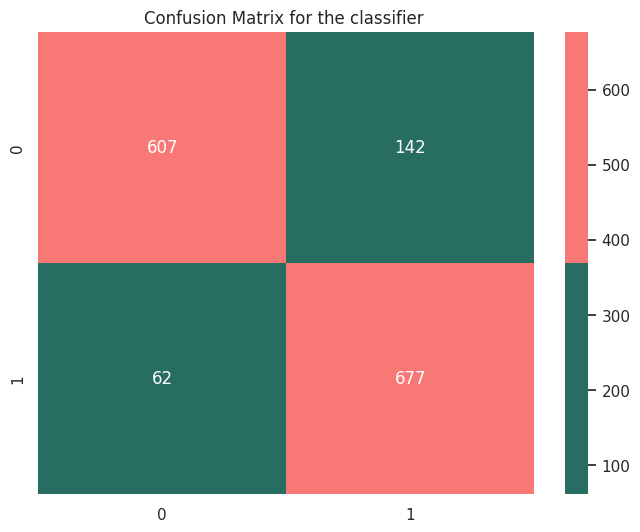

In [ ]:
# Random Forest Classifier model with data (combined undersampling and oversampling method)
rfc=RandomForestClassifier(n_estimators=10,criterion="gini")
rfc.fit(x_trainc,y_trainc)
y_pred_rfc=rfc.predict(x_testc)
ac2=accuracy_score(y_testc,y_pred_rfc)*100
print('The accuracy of Random Forest Classifier model ',ac2 )
conf_and_plot(y_testc,y_pred_rfc)


**Gaussian Naive Bayes model**

The accuracy of Gaussian Naive Bayes model  74.66397849462365


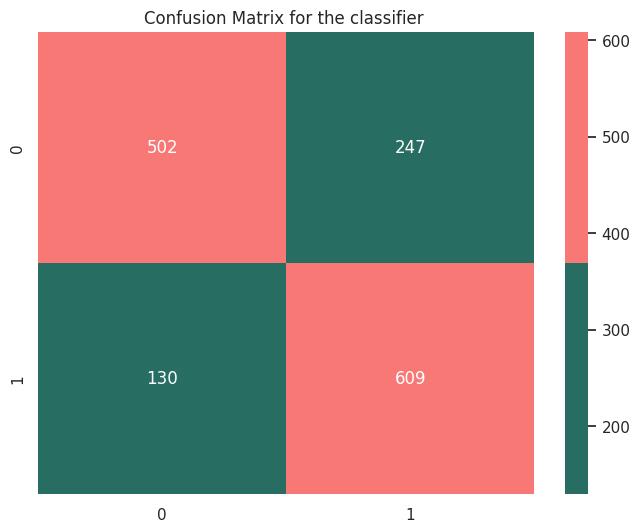

In [ ]:
# Gaussian Naive Bayes model with data (combined undersampling and oversampling method)
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

nb.fit(x_trainc,y_trainc)

y_pred_nb=nb.predict(x_testc)
from sklearn.metrics import accuracy_score
ac3=accuracy_score(y_testc,y_pred_nb)*100
print('The accuracy of Gaussian Naive Bayes model ',ac3 )
conf_and_plot(y_testc,y_pred_nb)


**K-Nearest Neighbors (KNN) Classifier**

The accuracy of K-Nearest Neighbors (KNN) Classifier  83.40053763440861


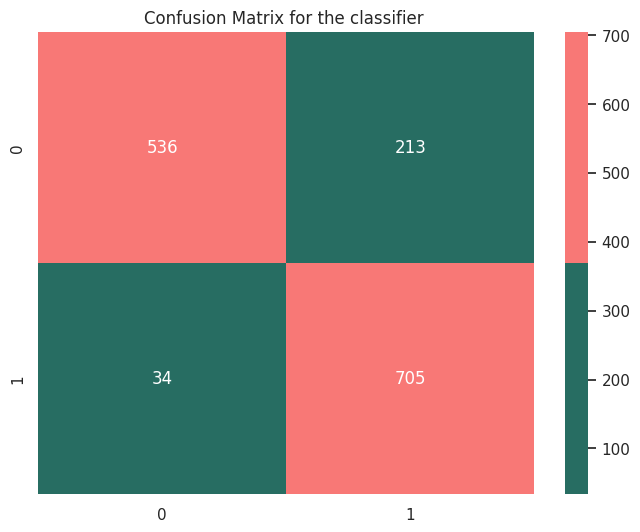

In [ ]:
# K-Nearest Neighbors (KNN) Classifier with data (combined undersampling and oversampling method)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(x_trainc, y_trainc)

y_pred_neigh=neigh.predict(x_testc)
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_testc,y_pred_neigh)*100
ac4
print('The accuracy of K-Nearest Neighbors (KNN) Classifier ',ac4 )
conf_and_plot(y_testc,y_pred_neigh)


# Unsupervised Methods

# Clustering

get the original data

In [ ]:
 import pandas as pd
 cluster_data= pd.read_csv("brain_stroke.csv")
 le = LabelEncoder()
for col in cluster_data.select_dtypes(include='O').columns :
    cluster_data[col] = le.fit_transform(cluster_data[col])
# get the target and features
features =  cluster_data.drop(columns=['stroke'])
target =  cluster_data['stroke']


In [ ]:
cluster_data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  1             228.69  36.6               1       1  
1                  0             105.92  32.5               2       1  
2                  1             171.23  34.4               3       1  
3                  0             174.12  24.0               2       1  
4                  1             186.21  29.0               1       1  
...              ...                ...   ...             ...     ...  
4976               0              70.15  29.8               1       0  
4977               1             191.15  31.1               3       0  
4978               0              95.02  31.8               3       0  
4979               0              83.94  30.0               3       0  
4980               1              83.75  29.1               2       0  

[4981 rows x 11 columns]

original data visualization


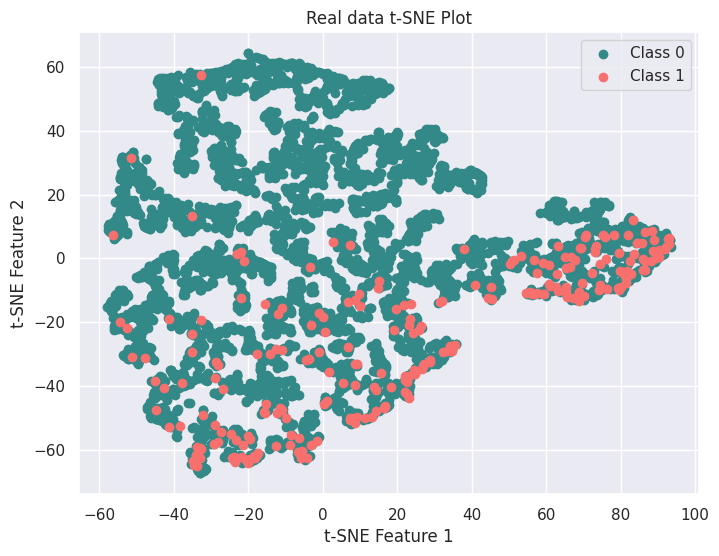

In [ ]:
# Define a list of custom colors for each class
custom_colors = ['#328987', '#f8706e']

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(features)

# Create a scatter plot of the data points, colored by cluster
fig, ax = plt.subplots(figsize=(8, 6))
for label in np.unique(y):
    idx = target == label
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], c=custom_colors[label], label=f'Class {label}')

plt.title('Real data t-SNE Plot')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Add a legend to show the mapping of colors to class labels
plt.legend()

plt.show()

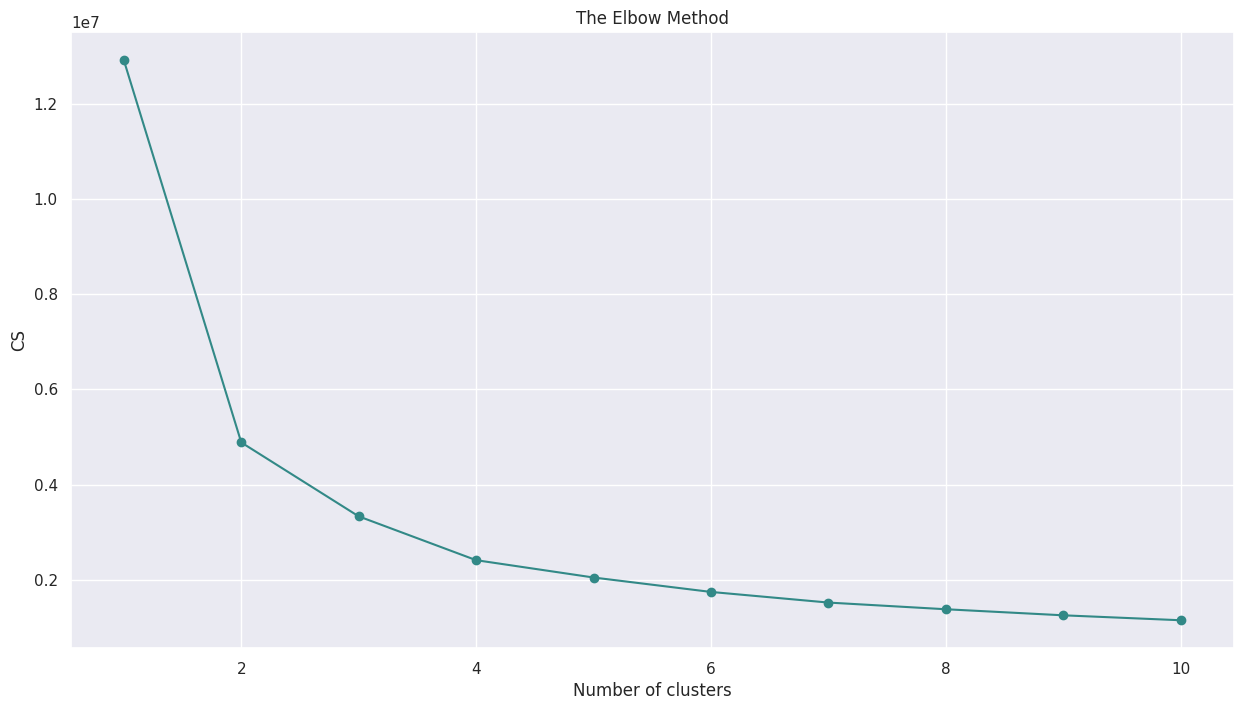

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, color='#328987', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.grid(True)
plt.show()


In [ ]:
features

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1             228.69  36.6               1  
1                  0             105.92  32.5               2  
2                  1             171.23  34.4               3  
3                  0             174.12  24.0               2  
4                  1             186.21  29.0               1  
...              ...                ...   ...             ...  
4976               0              70.15  29.8               1  
4977               1             191.15  31.1               3  
4978               0              95.02  31.8               3  
4979               0              83.94  30.0               3  
4980               1              83.75  29.1               2  

[4981 rows x 10 columns]

##kmeans

f1 score: 0.8403934952820719
silhouette_score:  0.6453652779830275
Accuracy: 0.8403934952820719
--------------------
[[4096  637]
 [ 158   90]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4733
           1       0.12      0.36      0.18       248

    accuracy                           0.84      4981
   macro avg       0.54      0.61      0.55      4981
weighted avg       0.92      0.84      0.88      4981



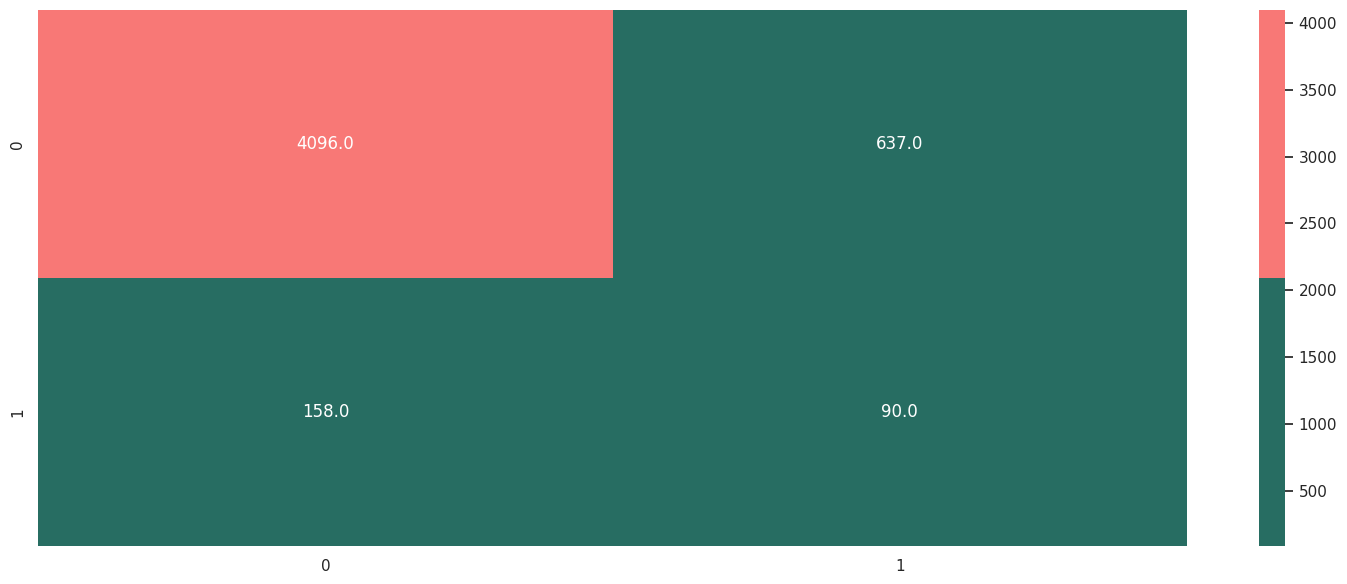

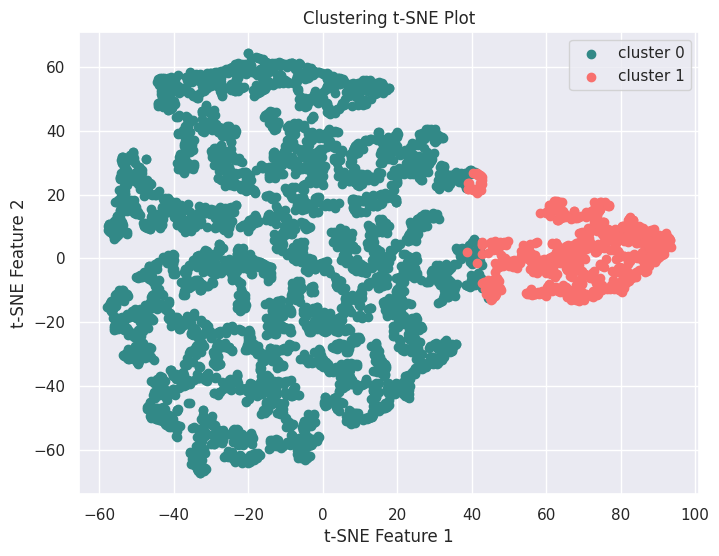

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(features)
labels = kmeans.predict(features)
evaluation(target, labels,features)

TSNE then trains the model



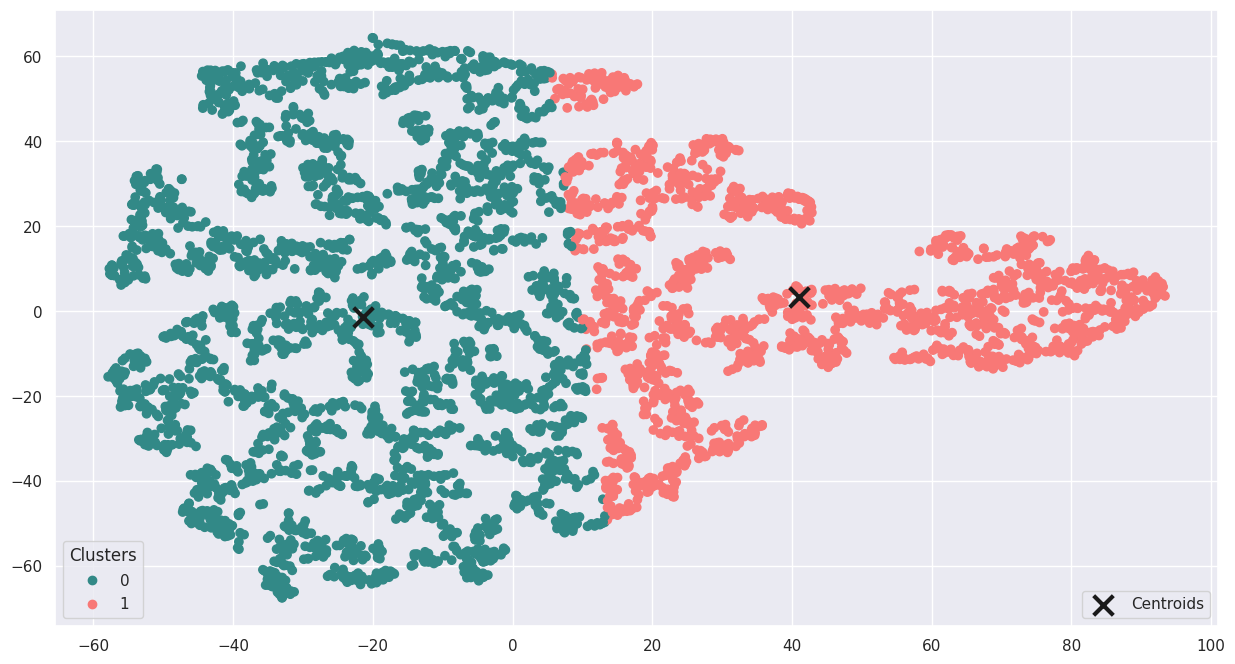

In [ ]:
from matplotlib.colors import ListedColormap

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(features)

# Cluster the data in the t-SNE space using k-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_tsne)
centroids = kmeans.cluster_centers_
# Define custom colors for data points and centroids
data_point_colors = ['#328987', '#f87876']  # Set colors for each cluster
centroid_color = 'k'  # Black color for centroids

# Plot the t-SNE visualization with centroids
fig, ax = plt.subplots()
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_, cmap=ListedColormap(data_point_colors))
scatter_cen = ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, color=centroid_color)
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
ax.add_artist(legend1)
ax.legend([scatter_cen], ['Centroids'], loc="lower right")
plt.show()

##AgglomerativeClustering

f1 score: 0.8544468982132102
silhouette_score:  0.6521083557174726
Accuracy: 0.8544468982132102
--------------------
[[4168  565]
 [ 160   88]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4733
           1       0.13      0.35      0.20       248

    accuracy                           0.85      4981
   macro avg       0.55      0.62      0.56      4981
weighted avg       0.92      0.85      0.88      4981



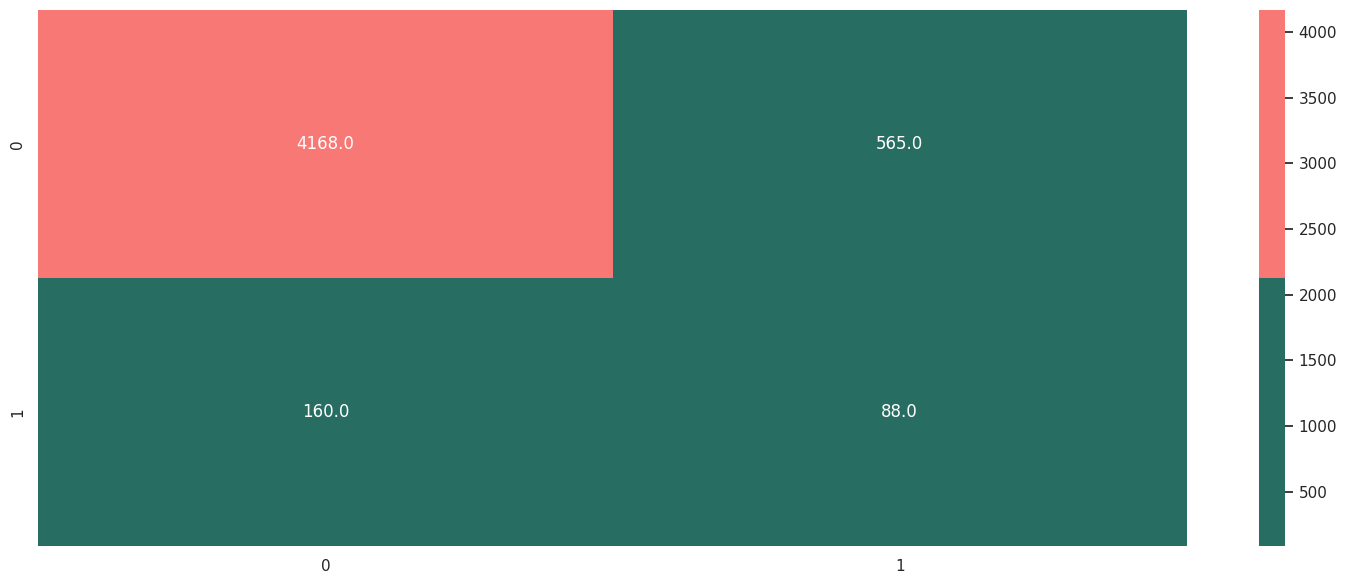

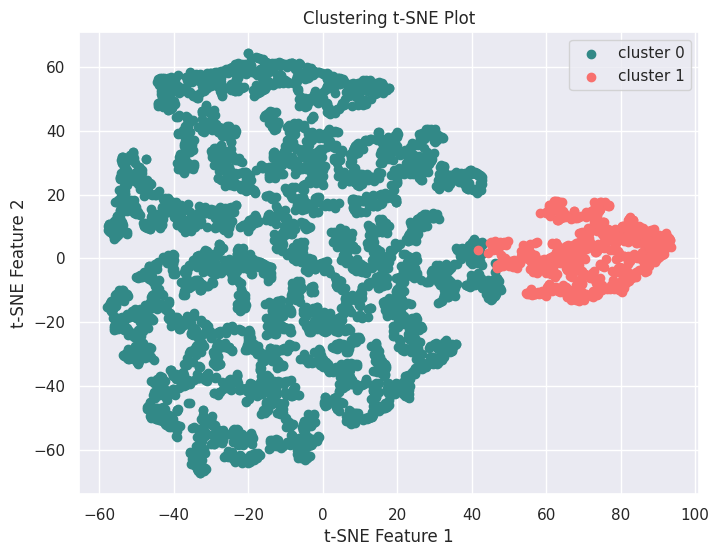

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(features)
evaluation(target, labels,features)

##GaussianMixture

f1 score: 0.9138727163220237
silhouette_score:  0.2563664960668062
Accuracy: 0.9138727163220237
--------------------
[[4505  228]
 [ 201   47]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4733
           1       0.17      0.19      0.18       248

    accuracy                           0.91      4981
   macro avg       0.56      0.57      0.57      4981
weighted avg       0.92      0.91      0.92      4981



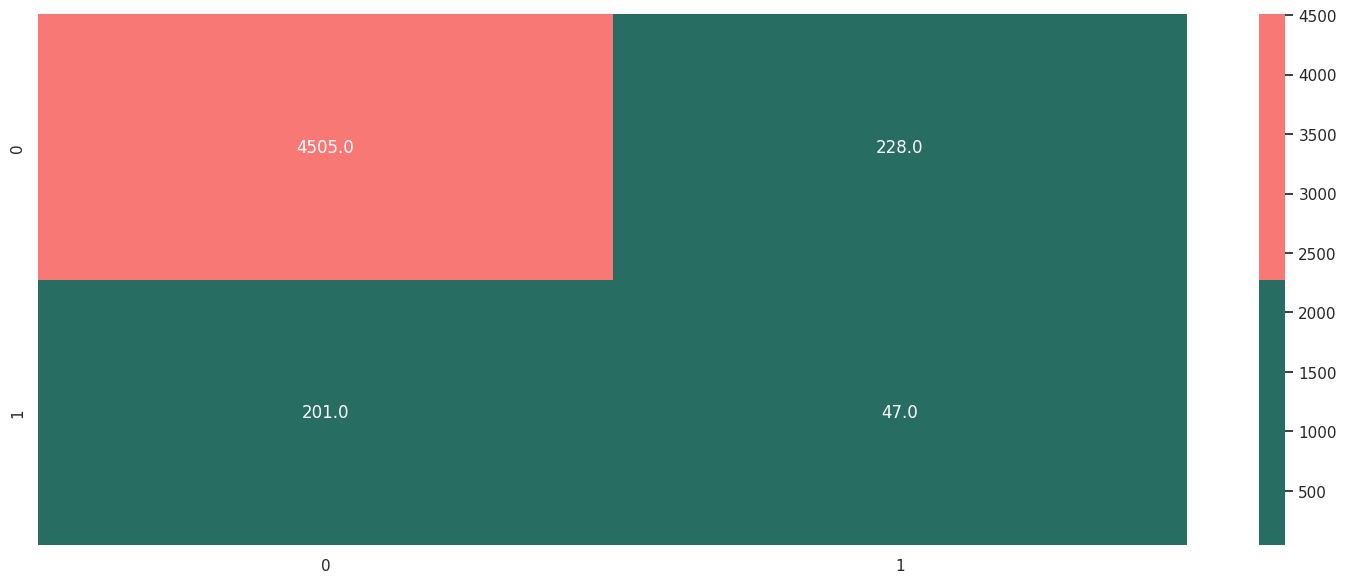

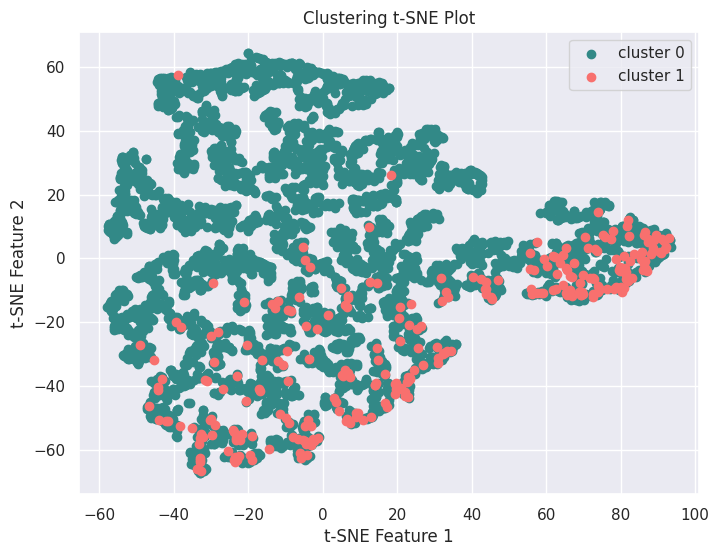

In [ ]:
gmm = GaussianMixture(n_components=2)
# Fit the model to the data
gmm.fit(features)
# Predict the clusters for each data point
labels = gmm.predict(features)
evaluation(target, labels,features)

#CUT DATA

In [ ]:
#get the data
df1=cluster_data
# olny stroke data
data1=df1[df1['stroke']==1]
#non stroke data
data2=df1[df1['stroke']==0]
data0=[]
random.seed(2)
for n in range(len(data1)):
  data0.append(data2.iloc[random.randint(1,len(data2))])
data0=pd.DataFrame(data0)
newdata=pd.concat([data1, data0], ignore_index=True)
Xn = newdata.drop(columns=['stroke'])
yn = newdata['stroke']

##kmeans

f1 score: 0.6129032258064516
silhouette_score:  0.6564947344735707
Accuracy: 0.6129032258064516
--------------------
[[215  33]
 [159  89]]
              precision    recall  f1-score   support

         0.0       0.57      0.87      0.69       248
         1.0       0.73      0.36      0.48       248

    accuracy                           0.61       496
   macro avg       0.65      0.61      0.59       496
weighted avg       0.65      0.61      0.59       496



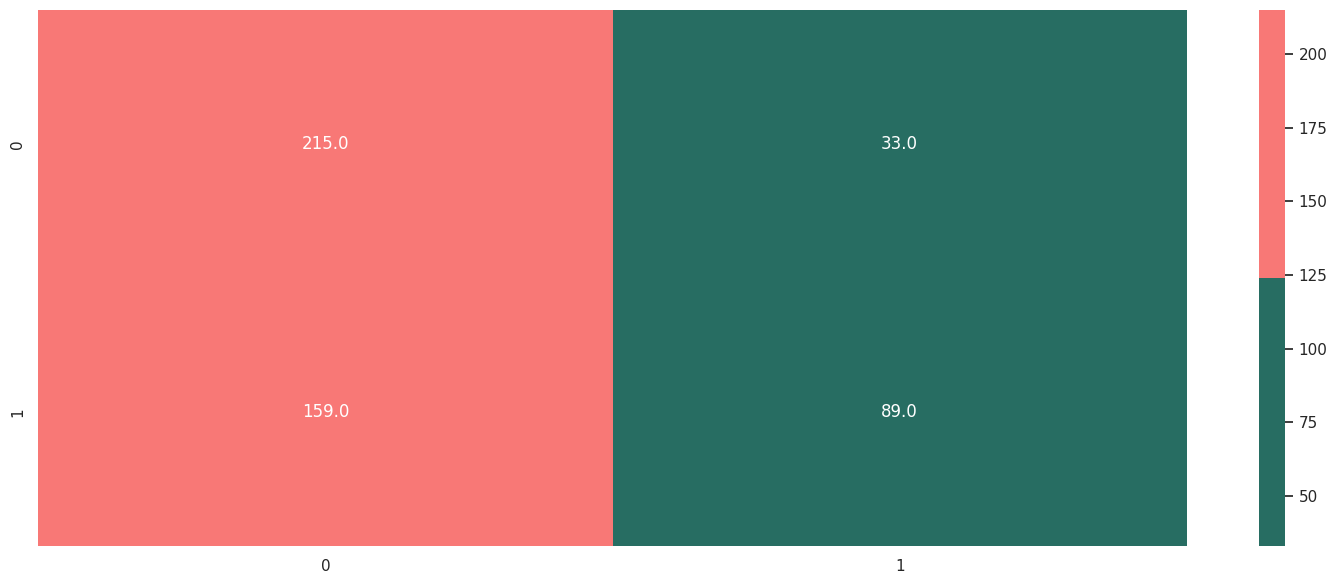

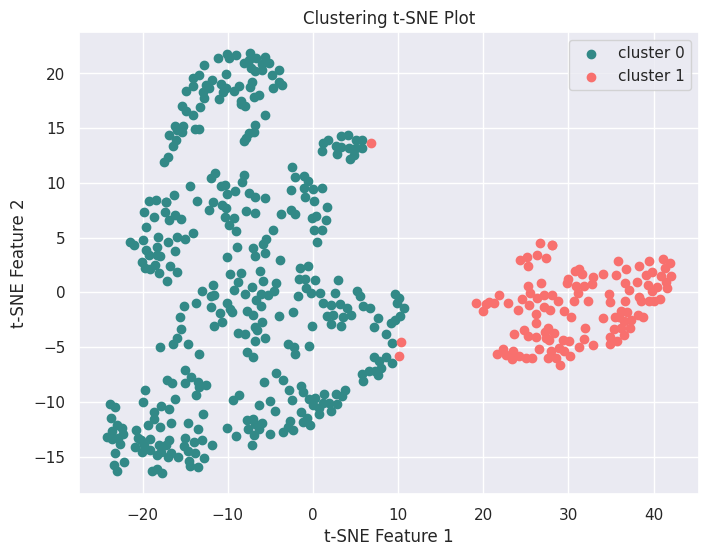

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(Xn)
labels = kmeans.predict(Xn)
evaluation(yn, labels,Xn)

##AgglomerativeClustering

f1 score: 0.6088709677419355
silhouette_score:  0.6481629863688201
Accuracy: 0.6088709677419355
--------------------
[[219  29]
 [165  83]]
              precision    recall  f1-score   support

         0.0       0.57      0.88      0.69       248
         1.0       0.74      0.33      0.46       248

    accuracy                           0.61       496
   macro avg       0.66      0.61      0.58       496
weighted avg       0.66      0.61      0.58       496



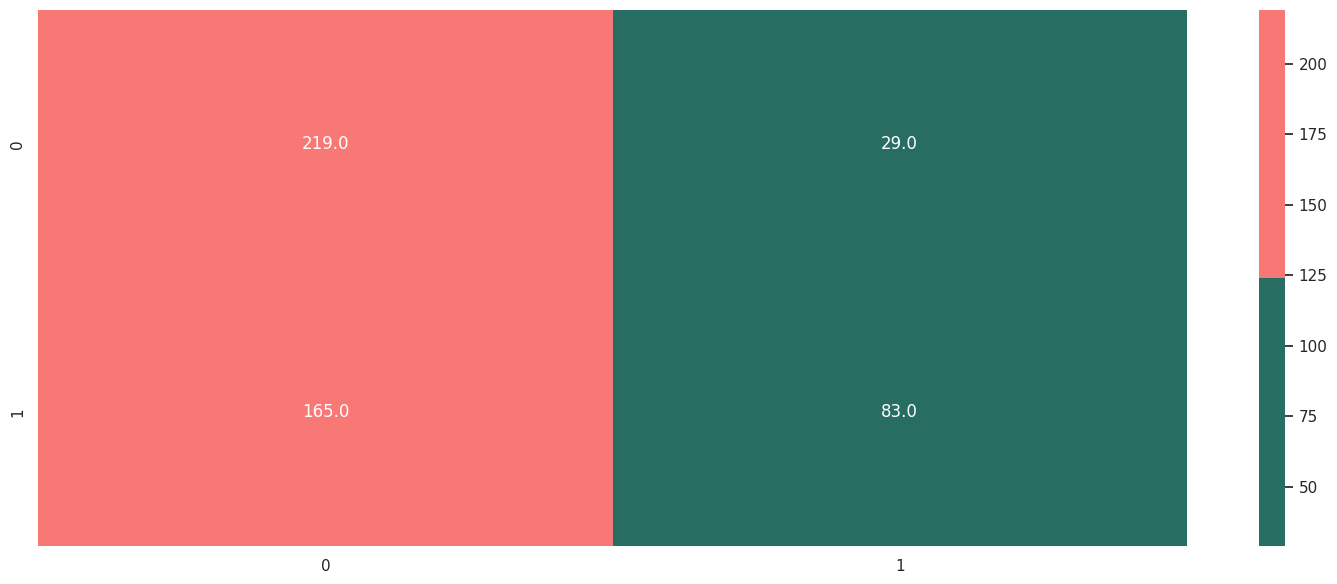

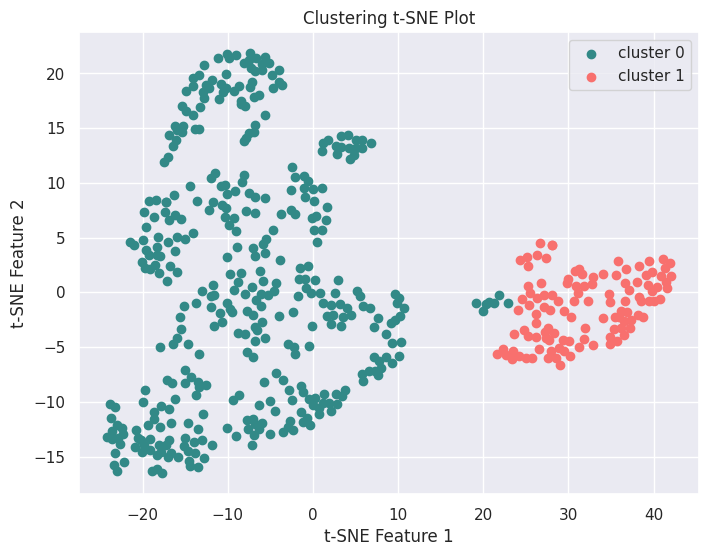

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(Xn)
evaluation(yn, labels,Xn)

##GaussianMixture

f1 score: 0.43548387096774194
silhouette_score:  0.16647277716541148
Accuracy: 0.43548387096774194
--------------------
[[ 15 233]
 [ 47 201]]
              precision    recall  f1-score   support

         0.0       0.24      0.06      0.10       248
         1.0       0.46      0.81      0.59       248

    accuracy                           0.44       496
   macro avg       0.35      0.44      0.34       496
weighted avg       0.35      0.44      0.34       496



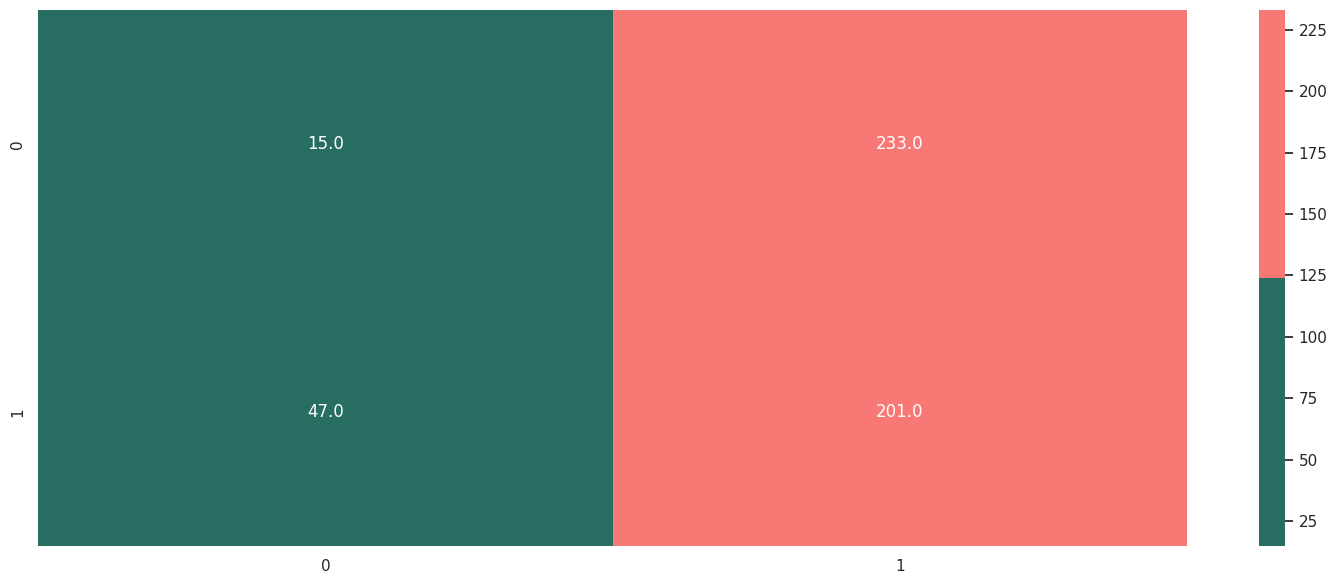

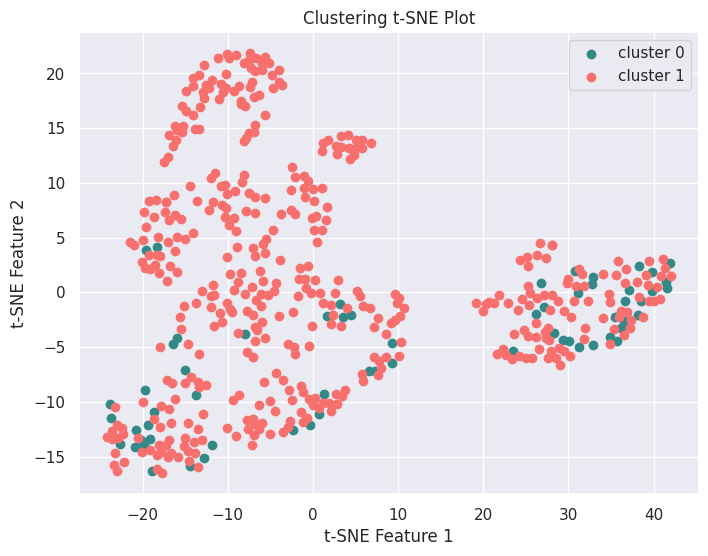

In [ ]:
gmm = GaussianMixture(n_components=2,random_state=42)
gmm.fit(Xn)
labels = gmm.predict(Xn)
evaluation(yn, labels,Xn)

# ANN

**Sequential ANN**

In [ ]:
# prepare the data
# data into target and features
Xx = f1
yy = t1

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Xx, yy, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


Epoch 1/50
124/124 [==============================] - 2s 4ms/step - loss: 0.5790 - accuracy: 0.7056 - val_loss: 0.4904 - val_accuracy: 0.7762
Epoch 2/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7908 - val_loss: 0.4571 - val_accuracy: 0.7913
Epoch 3/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7974 - val_loss: 0.4438 - val_accuracy: 0.7944
Epoch 4/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8090 - val_loss: 0.4377 - val_accuracy: 0.8024
Epoch 5/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8122 - val_loss: 0.4296 - val_accuracy: 0.8014
Epoch 6/50
124/124 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8188 - val_loss: 0.4350 - val_accuracy: 0.7954
Epoch 7/50
124/124 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8241 - val_loss: 0.4199 - val_accuracy: 0.8115
Epoch 

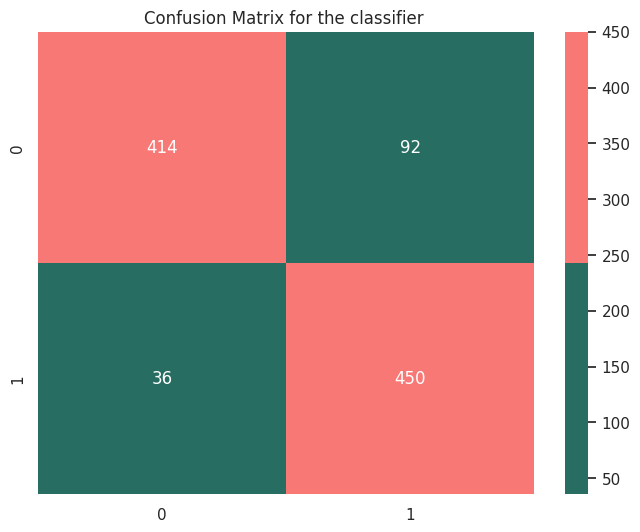

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the architecture of the ANN
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the performance of the model
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)
conf_and_plot(y_val, y_pred)

**Artificial Neural Network (ANN) with TensorFlow**

Epoch 1/50
124/124 [==============================] - 1s 4ms/step - loss: 0.5571 - accuracy: 0.7145 - val_loss: 0.4712 - val_accuracy: 0.7853
Epoch 2/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7959 - val_loss: 0.4519 - val_accuracy: 0.7933
Epoch 3/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8062 - val_loss: 0.4374 - val_accuracy: 0.8014
Epoch 4/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8100 - val_loss: 0.4332 - val_accuracy: 0.7954
Epoch 5/50
124/124 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8155 - val_loss: 0.4298 - val_accuracy: 0.8044
Epoch 6/50
124/124 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8226 - val_loss: 0.4224 - val_accuracy: 0.8105
Epoch 7/50
124/124 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8228 - val_loss: 0.4281 - val_accuracy: 0.8054
Epoch 

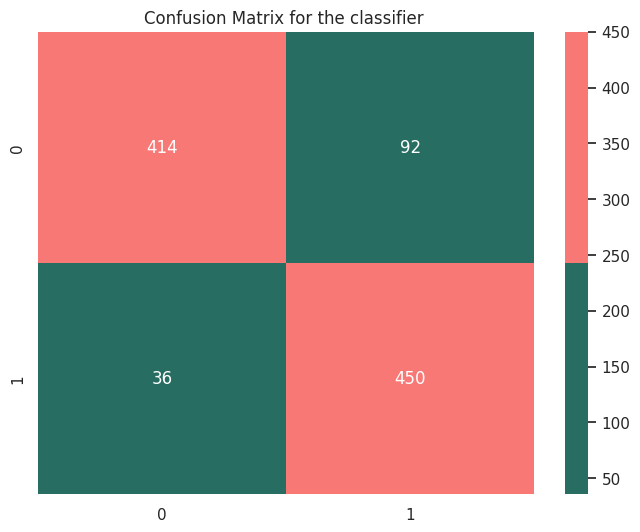

In [ ]:
import tensorflow as tf

# Define the architecture of the ANN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the performance of the model
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)
conf_and_plot(y_val, y_pred)

**use ANN with original data without balance**

In [ ]:
# get the data
# Load the data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

Epoch 1/50
125/125 [==============================] - 4s 7ms/step - loss: 0.2333 - accuracy: 0.9460 - val_loss: 0.1862 - val_accuracy: 0.9458
Epoch 2/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1643 - accuracy: 0.9513 - val_loss: 0.1786 - val_accuracy: 0.9458
Epoch 3/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1593 - accuracy: 0.9513 - val_loss: 0.1764 - val_accuracy: 0.9458
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.9513 - val_loss: 0.1790 - val_accuracy: 0.9458
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.9513 - val_loss: 0.1764 - val_accuracy: 0.9458
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9513 - val_loss: 0.1760 - val_accuracy: 0.9458
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1515 - accuracy: 0.9516 - val_loss: 0.1766 - val_accuracy: 0.9448
Epoch 

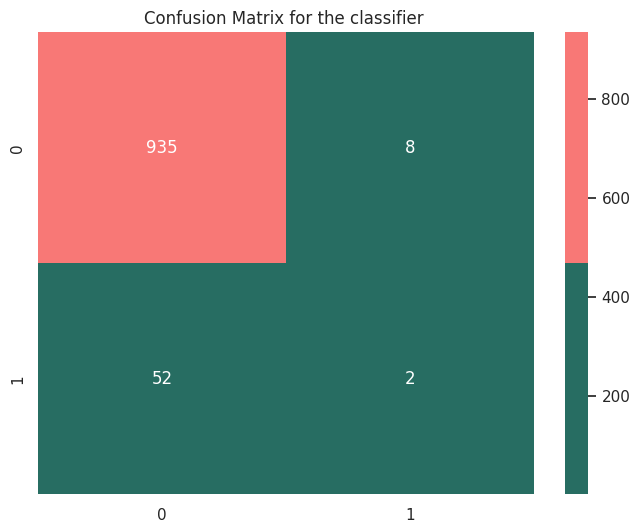

In [ ]:

# Define the architecture of the ANN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the performance of the model
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)
conf_and_plot(y_val, y_pred)

**ANN with data(undersampling only)**

Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 0.7212 - accuracy: 0.5051 - val_loss: 0.6759 - val_accuracy: 0.5500
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6323 - accuracy: 0.6944 - val_loss: 0.6249 - val_accuracy: 0.6800
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5853 - accuracy: 0.7424 - val_loss: 0.5981 - val_accuracy: 0.6900
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5551 - accuracy: 0.7374 - val_loss: 0.5798 - val_accuracy: 0.6800
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.7475 - val_loss: 0.5685 - val_accuracy: 0.6800
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5099 - accuracy: 0.7525 - val_loss: 0.5592 - val_accuracy: 0.7100
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4967 - accuracy: 0.7500 - val_loss: 0.5553 - val_accuracy: 0.7200
Epoch 8/50
13/13 [=

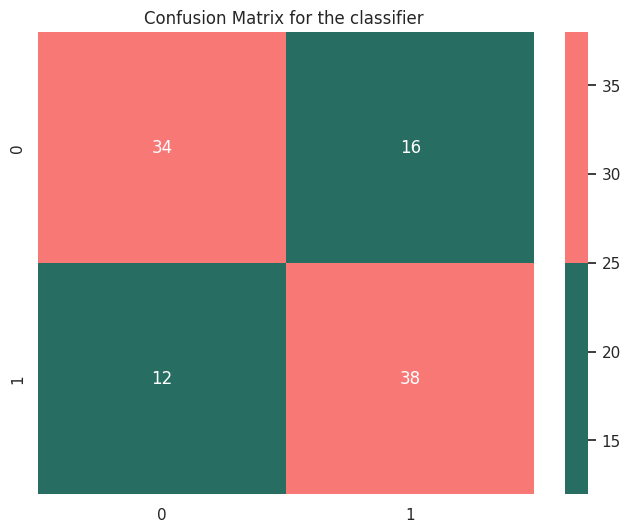

In [ ]:
# prepare the data
# data into target and features
Xx = X_un
yy = y_un

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Xx, yy, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



# Define the architecture of the ANN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the performance of the model
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)
conf_and_plot(y_val, y_pred)

**ANN with data(SMOT only)**

Epoch 1/50
178/178 [==============================] - 2s 3ms/step - loss: 0.5091 - accuracy: 0.7504 - val_loss: 0.4370 - val_accuracy: 0.7887
Epoch 2/50
178/178 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8064 - val_loss: 0.4179 - val_accuracy: 0.8049
Epoch 3/50
178/178 [==============================] - 0s 3ms/step - loss: 0.4028 - accuracy: 0.8209 - val_loss: 0.3945 - val_accuracy: 0.8246
Epoch 4/50
178/178 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8327 - val_loss: 0.3852 - val_accuracy: 0.8176
Epoch 5/50
178/178 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8353 - val_loss: 0.3772 - val_accuracy: 0.8282
Epoch 6/50
178/178 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.8408 - val_loss: 0.3647 - val_accuracy: 0.8380
Epoch 7/50
178/178 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8471 - val_loss: 0.3647 - val_accuracy: 0.8324
Epoch 

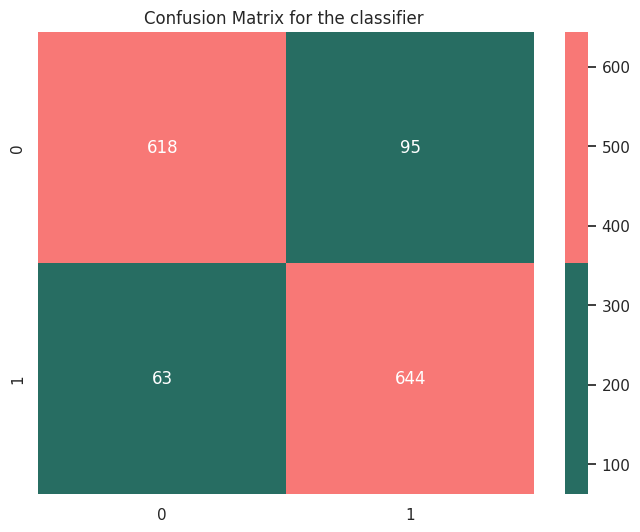

In [ ]:
# prepare the data
# data into target and features
Xx =X_sm
yy =y_sm

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Xx, yy, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



# Define the architecture of the ANN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the performance of the model
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)
conf_and_plot(y_val, y_pred)